# **Diabetic Hospital Readmission Classification**

# Overview

# Business Problem

Hospital readmission for diabetes is associated with worse long-term outcomes. Poorly controlled diabetes during the initial hospitalization can lead to complications and disease progression, including cardiovascular events, kidney problems, infections, and diabetic ketoacidosis. Fragmented care transitions between different healthcare settings contribute to gaps in follow-up care, medication adherence, and lifestyle management, resulting in poorer long-term outcomes. Repeated hospitalizations for diabetes increase healthcare utilization, burden the healthcare system, and negatively impact patients' quality of life. Disruptions in continuity of care hinder the establishment of effective care plans, monitoring, and support, leading to adverse outcomes. To address this business problem, efforts are focused on improving care coordination, patient education, medication management, discharge planning, and post-discharge follow-up to reduce hospital readmissions and improve long-term outcomes for diabetic patients.

Hospital readmission for diabetic patients is a significant business problem with potential implications for patient outcomes and healthcare costs. 

1. Impact on Patient Health: Hospital readmission for diabetes is associated with worse long-term outcomes for patients. Poorly controlled diabetes during the initial hospitalization can lead to complications and disease progression, including cardiovascular events, kidney problems, infections, and diabetic ketoacidosis. Inadequate management and fragmented care transitions contribute to gaps in follow-up care, medication adherence, and lifestyle management, further impacting patient health and well-being.

2. Healthcare Resource Utilization: Hospital readmissions for diabetes impose a substantial burden on the healthcare system. Repeated hospitalizations increase healthcare utilization and costs, straining healthcare resources. Additionally, fragmented care and lack of continuity disrupt the establishment of consistent and effective care plans, hindering disease management and potentially leading to avoidable readmissions.

3. Need for Comprehensive Solutions: Addressing hospital readmission for diabetic patients requires comprehensive solutions. Improving care coordination, patient education, medication management, discharge planning, and post-discharge follow-up are essential components. By focusing on these areas, healthcare providers can promote continuity of care, reduce readmission rates, improve patient outcomes, and mitigate the financial impact on the healthcare system.

In summary, hospital readmission for diabetic patients presents a significant business problem due to its impact on patient health outcomes and healthcare resource utilization. A comprehensive approach that addresses care coordination and continuity is crucial for reducing readmission rates, improving patient outcomes, and optimizing healthcare costs.

# Data

The data set represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria.

1. It is an inpatient encounter (a hospital admission).
2. It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis.
3. The length of stay was at least 1 day and at most 14 days.
4. Laboratory tests were performed during the encounter.
5. Medications were administered during the encounter.

The target for this classification model was `readmission` and it originally started off as multiclass (no, >30, <30) but for this model, we focused on the binary problem.

There are information on the features in IDs_mapping.csv as well as the paper cited below.

(Beata Strack, Jonathan P. DeShazo, Chris Gennings, Juan L. Olmo, Sebastian Ventura, Krzysztof J. Cios, and John N. Clore, “Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records,” BioMed Research International, vol. 2014, Article ID 781670, 11 pages, 2014.)

## Imports

In [1]:
import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import roc_curve, auc, roc_auc_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.decomposition import PCA
#from tqdm import tqdm
#tqdm.pandas(desc="progress-bar")

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.ar_model import AR
from datetime import datetime

from statsmodels.tsa.stattools import adfuller

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
import statsmodels.api as sm  
import itertools

In [2]:
# importing data
df = pd.read_csv('../data/diabetic_data.csv')
df

encounter_id  patient_nbr             race  gender      age weight  \
0            2278392      8222157        Caucasian  Female   [0-10)      ?   
1             149190     55629189        Caucasian  Female  [10-20)      ?   
2              64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3             500364     82442376        Caucasian    Male  [30-40)      ?   
4              16680     42519267        Caucasian    Male  [40-50)      ?   
...              ...          ...              ...     ...      ...    ...   
101761     443847548    100162476  AfricanAmerican    Male  [70-80)      ?   
101762     443847782     74694222  AfricanAmerican  Female  [80-90)      ?   
101763     443854148     41088789        Caucasian    Male  [70-80)      ?   
101764     443857166     31693671        Caucasian  Female  [80-90)      ?   
101765     443867222    175429310        Caucasian    Male  [70-80)      ?   

        admission_type_id  discharge_disposition_id  admission_source_id  \
0                       6                        25                    1   
1                       1                         1                    7   
2                       1                         1                    7   
3                       1                         1                    7   
4                       1                         1                    7   
...                   ...                       ...                  ...   
101761                  1                         3                    7   
101762                  1                         4                    5   
101763                  1                         1                    7   
101764                  2                         3                    7   
101765                  1                         1                    7   

        time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                      1  ...          No      No                   No   
1                      3  ...          No      Up                   No   
2                      2  ...          No      No                   No   
3                      2  ...          No      Up                   No   
4                      1  ...          No  Steady                   No   
...                  ...  ...         ...     ...                  ...   
101761                 3  ...          No    Down                   No   
101762                 5  ...          No  Steady                   No   
101763                 1  ...          No    Down                   No   
101764                10  ...          No      Up                   No   
101765                 6  ...          No      No                   No   

        glipizide-metformin  glimepiride-pioglitazone  \
0                        No                        No   
1                        No                        No   
2                        No                        No   
3                        No                        No   
4                        No                        No   
...                     ...                       ...   
101761                   No                        No   
101762                   No                        No   
101763                   No                        No   
101764                   No                        No   
101765                   No                        No   

        metformin-rosiglitazone  metformin-pioglitazone  change diabetesMed  \
0                            No                      No      No          No   
1                            No                      No      Ch         Yes   
2                            No                      No      No         Yes   
3                            No                      No      Ch         Yes   
4                            No                      No      Ch         Yes   
...                         ...                     ...     ...         ...   
101761                       No

In [3]:
display(df.shape)
display(df.info())
display(df.describe())

(101766, 50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

None

encounter_id   patient_nbr  admission_type_id  \
count  1.017660e+05  1.017660e+05      101766.000000   
mean   1.652016e+08  5.433040e+07           2.024006   
std    1.026403e+08  3.869636e+07           1.445403   
min    1.252200e+04  1.350000e+02           1.000000   
25%    8.496119e+07  2.341322e+07           1.000000   
50%    1.523890e+08  4.550514e+07           1.000000   
75%    2.302709e+08  8.754595e+07           3.000000   
max    4.438672e+08  1.895026e+08           8.000000   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
count             101766.000000        101766.000000     101766.000000   
mean                   3.715642             5.754437          4.395987   
std                    5.280166             4.064081          2.985108   
min                    1.000000             1.000000          1.000000   
25%                    1.000000             1.000000          2.000000   
50%                    1.000000             7.000000          4.000000   
75%                    4.000000             7.000000          6.000000   
max                   28.000000            25.000000         14.000000   

       num_lab_procedures  num_procedures  num_medications  number_outpatient  \
count       101766.000000   101766.000000    101766.000000      101766.000000   
mean            43.095641        1.339730        16.021844           0.369357   
std             19.674362        1.705807         8.127566           1.267265   
min              1.000000        0.000000         1.000000           0.000000   
25%             31.000000        0.000000        10.000000           0.000000   
50%             44.000000        1.000000        15.000000           0.000000   
75%             57.000000        2.000000        20.000000           0.000000   
max            132.000000        6.000000        81.000000          42.000000   

       number_emergency  number_inpatient  number_diagnoses  
count     101766.000000     101766.000000     101766.000000  
mean           0.197836          0.635566          7.422607  
std            0.930472          1.262863          1.933600  
min            0.000000          0.000000          1.000000  
25%            0.000000          0.000000          6.000000  
50%            0.000000          0.000000          8.000000  
75%            0.000000          1.000000          9.000000  
max           76.000000         21.000000         16.000000

why is this data good for my problem

# Data Exploration

### Checking for null values

In [4]:
df.isna().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [5]:
# In the dataset missing values are represented as '?' sign so isna will return that there are no nulls
# for the gender column missing values are logged in as unknown

missing_value_count = df.isin(['?', 'Unknown/Invalid']).sum()
print(missing_value_count)

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          3
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

expalin what you see

### Dropping Columns and taking care of null values

In [6]:
# Creating a copy of the DataFrame
df_clean = df.copy()

In [7]:
#dropping columns with large number of missing values
df_clean = df_clean.drop(['weight','payer_code','medical_specialty'], axis = 1)

In [8]:
#sanity check
df_clean.shape, df.shape

((101766, 47), (101766, 50))

In [9]:
# Dropping all the the null values (makred with ?) 
# It doesn't makes sense for me to fill it in with the most frequeent

drop_conditions = (
    (df_clean['diag_1'] == '?') |
    (df_clean['diag_2'] == '?') | 
    (df_clean['diag_3'] == '?') |
    (df_clean['race'] == '?') |
    (df_clean['gender'] == 'Unknown/Invalid')
)

drop_rows = set(df_clean[drop_conditions].index)
new_rows = list(set(df_clean.index) - drop_rows)
df_clean = df_clean.iloc[new_rows]
df_clean

encounter_id  patient_nbr             race  gender      age  \
1             149190     55629189        Caucasian  Female  [10-20)   
2              64410     86047875  AfricanAmerican  Female  [20-30)   
3             500364     82442376        Caucasian    Male  [30-40)   
4              16680     42519267        Caucasian    Male  [40-50)   
5              35754     82637451        Caucasian    Male  [50-60)   
...              ...          ...              ...     ...      ...   
101761     443847548    100162476  AfricanAmerican    Male  [70-80)   
101762     443847782     74694222  AfricanAmerican  Female  [80-90)   
101763     443854148     41088789        Caucasian    Male  [70-80)   
101764     443857166     31693671        Caucasian  Female  [80-90)   
101765     443867222    175429310        Caucasian    Male  [70-80)   

        admission_type_id  discharge_disposition_id  admission_source_id  \
1                       1                         1                    7   
2                       1                         1                    7   
3                       1                         1                    7   
4                       1                         1                    7   
5                       2                         1                    2   
...                   ...                       ...                  ...   
101761                  1                         3                    7   
101762                  1                         4                    5   
101763                  1                         1                    7   
101764                  2                         3                    7   
101765                  1                         1                    7   

        time_in_hospital  num_lab_procedures  ...  citoglipton  insulin  \
1                      3                  59  ...           No       Up   
2                      2                  11  ...           No       No   
3                      2                  44  ...           No       Up   
4                      1                  51  ...           No   Steady   
5                      3                  31  ...           No   Steady   
...                  ...                 ...  ...          ...      ...   
101761                 3                  51  ...           No     Down   
101762                 5                  33  ...           No   Steady   
101763                 1                  53  ...           No     Down   
101764                10                  45  ...           No       Up   
101765                 6                  13  ...           No       No   

        glyburide-metformin  glipizide-metformin  glimepiride-pioglitazone  \
1                        No                   No                        No   
2                        No                   No                        No   
3                        No                   No                        No   
4                        No                   No                        No   
5                        No                   No                        No   
...                     ...                  ...                       ...   
101761                   No                   No                        No   
101762                   No                   No                        No   
101763                   No                   No                        No   
101764                   No                   No                        No   
101765                   No                   No                        No   

       metformin-rosiglitazone metformin-pioglitazone change  diabetesMed  \
1                           No                     No     Ch          Yes   
2                           No                     No     No          Yes   
3                           No                     No     Ch          Yes   
4                           No                     No     Ch          Yes   
5                  

In [10]:
df_clean.isin(['?', 'Unknown/Invalid']).sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol  

### Dropping Dead Patients
Dropping patients that expired so that it will not bias the model.

In [11]:
# The definitions of the different numbers can be found in IDs_mapping.csv

discharge_codes_to_exclude = [11, 13, 14, 19, 20, 21]
df_clean = df_clean[~df_clean['discharge_disposition_id'].isin(discharge_codes_to_exclude)]

In [98]:
"""
The ~ operator is used to negate the boolean Series 
obtained from df_clean['discharge_disposition_id'].isin(discharge_codes_to_exclude). 

It effectively selects the rows where the 'discharge_disposition_id' 
is not present in the list of codes to exclude.
"""

"\nThe ~ operator is used to negate the boolean Series \nobtained from df_clean['discharge_disposition_id'].isin(discharge_codes_to_exclude). \n\nIt effectively selects the rows where the 'discharge_disposition_id' \nis not present in the list of codes to exclude.\n"

In [12]:
df_clean.shape

(95672, 47)

### Explorationn of specific columns

In [13]:
# checking target group to see if there is a class inbalance
df_clean['readmitted'].value_counts()

NO     50043
>30    34606
<30    11023
Name: readmitted, dtype: int64

There are three groups: 
- No (not readmitted), 
- />30 (readmitted but not within 30 days), 
- <30 (readmitte within 30 days)).

I will first make a model with biany yes or no readmission and another with multi-class.

In [14]:
df_clean['patient_nbr'].duplicated().sum()

28544

In [15]:
df_clean['encounter_id'].duplicated().sum()

0

Checked for duplicated entried but there are no duplicated entries since the encounter id are all different. This might come to be usefull when we want to focus on patients who were readmitted.

Since we do not want duplicated patients to bias towards those patients who had multiple encounters, I decided to use first encounters of patients with multiple encounters. This resulted in dataset being reduced to about 67,000 encounters:

In [16]:
df_clean = df_clean.drop_duplicates(subset= ['patient_nbr'], keep = 'first')

In [17]:
df_clean.shape

(67128, 47)

### Graphing value_counts for all columns

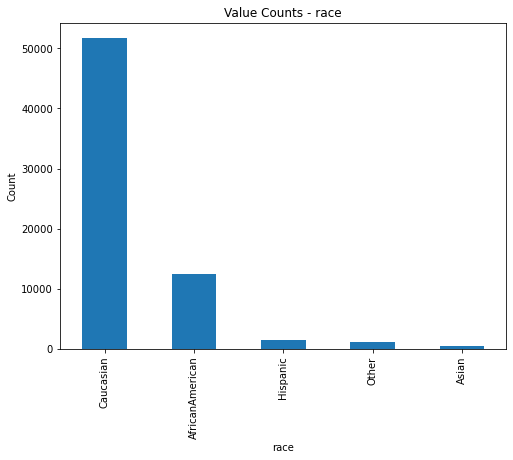

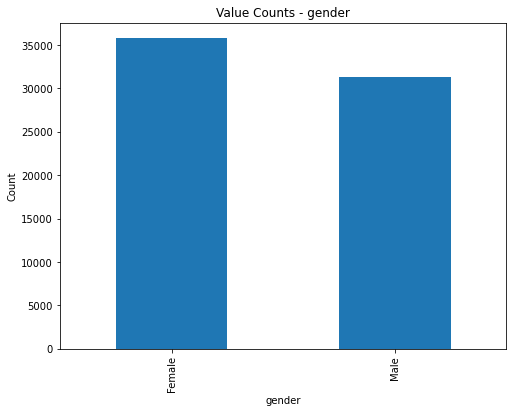

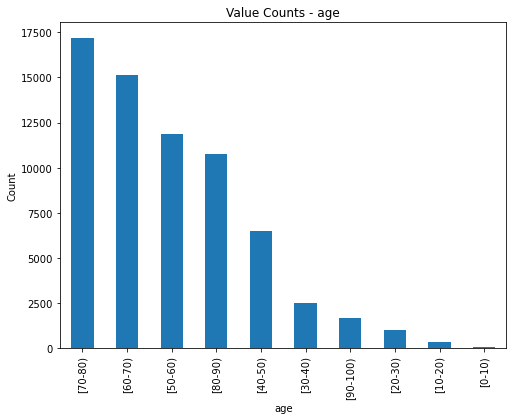

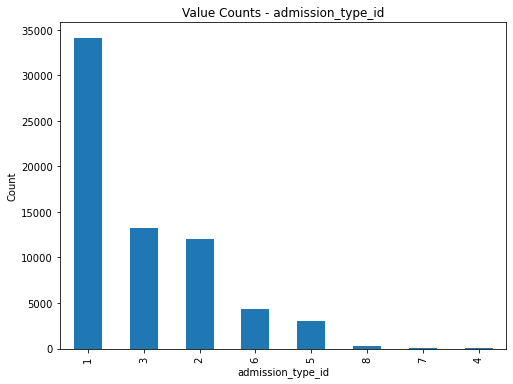

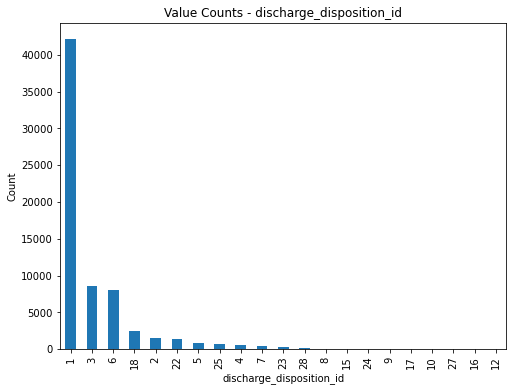

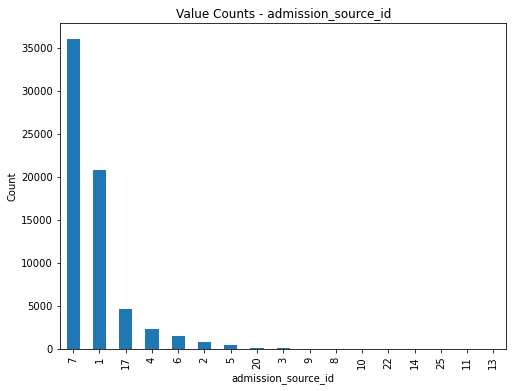

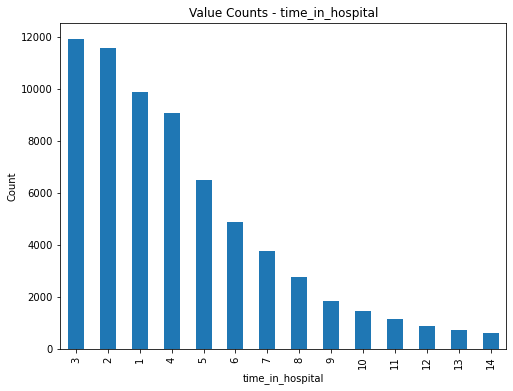

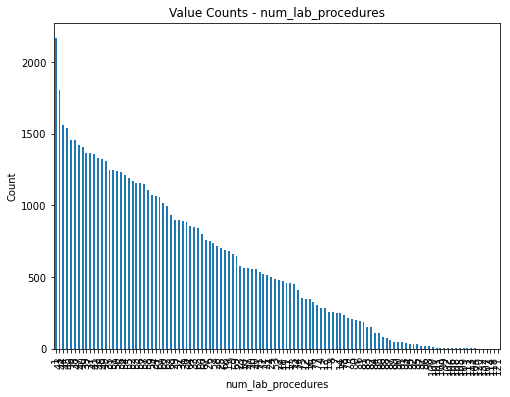

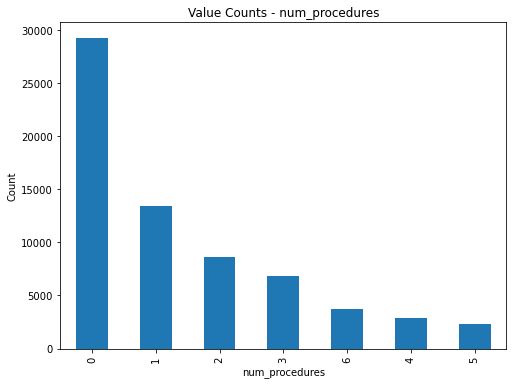

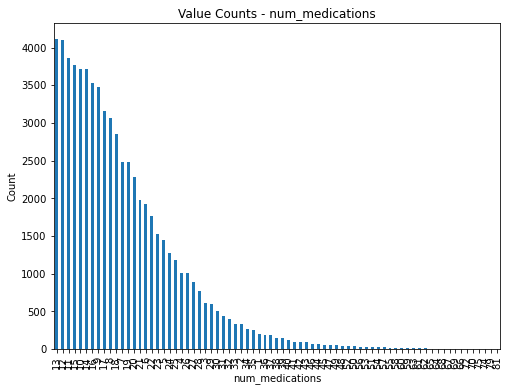

KeyboardInterrupt: 

In [19]:
# Iterate over each column in the DataFrame
for column in df_clean.columns[2:]:
    # Calculate value counts for the column
    value_counts = df_clean[column][2:].value_counts()

    # Create a bar plot for the value counts
    plt.figure(figsize=(8, 6))
    value_counts.plot(kind='bar')
    plt.title(f'Value Counts - {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

In [105]:
df_clean.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

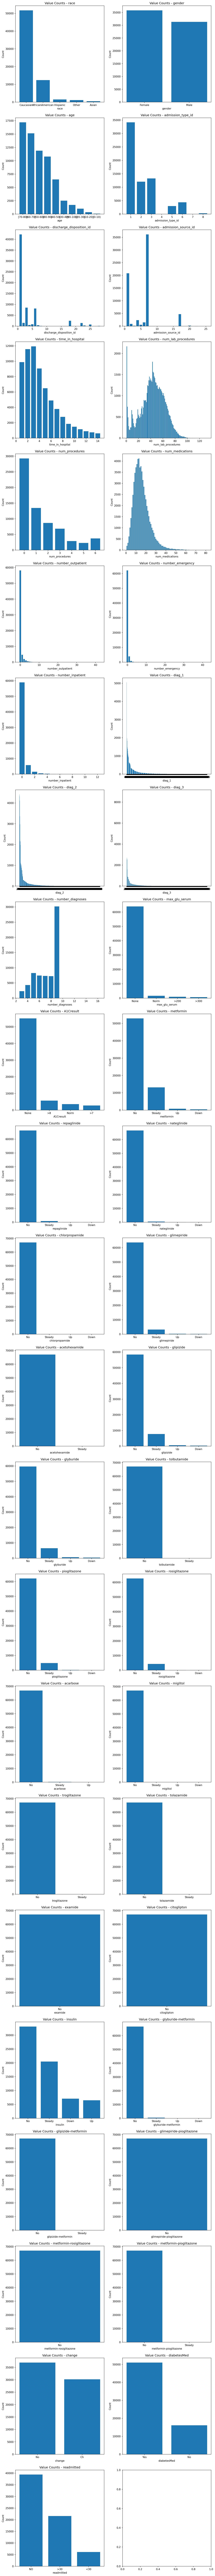

In [106]:
# Define the starting index for slicing the DataFrame columns
# I don't need to graph the encounter_id nor the patient_id
start_index = 2

# Calculate the number of columns to display on each row
columns_per_row = 2

# Calculate the total number of rows needed
total_rows = (len(df_clean.columns) - start_index) // columns_per_row + (
    (len(df_clean.columns) - start_index) % columns_per_row > 0)

# Create subplots
fig, axes = plt.subplots(total_rows, columns_per_row, 
                         figsize=(12, total_rows * 6), dpi=150)
fig.tight_layout(pad=4.0)

# Iterate over the columns in the DataFrame
for i, column in enumerate(df_clean.columns[start_index:]):
    # Calculate value counts for the column
    value_counts = df_clean[column].value_counts()

    # Calculate the subplot indices
    row_index, col_index = divmod(i, columns_per_row)

    # Create a bar plot for the value counts in the appropriate subplot
    axes[row_index, col_index].bar(value_counts.index, value_counts)
    axes[row_index, col_index].set_title(f'Value Counts - {column}')
    axes[row_index, col_index].set_xlabel(column)
    axes[row_index, col_index].set_ylabel('Count')

    # Hide any unused subplots
    if i + 1 >= total_rows * columns_per_row:
        break

# Display the subplots
plt.show()

In [107]:
df_clean['admission_type_id'].value_counts()

1    34127
3    13269
2    12056
6     4370
5     2997
8      283
7       17
4        9
Name: admission_type_id, dtype: int64

In [108]:
df_clean['num_lab_procedures'].value_counts()

1      2167
43     1803
44     1564
45     1543
46     1455
       ... 
132       1
107       1
114       1
118       1
121       1
Name: num_lab_procedures, Length: 116, dtype: int64

In [109]:
df_clean['num_medications'].value_counts()

13    4121
12    4097
11    3866
15    3770
10    3719
      ... 
70       2
75       2
74       1
79       1
81       1
Name: num_medications, Length: 75, dtype: int64

''

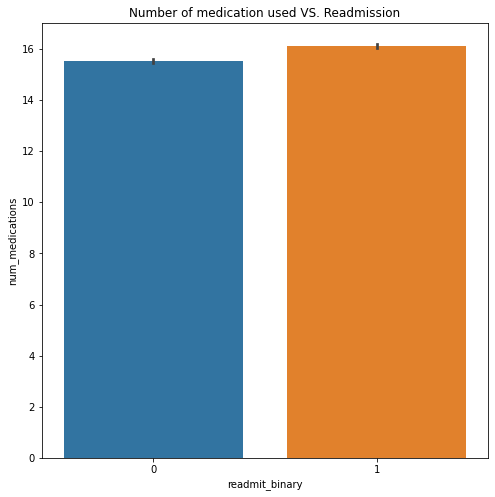

In [117]:
fig = plt.figure(figsize=(8,8))
sns.barplot(x = df_clean['readmit_binary'], 
            y = df_clean['num_medications']
           ).set_title("Number of medication used VS. Readmission")
;

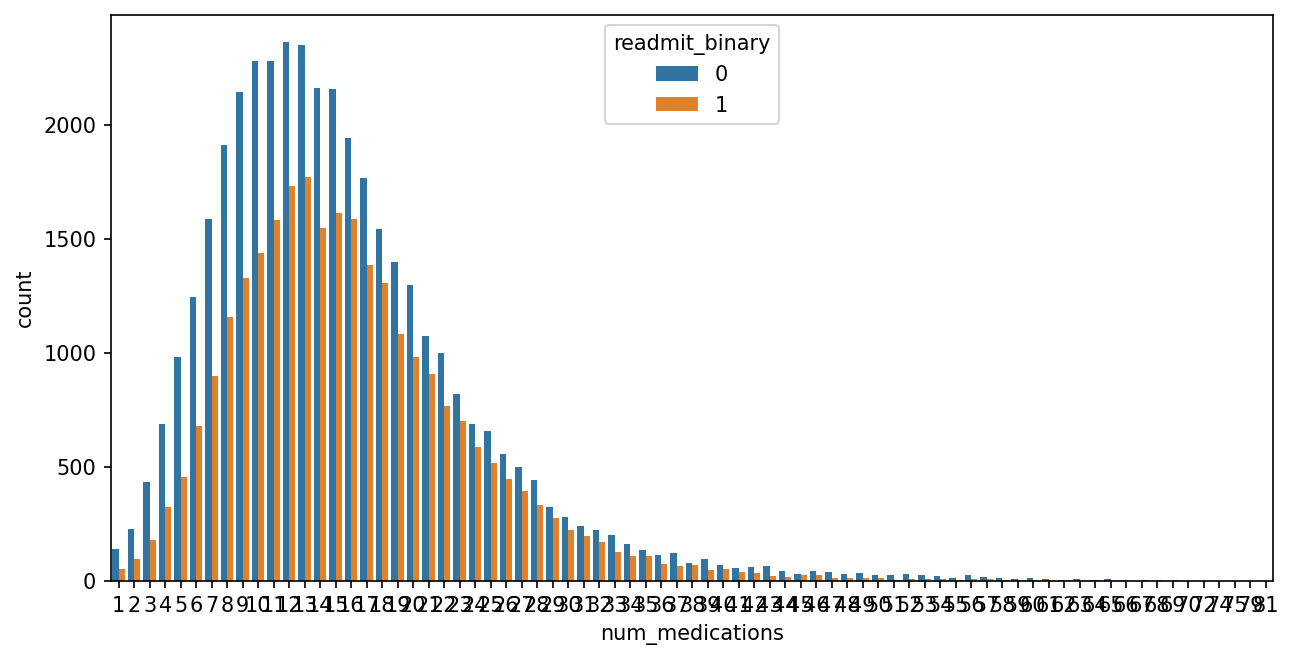

In [118]:
fig, axs = plt.subplots(figsize = (10, 5), dpi = 150)

sns.countplot(data = df_clean, x = "num_medications", hue = "readmit_binary")
plt.show()

In [119]:
df_clean['number_outpatient'].value_counts()

0     58198
1      4661
2      1949
3      1073
4       564
5       276
6       120
7        71
8        56
9        36
10       28
11       17
12       13
13       13
15       10
14       10
16        7
17        4
20        3
18        2
22        2
24        2
27        2
33        2
36        1
19        1
21        1
23        1
25        1
26        1
29        1
35        1
42        1
Name: number_outpatient, dtype: int64

In [120]:
df_clean['number_emergency'].value_counts()

0     62100
1      3825
2       779
3       240
4        94
5        31
6        25
8         9
7         8
10        5
9         4
11        2
37        1
13        1
16        1
20        1
25        1
42        1
Name: number_emergency, dtype: int64

In [121]:
df_clean['number_inpatient'].value_counts()

0     58930
1      5810
2      1498
3       461
4       224
5       103
6        55
7        20
8        12
9         7
10        5
12        2
11        1
Name: number_inpatient, dtype: int64

In [122]:
df_clean['diag_1'].value_counts()

414     5045
428     3783
786     2934
410     2689
486     2298
        ... 
347        1
842        1
E909       1
917        1
145        1
Name: diag_1, Length: 690, dtype: int64

In [123]:
df_clean['diag_2'].value_counts()

250    4411
276    4317
428    4115
427    3364
401    2971
       ... 
658       1
163       1
615       1
863       1
610       1
Name: diag_2, Length: 714, dtype: int64

In [124]:
df_clean['diag_3'].value_counts()

250     8726
401     6390
276     3259
428     2702
414     2564
        ... 
158        1
E882       1
E865       1
223        1
E853       1
Name: diag_3, Length: 754, dtype: int64

In [125]:
df_clean['number_diagnoses'].value_counts()

9     30167
5      8267
6      7439
7      7327
8      7237
4      4317
3      2307
16       27
13       10
10        8
12        6
11        6
15        5
14        5
Name: number_diagnoses, dtype: int64

''

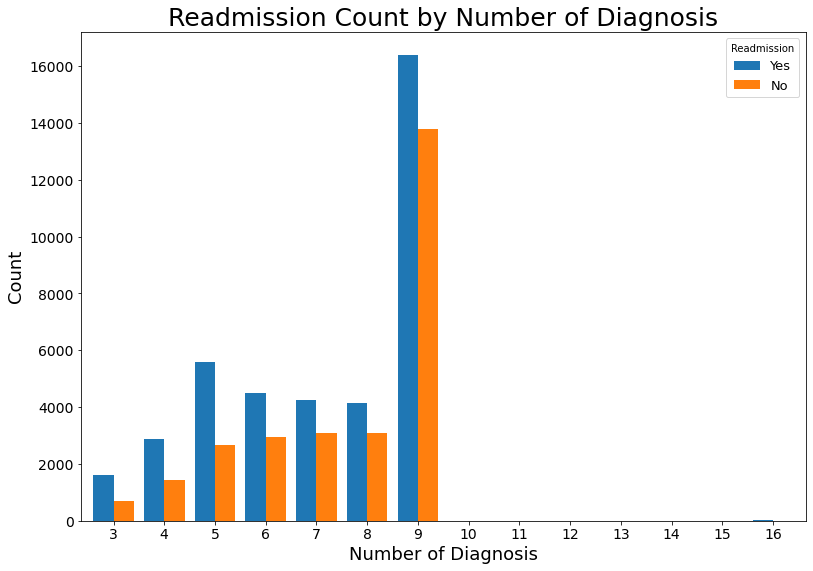

In [126]:
# Define the desired order of categories for x-axis labels
num_diag_category_order = ['3', '4', '5', '6', '7', '8', 
                           '9', '10', '11', '12', '13', 
                           '14', '15', '16']

# Create sample data
num_diag_readmit = df_clean.groupby(['number_diagnoses', 'readmit_binary']).size().unstack()

# Create the bar plots
ax = num_diag_readmit.plot(kind='bar', width=0.8, figsize=(13,9), fontsize=14)

# Set the axis labels and title
ax.set_title('Readmission Count by Number of Diagnosis', fontsize=25)

ax.set_xticklabels(num_diag_category_order, rotation=0, fontsize=14)

ax.set_xlabel('Number of Diagnosis', fontsize=18)
ax.set_ylabel('Count', fontsize=18)
ax.legend(title='Readmission', labels=['Yes', 'No'], fontsize=13)


#plt.savefig('images/age.png')
;

In [127]:
df_clean['max_glu_serum'].value_counts()

None    63875
Norm     1656
>200      906
>300      691
Name: max_glu_serum, dtype: int64

In [41]:
# Define the desired order of categories
glu_category_order = ['None', 'Norm', '>200', '>300']

# Convert the max_glu_serum column to Categorical data type with the desired category order
df_clean['max_glu_serum'] = pd.Categorical(df_clean['max_glu_serum'], 
                                           categories=glu_category_order, ordered=True)

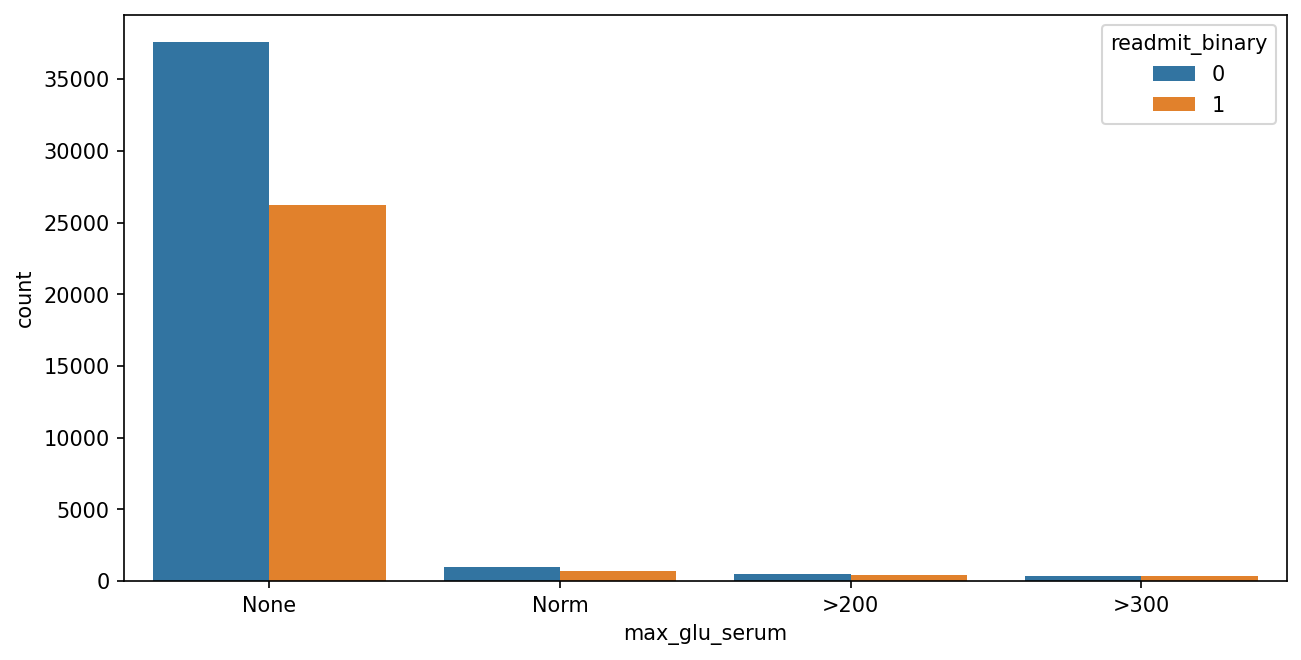

In [128]:
# Define the desired order of categories
glu_category_order = ['None', 'Norm', '>200', '>300']

fig, axs = plt.subplots(figsize = (10, 5), dpi = 150)

sns.countplot(data = df_clean, x = "max_glu_serum", hue = "readmit_binary", order=glu_category_order)
plt.show()

In [129]:
# The A1C test is a blood test that provides information about your average levels 
# of blood glucose, also called blood sugar, over the past 3 months.

df_clean['A1Cresult'].value_counts()

None    54985
>8       5730
Norm     3633
>7       2780
Name: A1Cresult, dtype: int64

In [44]:
# Define the desired order of categories
A1C_category_order = ['None', 'Norm', '>7', '>8']

# Convert the A1Cresult column to Categorical data type with the desired category order
df_clean['A1Cresult'] = pd.Categorical(df_clean['A1Cresult'], 
                                           categories=A1C_category_order, ordered=True)

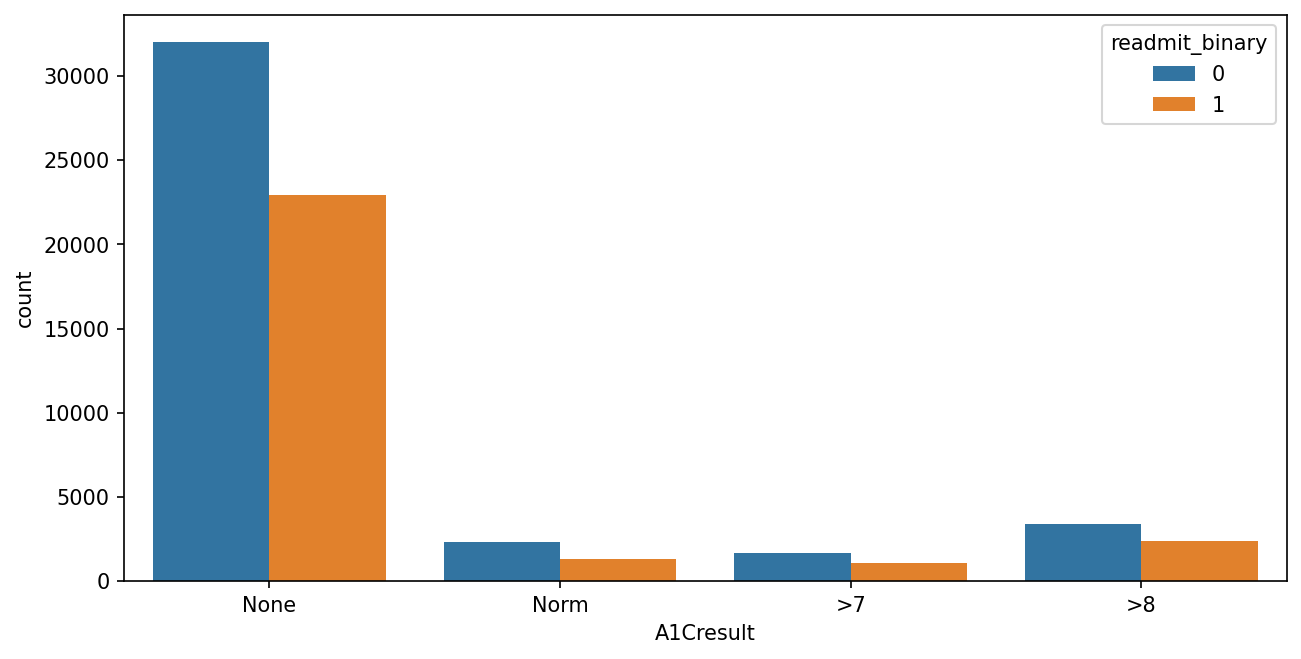

In [130]:
# Define the desired order of categories
A1C_category_order = ['None', 'Norm', '>7', '>8']

fig, axs = plt.subplots(figsize = (10, 5), dpi = 150)

sns.countplot(data = df_clean, x = "A1Cresult", hue = "readmit_binary", order=A1C_category_order)
plt.show()

In [46]:
df_clean['age'].value_counts()

[70-80)     17191
[60-70)     15150
[50-60)     11886
[80-90)     10773
[40-50)      6482
[30-40)      2519
[90-100)     1704
[20-30)      1003
[10-20)       357
[0-10)         63
Name: age, dtype: int64

In [47]:
# Define the desired order of categories
age_category_order = ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', 
                          '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)']

# Convert the age column to Categorical data type with the desired category order
df_clean['age'] = pd.Categorical(df_clean['age'], categories=age_category_order, ordered=True)

# Sort the DataFrame by the age column
# df_clean.sort_values('age', inplace=True)

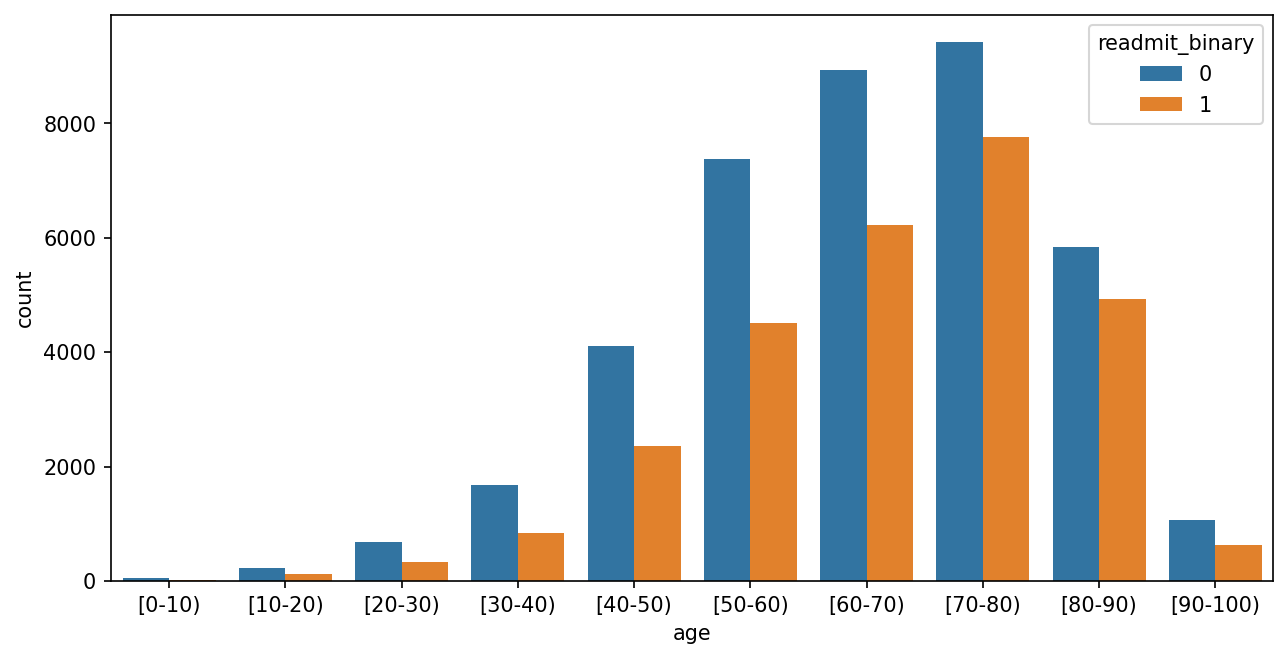

In [131]:
# Define the desired order of categories
age_category_order = ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', 
                          '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)']

fig, axs = plt.subplots(figsize = (10, 5), dpi = 150)

sns.countplot(data = df_clean, x = "age", hue = "readmit_binary", order=age_category_order)
plt.show()

In [132]:
df_clean['insulin'].value_counts()

No        33110
Steady    20469
Down       7065
Up         6484
Name: insulin, dtype: int64

In [50]:
# Define the desired order of categories
insulin_category_order = ['No', 'Steady', 'Down', 'Up']

# Convert the insulin column to Categorical data type with the desired category order
df_clean['insulin'] = pd.Categorical(df_clean['insulin'], 
                                     categories=insulin_category_order, ordered=True)

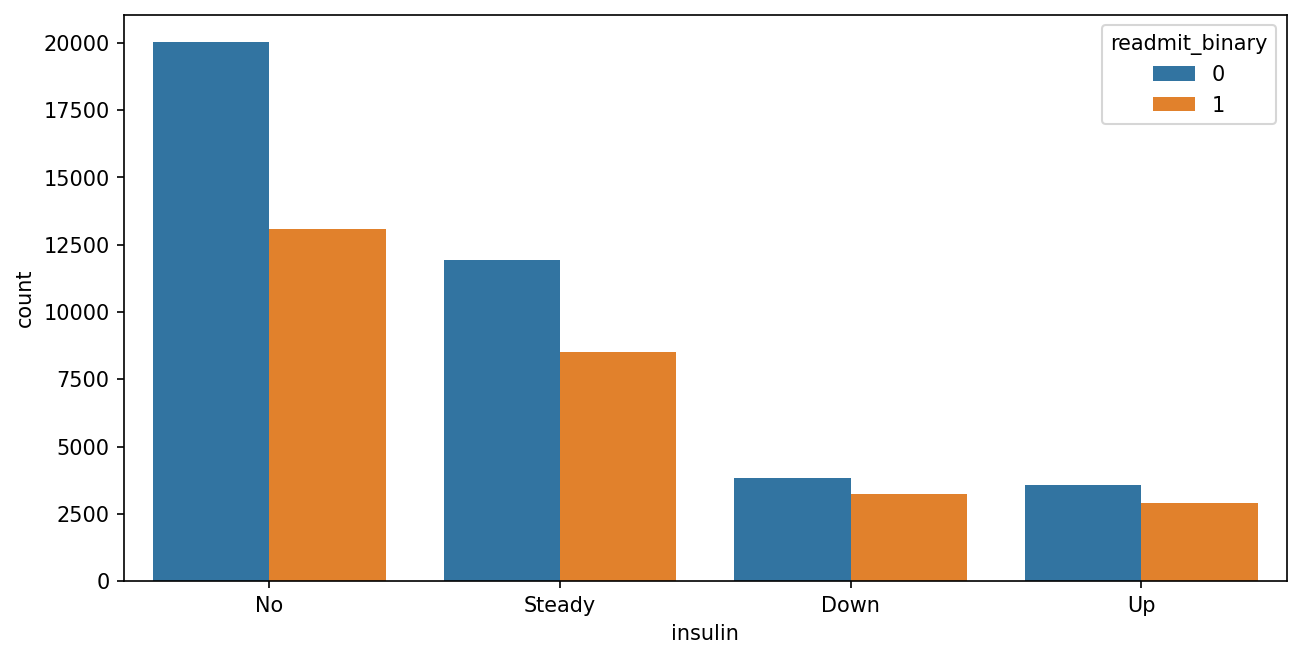

In [133]:
insulin_category_order = ['No', 'Steady', 'Down', 'Up']

fig, axs = plt.subplots(figsize = (10, 5), dpi = 150)

sns.countplot(data = df_clean, x = "insulin", hue = "readmit_binary", order=insulin_category_order)
plt.show()

In [134]:
df_clean['diabetesMed'].value_counts()

Yes    51003
No     16125
Name: diabetesMed, dtype: int64

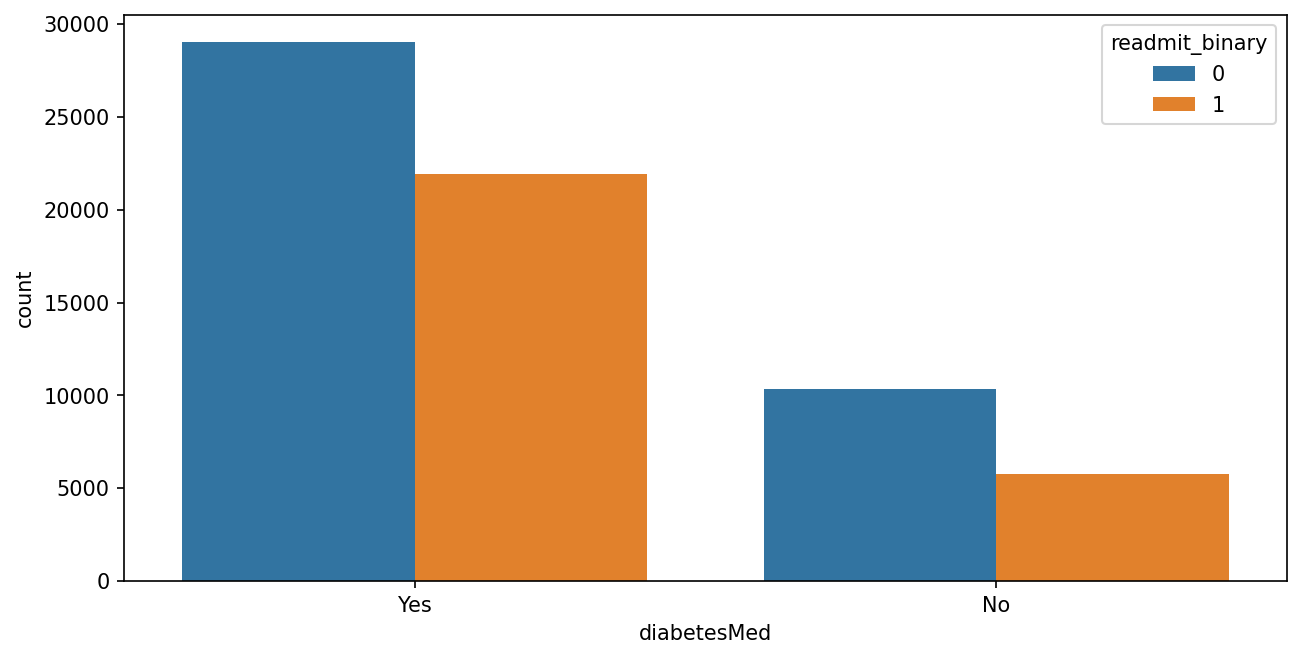

In [135]:
fig, axs = plt.subplots(figsize = (10, 5), dpi = 150)

sns.countplot(data = df_clean, x = "diabetesMed", hue = "readmit_binary")
plt.show()

In [136]:
df_clean['race'].value_counts()

Caucasian          51653
AfricanAmerican    12405
Hispanic            1461
Other               1132
Asian                477
Name: race, dtype: int64

In [55]:
# Define the desired order of categories
race_category_order = ['Caucasian', 'AfricanAmerican', 'Hispanic', 'Asian', 'Other']

# Convert the race column to Categorical data type with the desired category order
df_clean['race'] = pd.Categorical(df_clean['race'], categories=race_category_order, ordered=True)

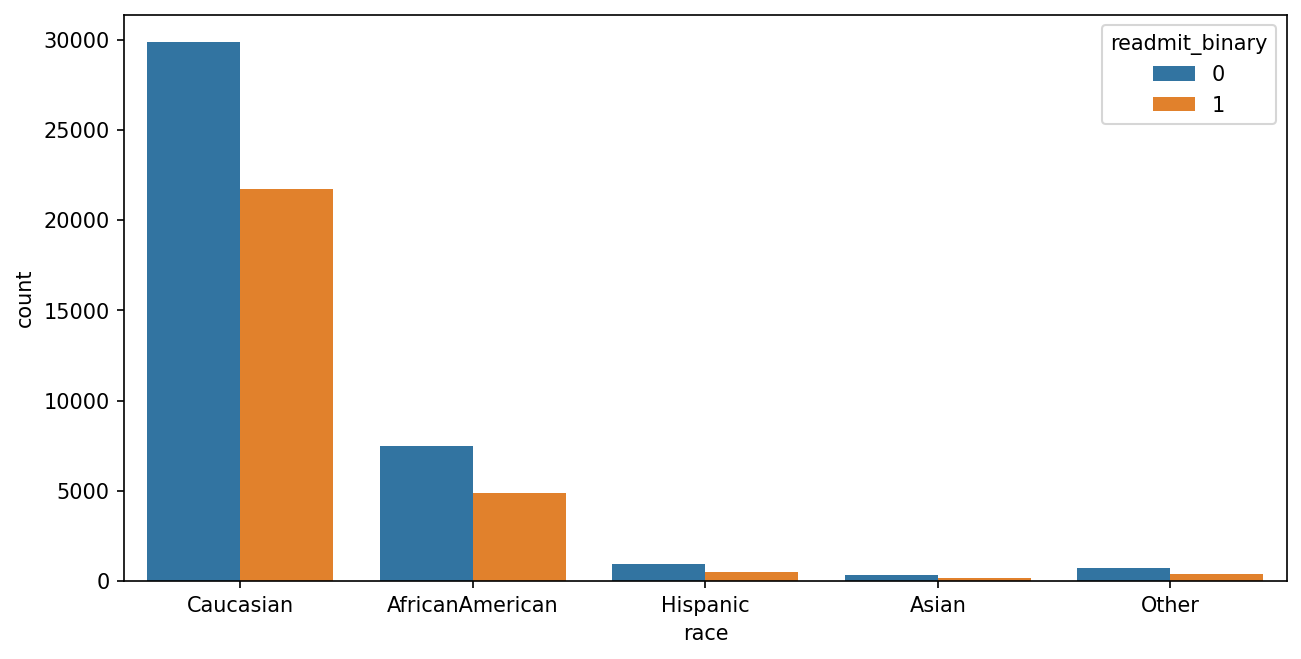

In [137]:
# Define the desired order of categories
race_category_order = ['Caucasian', 'AfricanAmerican', 'Hispanic', 'Asian', 'Other']

fig, axs = plt.subplots(figsize = (10, 5), dpi = 150)

sns.countplot(data = df_clean, x = "race", hue = "readmit_binary", order=race_category_order)
plt.show()

In [138]:
df_clean['examide'].value_counts()

No    67128
Name: examide, dtype: int64

In [139]:
"""
Although examide, citoglipton, glimepiride-pioglitazone, and 
metformin-rosiglitazone don't have any patients that have these drugs
in their regimen, I will keep these for future modeling use.

There could be patients that later switch onto these drugs, and so I
will leave these columns for future data.
"""

"\nAlthough examide, citoglipton, glimepiride-pioglitazone, and \nmetformin-rosiglitazone don't have any patients that have these drugs\nin their regimen, I will keep these for future modeling use.\n\nThere could be patients that later switch onto these drugs, and so I\nwill leave these columns for future data.\n"

In [140]:
df_clean['gender'].value_counts()

Female    35808
Male      31320
Name: gender, dtype: int64

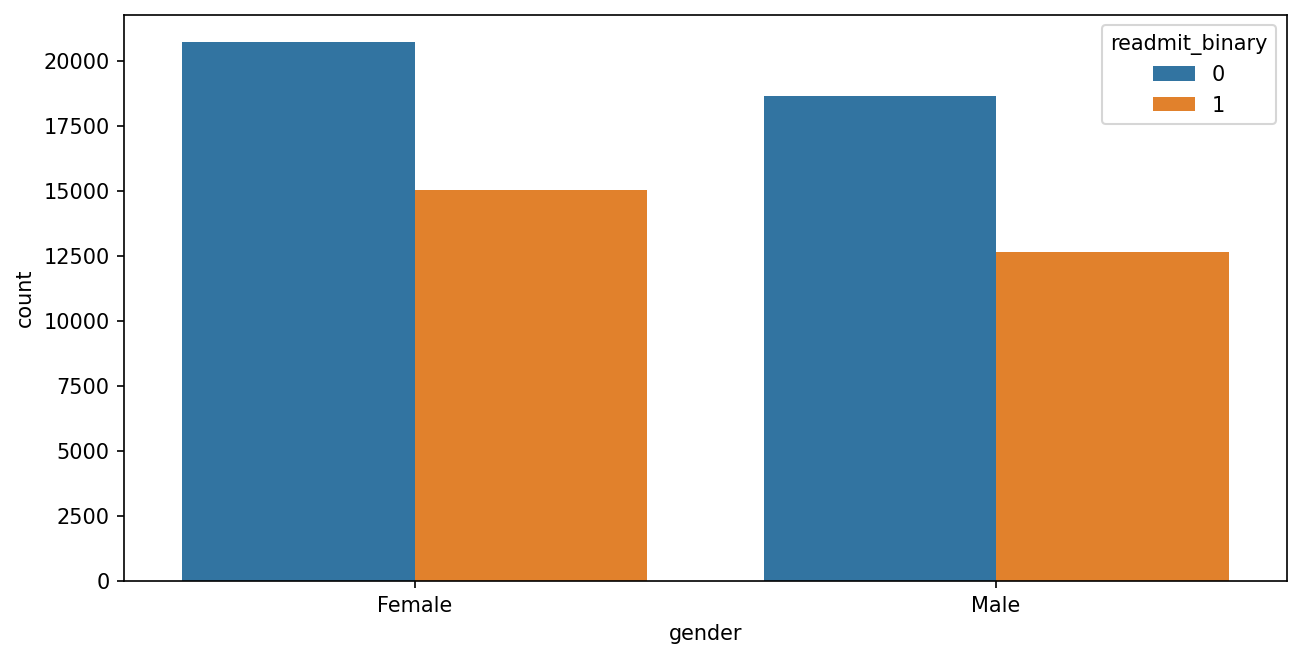

In [141]:
fig, axs = plt.subplots(figsize = (10, 5), dpi = 150)

sns.countplot(data = df_clean, x = "gender", hue = "readmit_binary")
plt.show()

In [142]:
df_clean['change'].value_counts()

No    36940
Ch    30188
Name: change, dtype: int64

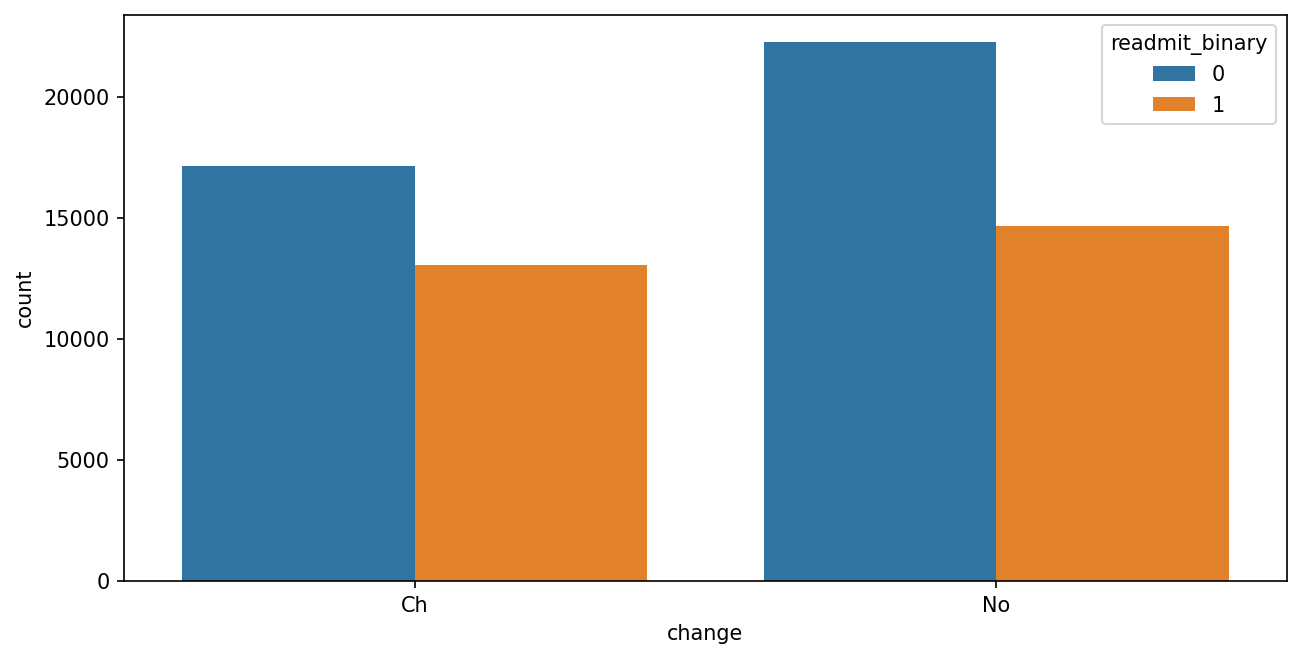

In [143]:
fig, axs = plt.subplots(figsize = (10, 5), dpi = 150)

sns.countplot(data = df_clean, x = "change", hue = "readmit_binary")
plt.show()

# Feature Engineering

## readmit_binary
Creating a binary column for readmission, which originally has three categories, for modeling.

In [206]:
# creating a column for binary target model
df_clean['readmit_binary'] = (df_clean['readmitted'] != 'NO').astype(int)

<ipython-input-206-7a0520358e6c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['readmit_binary'] = (df_clean['readmitted'] != 'NO').astype(int)


In [18]:
# creating a column for binary target model
df_clean = df_clean.copy()  # Create a copy of the DataFrame
df_clean['readmit_binary'] = (df_clean['readmitted'] != 'NO').astype(int)

In [19]:
df_clean.head()

encounter_id  patient_nbr             race  gender      age  \
1        149190     55629189        Caucasian  Female  [10-20)   
2         64410     86047875  AfricanAmerican  Female  [20-30)   
3        500364     82442376        Caucasian    Male  [30-40)   
4         16680     42519267        Caucasian    Male  [40-50)   
5         35754     82637451        Caucasian    Male  [50-60)   

   admission_type_id  discharge_disposition_id  admission_source_id  \
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   
5                  2                         1                    2   

   time_in_hospital  num_lab_procedures  ...  insulin  glyburide-metformin  \
1                 3                  59  ...       Up                   No   
2                 2                  11  ...       No                   No   
3                 2                  44  ...       Up                   No   
4                 1                  51  ...   Steady                   No   
5                 3                  31  ...   Steady                   No   

   glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
1                   No                        No                       No   
2                   No                        No                       No   
3                   No                        No                       No   
4                   No                        No                       No   
5                   No                        No                       No   

  metformin-pioglitazone change diabetesMed  readmitted readmit_binary  
1                     No     Ch         Yes         >30              1  
2                     No     No         Yes          NO              0  
3                     No     Ch         Yes          NO              0  
4                     No     Ch         Yes          NO              0  
5                     No     No         Yes         >30              1  

[5 rows x 48 columns]

Class 0 means no record of readmission and 1 means yes readmission, whether it is within 30 days or not. 

In [20]:
df_clean['readmit_binary'].value_counts()

0    39401
1    27727
Name: readmit_binary, dtype: int64

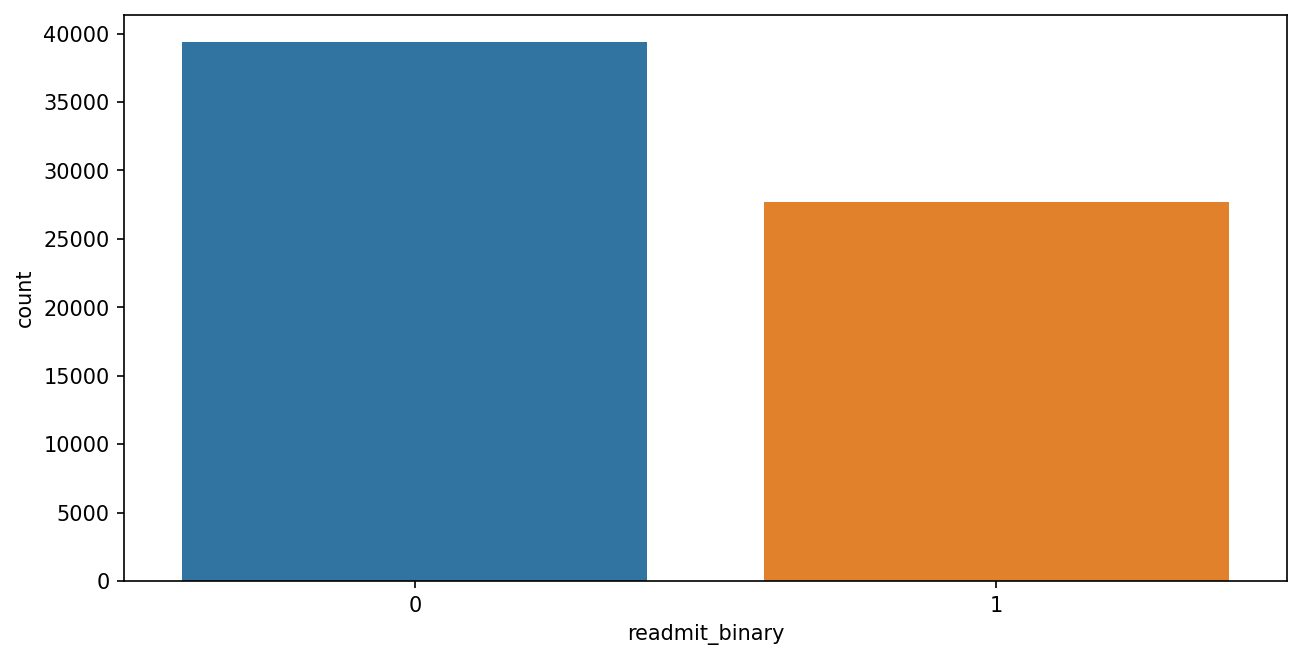

In [21]:
fig, axs = plt.subplots(figsize = (10, 5), dpi = 150)

sns.countplot(data = df_clean, x = "readmit_binary")
plt.show()

## num_change
There are a lot of drugs in this dataset and so I am making a column named 'num_change' to indicate how many timmes a patient's medication changes. The dataset contains 23 features for 23 drugs (or combos) which indicate for each of these, whether a change in that medication was made or not during the current hospital stay of patient. 

According to literature, medication change has been shown to be associated with lower readmission rates. I decided to count how many changes were made in total for each patient, and declared that a new feature. The reasoning here was to both simplify the model and possibly discover a relationship with number of changes regardless of which drug was changed.

In [22]:
df_clean['metformin'].value_counts()

No        52837
Steady    13088
Up          789
Down        414
Name: metformin, dtype: int64

In [23]:
drugs = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 
        'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 
        'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 
        'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone', 
        'metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 
        'troglitazone', 'tolbutamide', 'acetohexamide',
        'examide', 'citoglipton'
       ]

In [24]:
# Create temporary columns and calculate 'numchange'
for col in drugs:
    colname = f'{col}_temp'
    df_clean[colname] = df_clean[col].map({'No': 0, 'Steady': 0, 'Up': 1, 'Down': 1})
df_clean['num_change'] = df_clean[[f'{col}_temp' for col in drugs]].sum(axis=1)

In [25]:
df_clean.head(10)

encounter_id  patient_nbr             race  gender       age  \
1         149190     55629189        Caucasian  Female   [10-20)   
2          64410     86047875  AfricanAmerican  Female   [20-30)   
3         500364     82442376        Caucasian    Male   [30-40)   
4          16680     42519267        Caucasian    Male   [40-50)   
5          35754     82637451        Caucasian    Male   [50-60)   
6          55842     84259809        Caucasian    Male   [60-70)   
7          63768    114882984        Caucasian    Male   [70-80)   
8          12522     48330783        Caucasian  Female   [80-90)   
9          15738     63555939        Caucasian  Female  [90-100)   
10         28236     89869032  AfricanAmerican  Female   [40-50)   

    admission_type_id  discharge_disposition_id  admission_source_id  \
1                   1                         1                    7   
2                   1                         1                    7   
3                   1                         1                    7   
4                   1                         1                    7   
5                   2                         1                    2   
6                   3                         1                    2   
7                   1                         1                    7   
8                   2                         1                    4   
9                   3                         3                    4   
10                  1                         1                    7   

    time_in_hospital  num_lab_procedures  ...  metformin-pioglitazone_temp  \
1                  3                  59  ...                            0   
2                  2                  11  ...                            0   
3                  2                  44  ...                            0   
4                  1                  51  ...                            0   
5                  3                  31  ...                            0   
6                  4                  70  ...                            0   
7                  5                  73  ...                            0   
8                 13                  68  ...                            0   
9                 12                  33  ...                            0   
10                 9                  47  ...                            0   

    metformin-rosiglitazone_temp  glimepiride-pioglitazone_temp  \
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   
5                              0                              0   
6                              0                              0   
7                              0                              0   
8                              0                              0   
9                              0                              0   
10                             0                              0   

    glipizide-metformin_temp  troglitazone_temp tolbutamide_temp  \
1                          0                  0                0   
2                          0                  0                0   
3                          0                  0                0   
4                          0                  0                0   
5                          0                  0                0   
6                          0                  0                0   
7                          0                  0                0   
8                          0                  0                0   
9                          0                  0                0   
10                         0                  0                0   

   acetohexamide_temp examide_temp  citoglipton_temp num_change  
1                   0            0                

In [26]:
# Drop the temporary columns
df_clean.drop(columns=[f'{col}_temp' for col in drugs], inplace=True)

# Display the value counts of 'numchange'
df_clean['num_change'].value_counts()

0    50563
1    15596
2      893
3       73
4        3
Name: num_change, dtype: int64

In [27]:
# sanity check
df_clean.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'readmit_binary', 'num_change'],
      dtype='object')

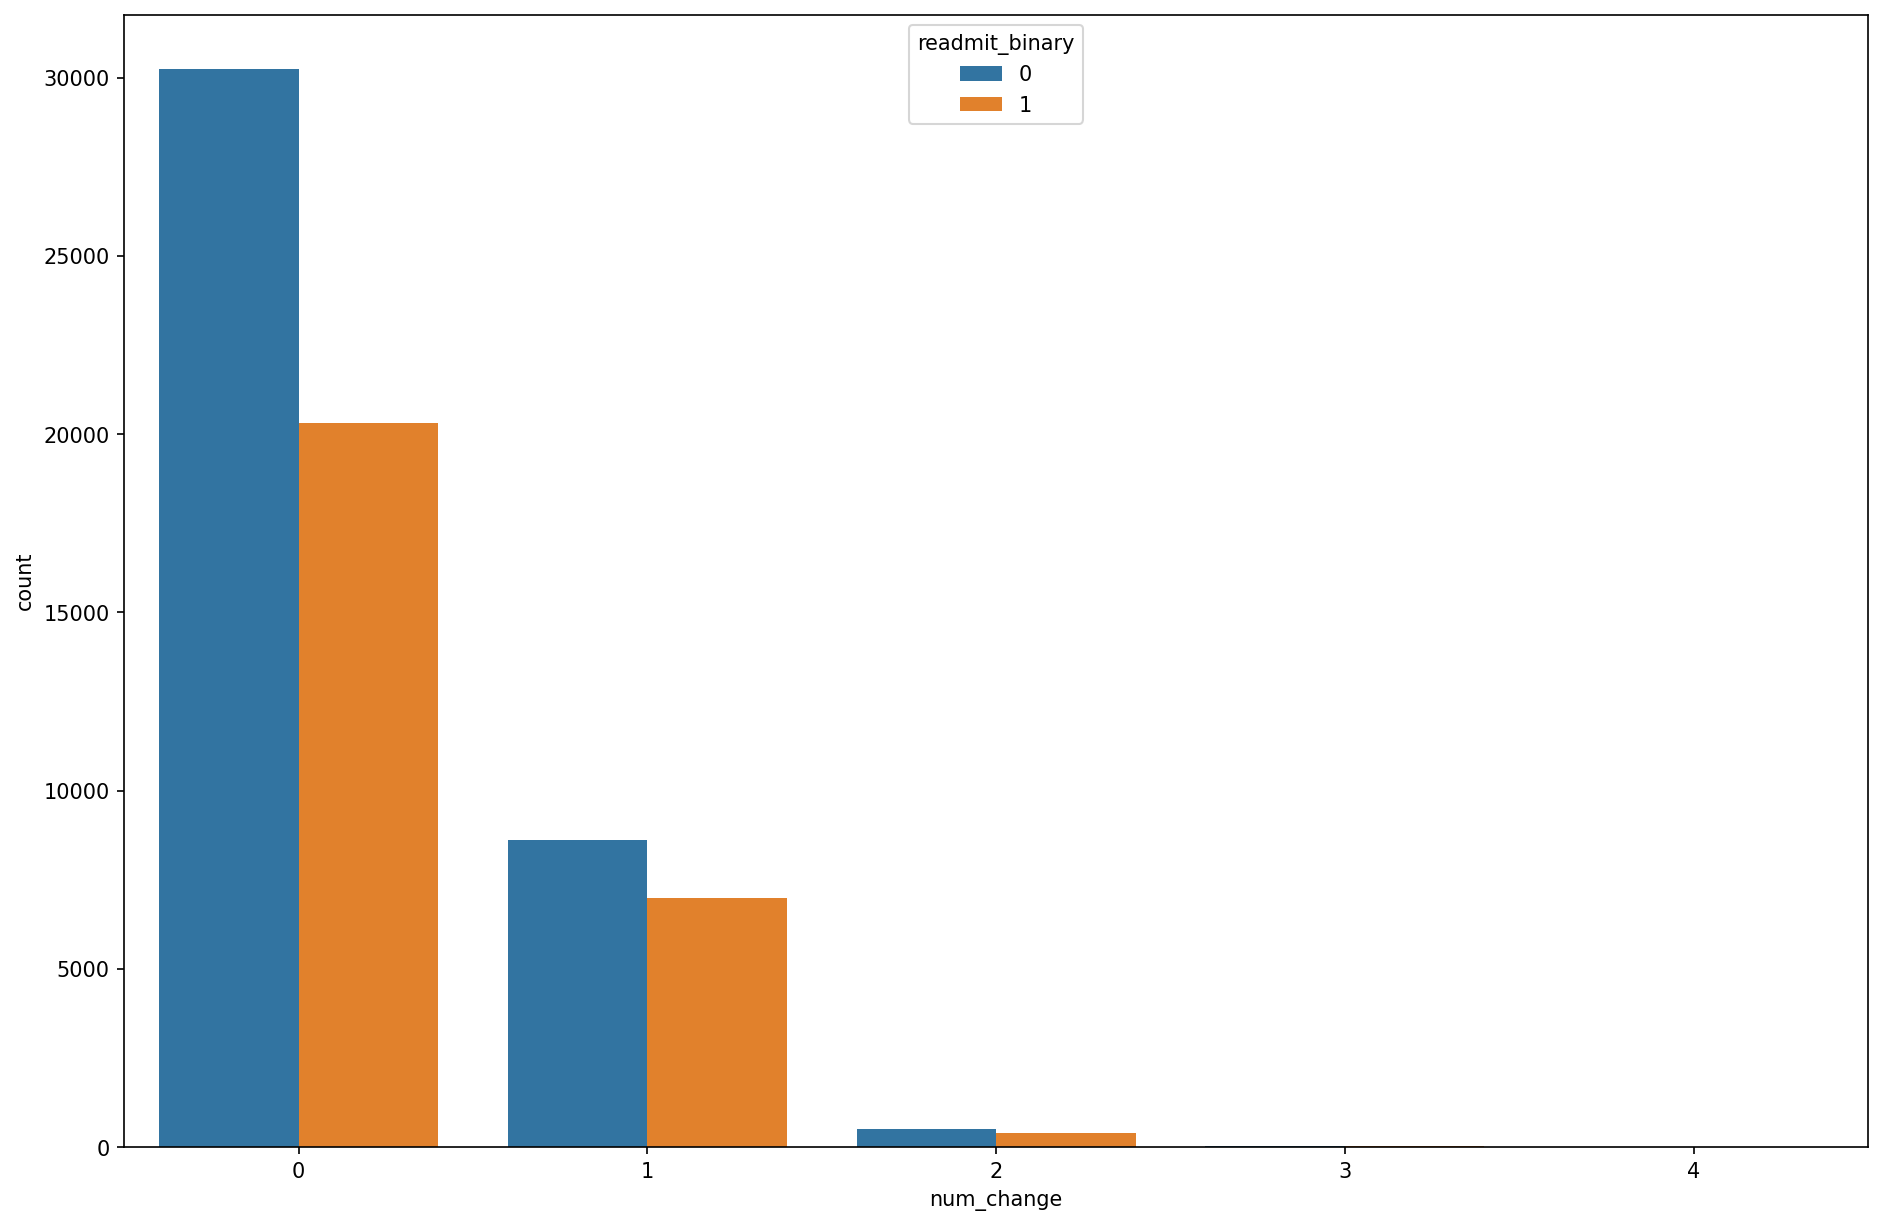

In [28]:
fig, axs = plt.subplots(figsize = (15, 10), dpi = 150)

sns.countplot(data = df_clean, x = "num_change", hue = "readmit_binary")
plt.show()

## num_meds

The total number of medications used by a patient could be another factor that potentially relates to their condition severity and the level of care required. To capture this information, I generated an additional feature by counting the medications used during each encounter. This feature was derived from the 'drugs' variable, which is a continuation from the previous code.

In [29]:
drugs

['metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'glipizide',
 'glyburide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'insulin',
 'glyburide-metformin',
 'tolazamide',
 'metformin-pioglitazone',
 'metformin-rosiglitazone',
 'glimepiride-pioglitazone',
 'glipizide-metformin',
 'troglitazone',
 'tolbutamide',
 'acetohexamide',
 'examide',
 'citoglipton']

In [30]:
df_clean['metformin'].value_counts()

No        52837
Steady    13088
Up          789
Down        414
Name: metformin, dtype: int64

In [31]:
df_clean['num_meds'] = df_clean[drugs].apply(lambda x: (x != 'No').sum(), axis=1)

In [32]:
df_clean['num_meds'].value_counts()

1    29755
0    16125
2    14793
3     5425
4      977
5       49
6        4
Name: num_meds, dtype: int64

Text(0.5, 1.0, 'Number of Medication VS. Readmission')

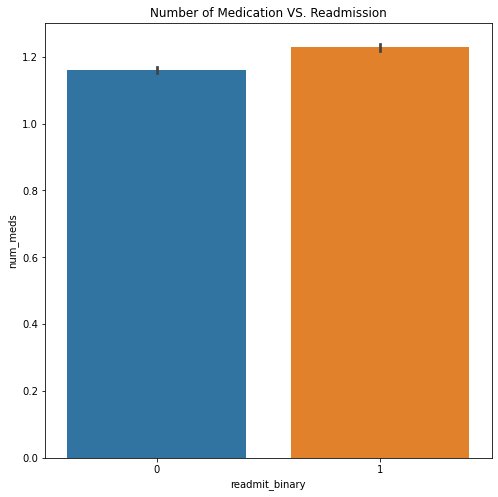

In [33]:
fig = plt.figure(figsize=(8,8))
sns.barplot( y = df_clean['num_meds'], 
            x = df_clean['readmit_binary']
           ).set_title('Number of Medication VS. Readmission')

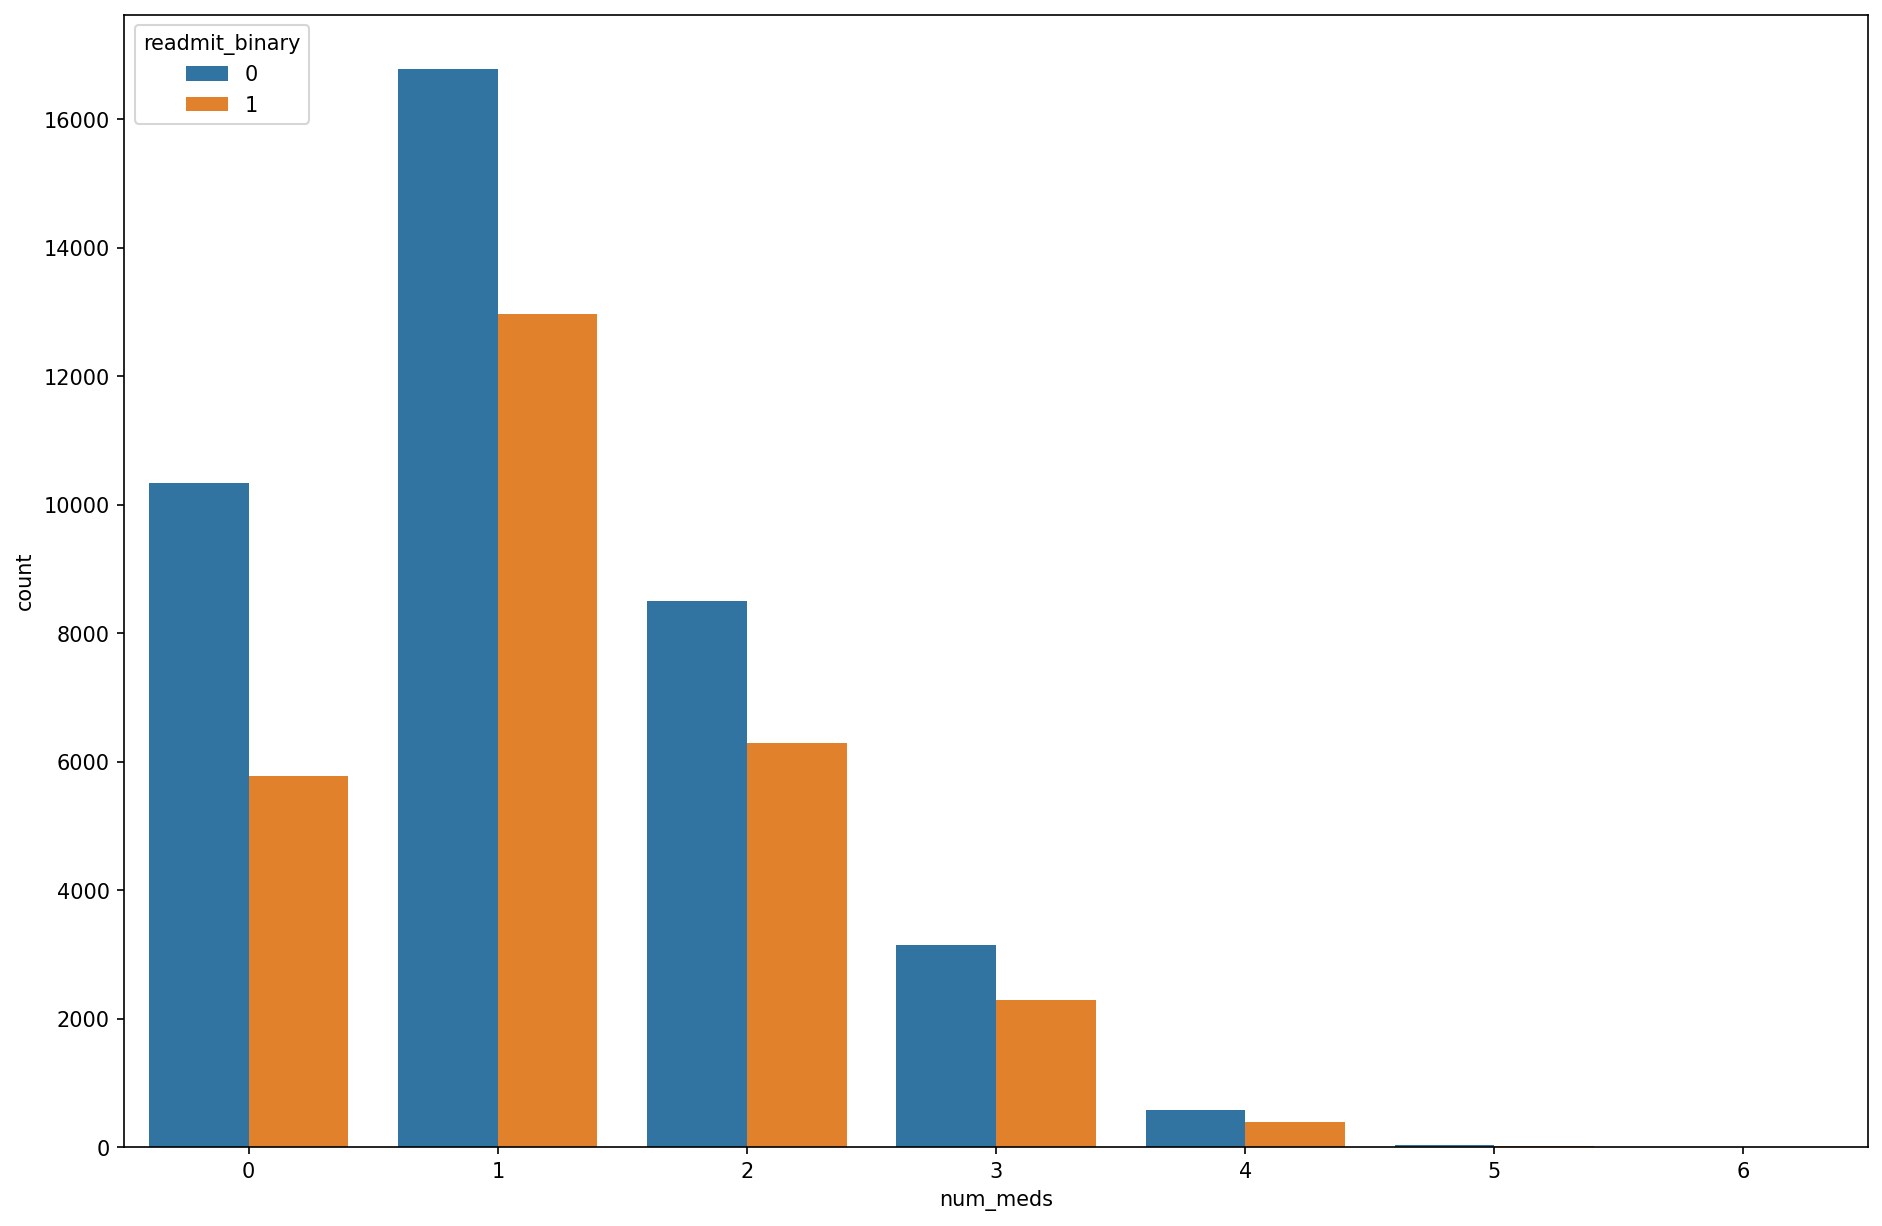

In [34]:
fig, axs = plt.subplots(figsize = (15, 10), dpi = 150)

sns.countplot(data = df_clean, x = "num_meds", hue = "readmit_binary")
plt.show()

## num_service

The dataset includes variables that capture the count of inpatient admissions, emergency room visits, and outpatient visits for each patient over the course of the previous year. These variables serve as rough indicators of the extent to which a person utilized hospital and clinic services during that period. 

To explore the impact of these utilization measures on the results, we combined the three variables into a new composite variable called "num_service". I didn't assign specific weights to the three components of service utilization at this stage and opted for a straightforward approach to gauge their collective influence.

In [ ]:
df_clean['num_service'] = df_clean['number_outpatient'] + df_clean['number_emergency'] + df_clean['number_inpatient']

In [35]:
df_clean['num_service'] = df_clean[['number_outpatient', 'number_emergency', 'number_inpatient']].sum(axis=1)

In [36]:
df_clean['num_service'].value_counts()

0     49175
1      9382
2      3912
3      2036
4      1103
5       600
6       317
7       182
8       116
9        84
10       54
11       46
12       26
13       18
15       17
14       12
17        9
16        7
18        4
20        4
24        4
27        4
22        3
25        2
33        2
42        1
23        1
26        1
30        1
34        1
35        1
36        1
37        1
49        1
Name: num_service, dtype: int64

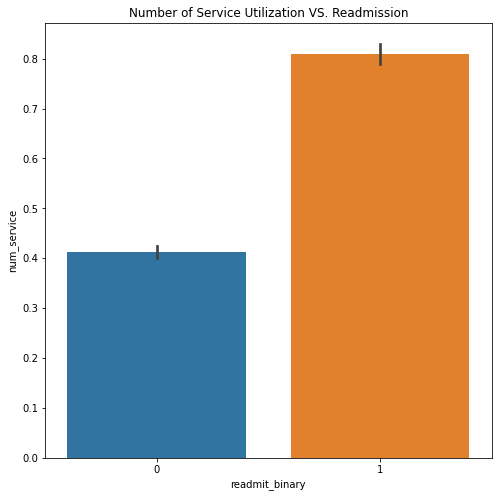

In [38]:
fig = plt.figure(figsize=(8,8))
sns.barplot( y = df_clean['num_service'], 
            x = df_clean['readmit_binary']
           ).set_title('Number of Service Utilization VS. Readmission');

## Re-coding columns to make fewer categories

### Admission_source_id

Admission source id has a total of 26 categories and few of them can be re-coded into one category

In [39]:
admission_source_mapping = {1: "referral", 2: "referral", 3: "referral",
                            4: "transfer", 5: "transfer", 6: "transfer",
                            10: "transfer", 22: "transfer", 25: "transfer",
                            8: "unavailable", 14: "unavailable", 11: "unavailable",
                            13: "unavailable", 9: "unavailable", 15: "unavailable",
                            17: "unavailable", 20: "unavailable", 21: "unavailable",
                            7: "emergencyRoom"
                           }

df_clean['admission_source_id'] = df_clean['admission_source_id'].replace(admission_source_mapping)

In [40]:
df_clean['admission_source_id'].value_counts()

emergencyRoom    36138
referral         21767
unavailable       4891
transfer          4332
Name: admission_source_id, dtype: int64

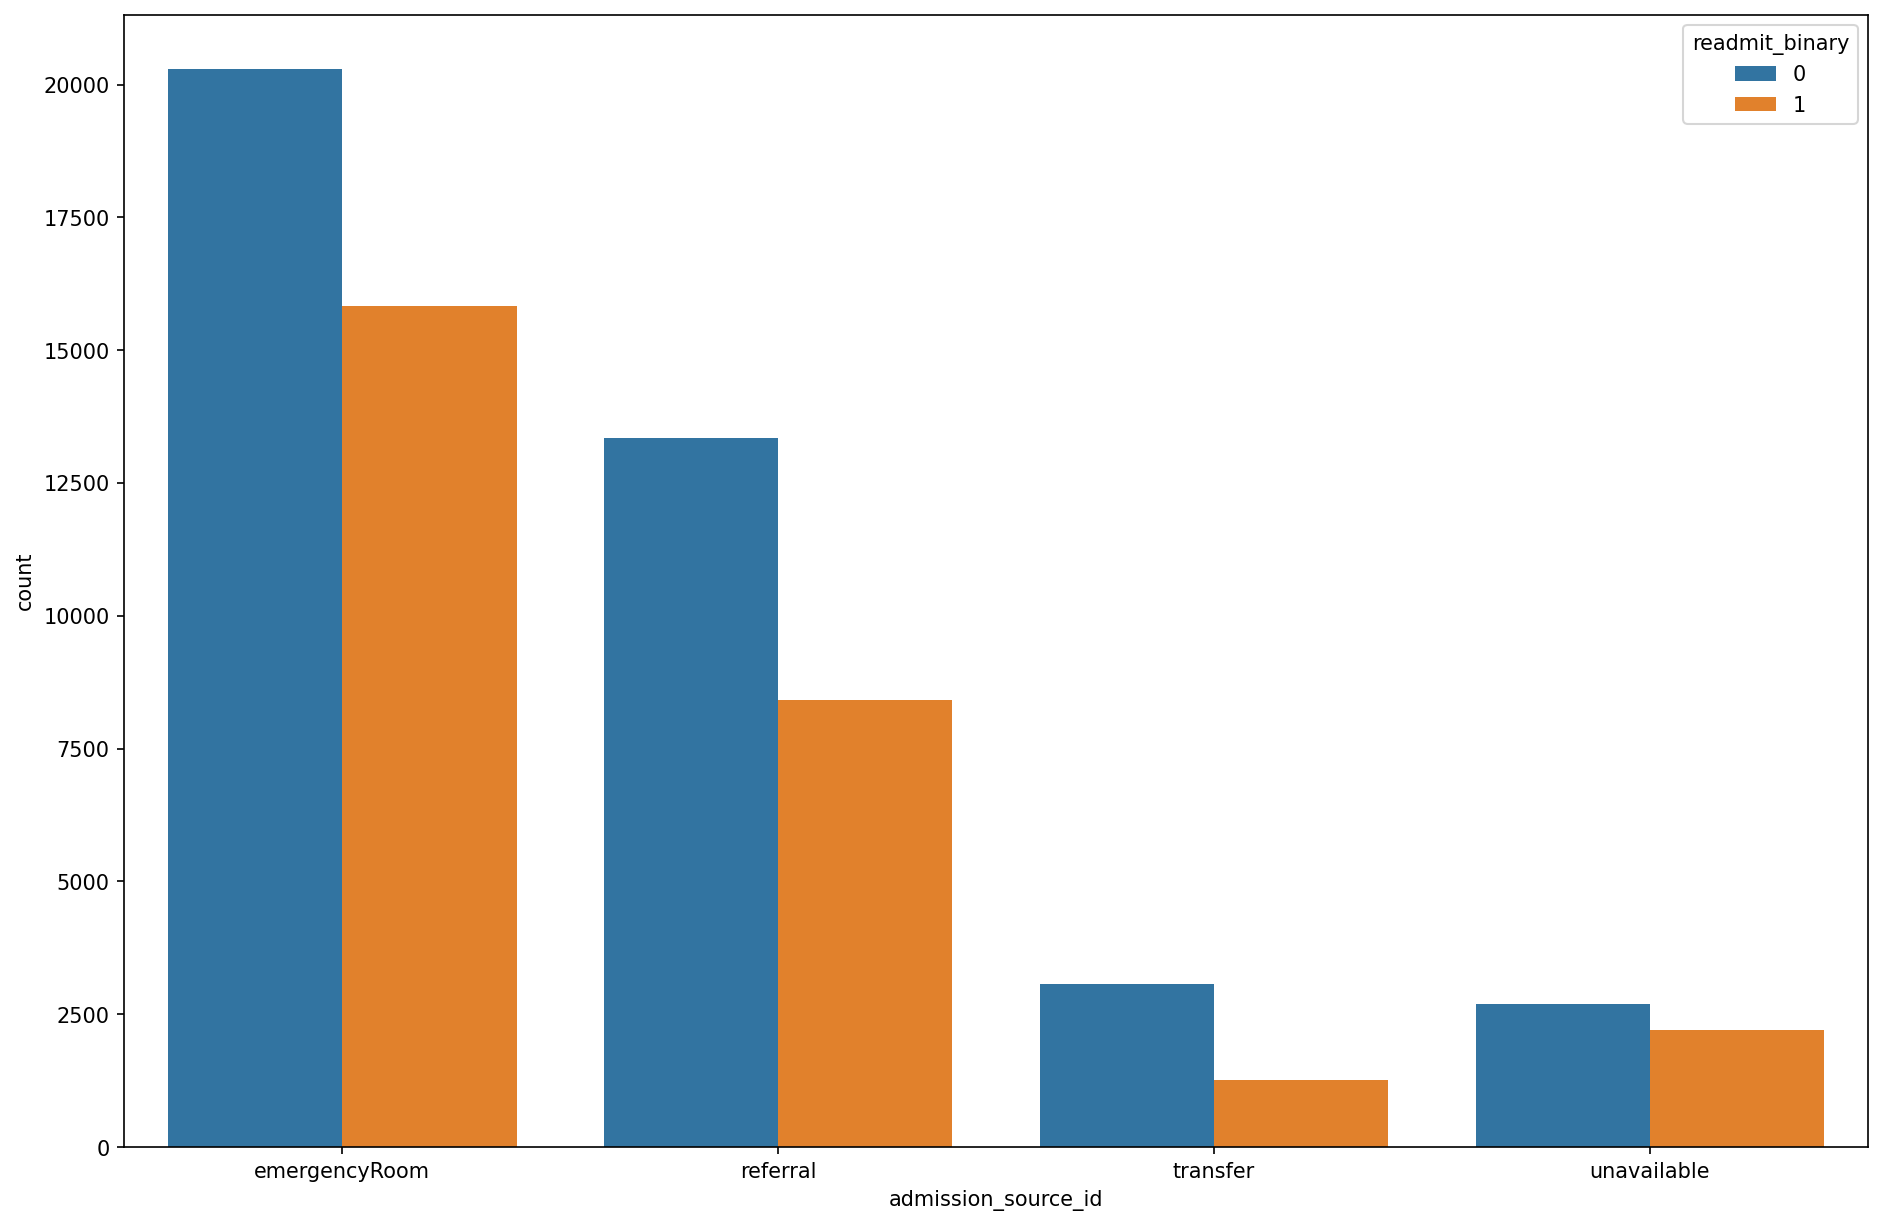

In [41]:
fig, axs = plt.subplots(figsize = (15, 10), dpi = 150)

sns.countplot(data = df_clean, x = "admission_source_id", hue = "readmit_binary")
plt.show()

### Admission_id

In [42]:
# Admission type has a total of eight categories and few of them can be re-coded into one category
"""
1,Emergency
2,Urgent
3,Elective
4,Newborn
5,Not Available
6,NULL
7,Trauma Center
8,Not Mapped
"""

admission_type_mapping = {2: 1, 7: 1, 6: 5, 8: 5}
df_clean.loc[:, 'admission_type_id'] = df_clean.loc[:, 
                                                    'admission_type_id'
                                                   ].replace(admission_type_mapping)

In [43]:
df_clean['admission_type_id'].value_counts()

1    46200
3    13269
5     7650
4        9
Name: admission_type_id, dtype: int64

In [44]:
df_clean['admission_type_id'] = df_clean['admission_type_id'].replace(1, "emergency")
df_clean['admission_type_id'] = df_clean['admission_type_id'].replace(3, "elective")
df_clean['admission_type_id'] = df_clean['admission_type_id'].replace(4, "newborn")
df_clean['admission_type_id'] = df_clean['admission_type_id'].replace(5, "not_available")

In [45]:
admission_type_mapping = {1: "emergency", 3: "elective", 4: "newborn", 5: "not_available"}
df_clean.loc[:,'admission_type_id'] = df_clean.loc[:, 'admission_type_id'].replace(admission_type_mapping)

In [46]:
df_clean['admission_type_id'].value_counts()

emergency        46200
elective         13269
not_available     7650
newborn              9
Name: admission_type_id, dtype: int64

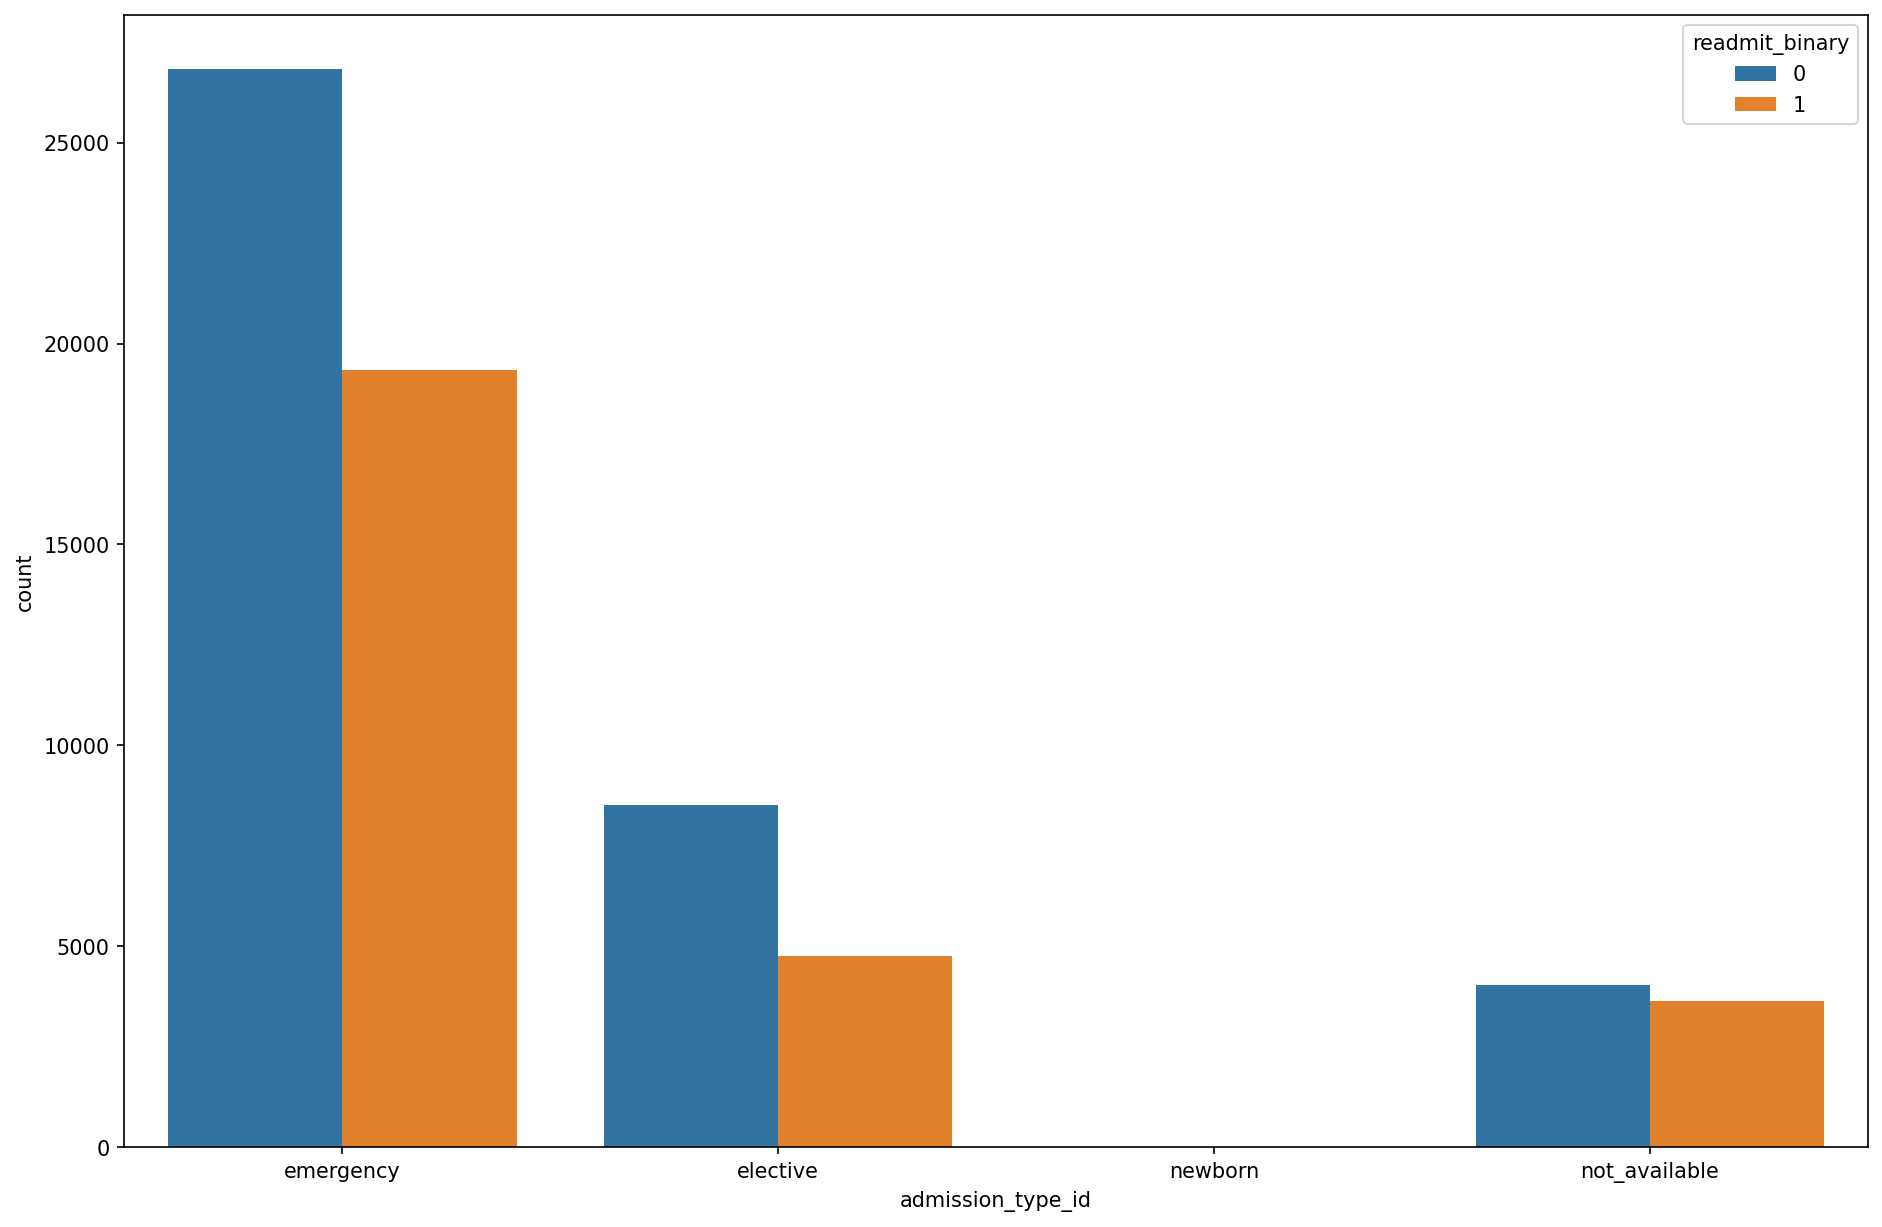

In [47]:
# Define the desired order of categories
admission_category_order = ['emergency', 'elective', 'newborn', 'not_available']

fig, axs = plt.subplots(figsize = (15, 10), dpi = 150)

sns.countplot(data = df_clean, x = "admission_type_id", hue = "readmit_binary", order = admission_category_order)
plt.show()

### Discharge_disposition_id

In [48]:
discharge_codes_to_exclude

[11, 13, 14, 19, 20, 21]

In [49]:
# Discharged/transferred to home under care of Home IV provider,  
# with home health service, and admitted as an inpatient to this hospital 
# re-coded to 1
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(6,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(8,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(9,1)

# Discharged/transferred to SNF, ICF, another type of inpatient care institution,
# another rehab fac including rehab units of a hospital, long term care hospital,
# a nursing facility certified under Medicaid but not certified under Medicare.
# re-coded to 2
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(3,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(4,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(5,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(22,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(23,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(24,2)

# Discharged/transferred within this institution to Medicare approved swing bed,
# another institution for outpatient services, this institution for outpatient services,
# and Neonate discharged to another hospital for neonatal aftercare
# re-coded to 12
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(10,12)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(15,12)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(16,12)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(17,12)

# Not Mapped and Unknown/Invalid re-coded to 18
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(25,18)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(26,18)

In [50]:
# re-coding categories into similar categories. 
# The definitions of the different numbers can be found in IDs_mapping.csv

discharge_mapping = {6: 1, 8: 1, 9: 1, 
                     3: 2, 4: 2, 5: 2, 22: 2, 23: 2, 24: 2, 27: 2, 28:2, 
                     10: 12, 15: 12, 16: 12, 17: 12, 
                     25: 18, 26: 18}

df_clean.loc[:, 'discharge_disposition_id'] = df_clean.loc[:, 
                                                           'discharge_disposition_id'
                                                          ].replace(discharge_mapping)

In [51]:
df_clean['discharge_disposition_id'].value_counts()

1     50398
2     13127
18     3158
7       386
12       59
Name: discharge_disposition_id, dtype: int64

In [52]:
discharge_type_mapping = {1: "home", 2: "transfered", 7: "left_AMA", 12: 
                          "outpatient", 18: "not_available"}
df_clean.loc[:, 'discharge_disposition_id'] = df_clean.loc[
    :, 'discharge_disposition_id'].replace(discharge_type_mapping)

In [53]:
df_clean['discharge_disposition_id'].value_counts()

home             50398
transfered       13127
not_available     3158
left_AMA           386
outpatient          59
Name: discharge_disposition_id, dtype: int64

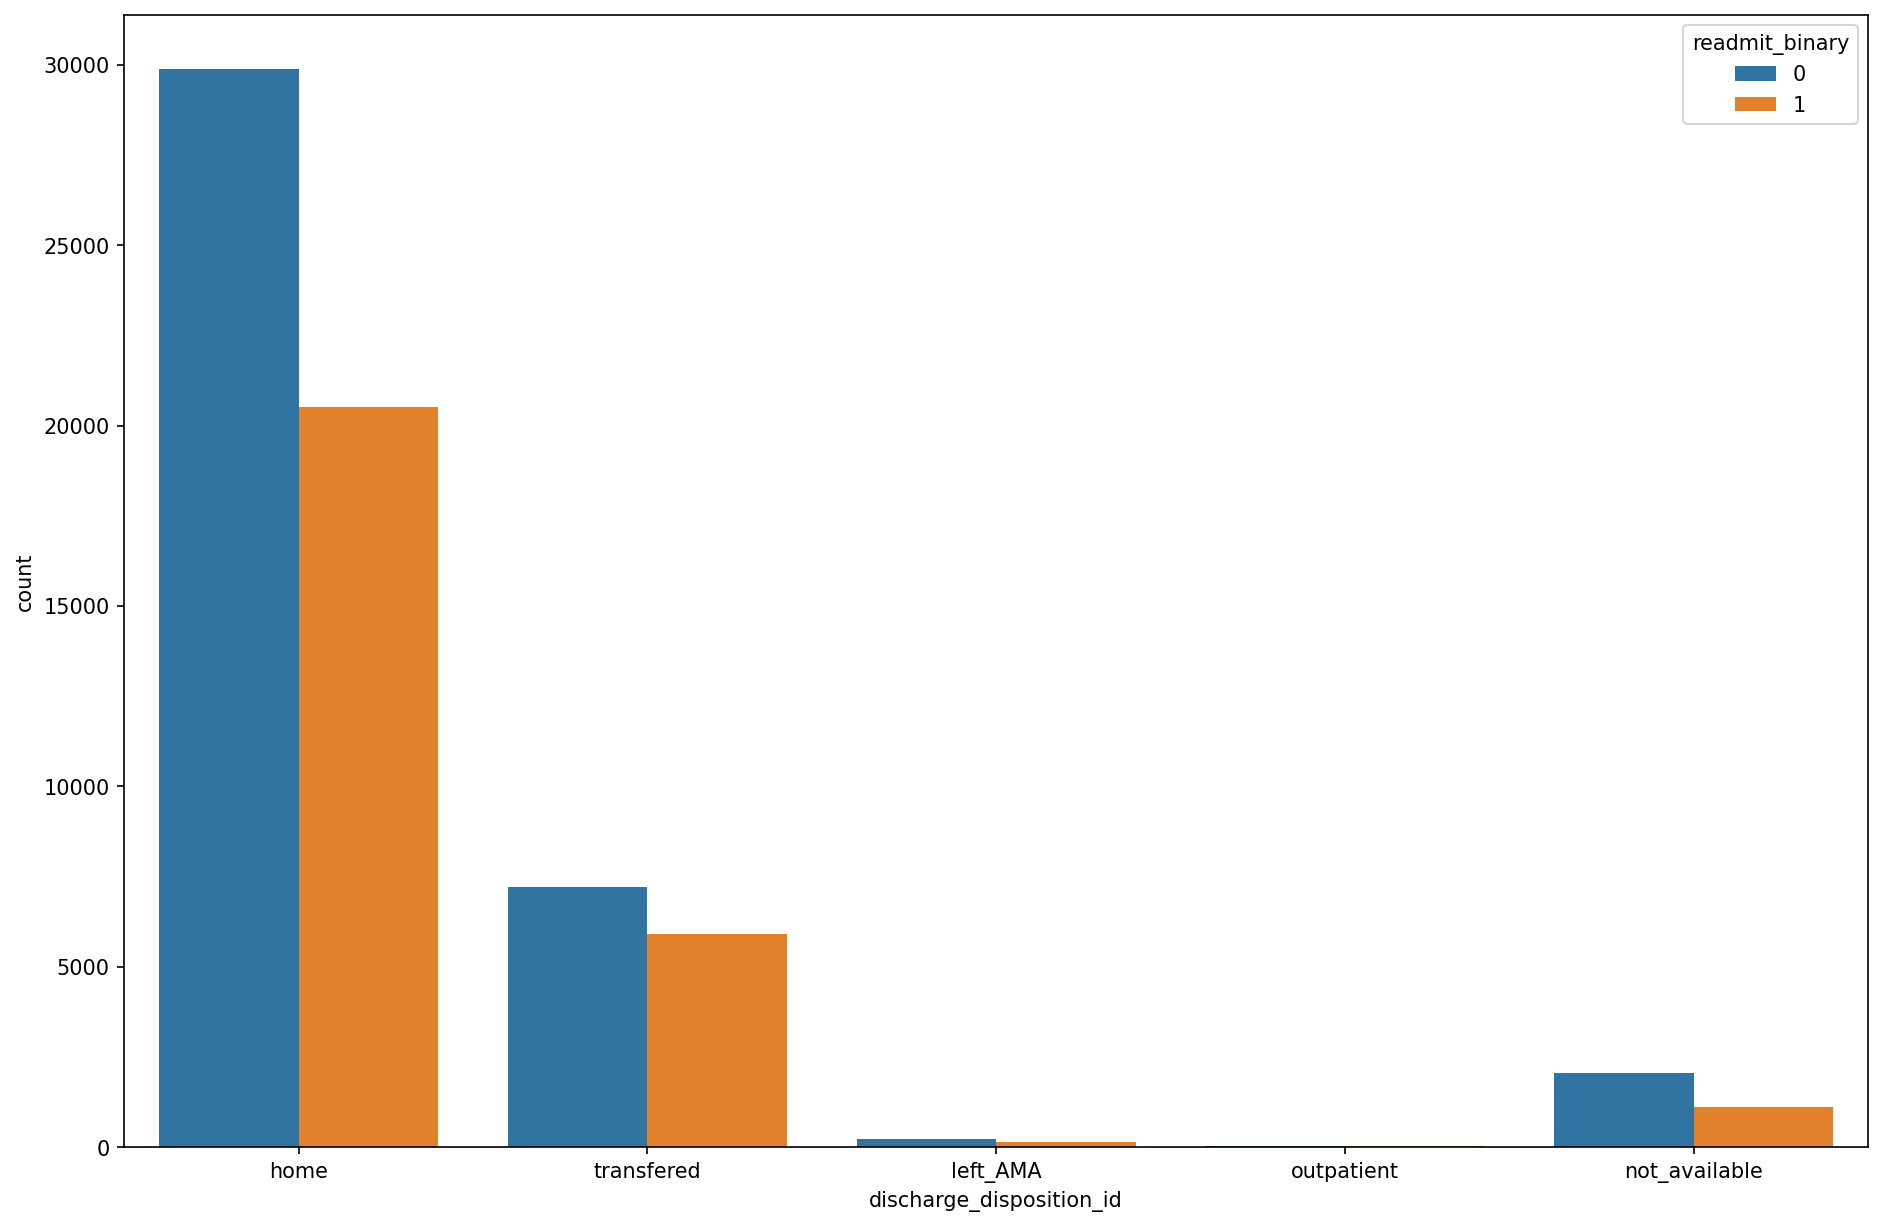

In [54]:
# Define the desired order of categories
discharge_category_order = ['home', 'transfered', 'left_AMA', 'outpatient', 'not_available']

# plotting column agaisnt target
fig, axs = plt.subplots(figsize = (15, 10), dpi = 150)

sns.countplot(data = df_clean, x = "discharge_disposition_id", hue = "readmit_binary", order=discharge_category_order)
plt.show()

### Diagnosis 1, 2, & 3

I got the ICD-code categories from https://www.aapc.com/codes/icd9-codes-range/ since the columns contain the firs three numbers of the ICD-code. I mapped the data so that the numbers will be set as their assigned category.

In [55]:
df_clean.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
admission_type_id           object
discharge_disposition_id    object
admission_source_id         object
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide           

In [175]:
df_clean[df_clean['diag_1'].str.upper().str.startswith(('V', 'E'))]

encounter_id  patient_nbr             race  gender       age  \
23            183930    107400762        Caucasian  Female   [80-90)   
42            421194     96435585        Caucasian  Female   [70-80)   
253          2926554     86209290        Caucasian  Female   [70-80)   
290          3086520     95564241        Caucasian  Female   [60-70)   
316          3187926       476343  AfricanAmerican  Female   [60-70)   
...              ...          ...              ...     ...       ...   
100445     426070562     95638878  AfricanAmerican  Female   [40-50)   
100723     429701552     85939146        Caucasian    Male   [80-90)   
100902     432071966     91291410        Caucasian  Female   [50-60)   
101081     434871134     52126479        Caucasian  Female  [90-100)   
101185     436104914    114613173        Caucasian  Female   [60-70)   

       admission_type_id discharge_disposition_id admission_source_id  \
23             emergency                     home            referral   
42             emergency                     home            referral   
253        not_available                     home            referral   
290        not_available                     home            referral   
316        not_available            not_available            referral   
...                  ...                      ...                 ...   
100445         emergency                     home            transfer   
100723          elective                     home            referral   
100902         emergency                     home            referral   
101081     not_available                     home            referral   
101185          elective                     home            referral   

        time_in_hospital  num_lab_procedures  ...  glimepiride-pioglitazone  \
23                    11                  42  ...                        No   
42                    13                  48  ...                        No   
253                    7                  37  ...                        No   
290                    8                  35  ...                        No   
316                    4                  54  ...                        No   
...                  ...                 ...  ...                       ...   
100445                 7                  28  ...                        No   
100723                 2                  29  ...                        No   
100902                 4                   1  ...                        No   
101081                 7                  29  ...                        No   
101185                 9                  43  ...                        No   

        metformin-rosiglitazone  metformin-pioglitazone  change  diabetesMed  \
23                           No                      No      No           No   
42                           No                      No      Ch          Yes   
253                          No                      No      Ch          Yes   
290                          No                      No      No          Yes   
316                          No                      No      No           No   
...                         ...                     ...     ...          ...   
100445                       No                      No      No           No   
100723                       No                      No      No          Yes   
100902                       No                      No      Ch          Yes   
101081                       No                      No      No           No   
101185                       No                      No      Ch          Yes   

       readmitted readmit_binary num_change  num_meds num_service  
23            >30              1          0         0           0  
42            >30              1          0         3           1  
253            NO              0          1         1           1  
290            NO              0          0         1           1  
316            N

In [56]:
listname = [('infections', 139),
            ('neoplasms', (239 - 139)),
            ('endocrine', (279 - 239)),
            ('blood', (289 - 279)),
            ('mental', (319 - 289)),
            ('nervous', (359 - 319)),
            ('sense', (389 - 359)),
            ('circulatory', (459-389)),
            ('respiratory', (519-459)),
            ('digestive', (579 - 519)),
            ('genitourinary', (629 - 579)),
            ('pregnancy', (679 - 629)),
            ('skin', (709 - 679)),
            ('musculoskeletal', (739 - 709)),
            ('congenital', (759 - 739)),
            ('perinatal', (779 - 759)),
            ('ill-defined', (799 - 779)),
            ('injury', (999 - 799))]

In [152]:
def categorize_diagnosis(value, categories):
    for category, range_value in categories:
        if value <= range_value:
            return category
        else:
            value -= range_value
    return 'unknown'

In [153]:
columns_to_categorize = ['diag_1', 'diag_2', 'diag_3']

for column in columns_to_categorize:
    df_clean[column] = df_clean[column].apply(categorize_diagnosis, args=(listname,))

TypeError: '<=' not supported between instances of 'str' and 'int'

In [157]:
listname = [('infections', 139),
            ('neoplasms', (239 - 139)),
            ('endocrine', (279 - 239)),
            ('blood', (289 - 279)),
            ('mental', (319 - 289)),
            ('nervous', (359 - 319)),
            ('sense', (389 - 359)),
            ('circulatory', (459 - 389)),
            ('respiratory', (519 - 459)),
            ('digestive', (579 - 519)),
            ('genitourinary', (629 - 579)),
            ('pregnancy', (679 - 629)),
            ('skin', (709 - 679)),
            ('musculoskeletal', (739 - 709)),
            ('congenital', (759 - 739)),
            ('perinatal', (779 - 759)),
            ('ill-defined', (799 - 779)),
            ('injury', (999 - 799))]

def categorize_diagnosis(value, categories):
    for category, range_value in categories:
        if value <= range_value:
            return category
        else:
            value -= range_value
    return 'unknown'

In [158]:
columns_to_categorize = ['diag_1', 'diag_2', 'diag_3']

for column in columns_to_categorize:
    df_clean[column] = df_clean[column].apply(categorize_diagnosis, args=(listname,))

df_clean['diag_1'] = df_clean['diag_1'].replace(['V', 'E'], 'other')
df_clean['diag_2'] = df_clean['diag_2'].replace(['V', 'E'], 'other')
df_clean['diag_3'] = df_clean['diag_3'].replace(['V', 'E'], 'other')

TypeError: '<=' not supported between instances of 'str' and 'int'

In [159]:
listname = [('infections', 139),
            ('neoplasms', (239 - 139)),
            ('endocrine', (279 - 239)),
            ('blood', (289 - 279)),
            ('mental', (319 - 289)),
            ('nervous', (359 - 319)),
            ('sense', (389 - 359)),
            ('circulatory', (459 - 389)),
            ('respiratory', (519 - 459)),
            ('digestive', (579 - 519)),
            ('genitourinary', (629 - 579)),
            ('pregnancy', (679 - 629)),
            ('skin', (709 - 679)),
            ('musculoskeletal', (739 - 709)),
            ('congenital', (759 - 739)),
            ('perinatal', (779 - 759)),
            ('ill-defined', (799 - 779)),
            ('injury', (999 - 799))]

def categorize_diagnosis(value, categories):
    value = int(value)  # Convert value to an integer
    for category, range_value in categories:
        if value <= range_value:
            return category
        else:
            value -= range_value
    return 'unknown'

In [163]:
columns_to_categorize = ['diag_1', 'diag_2', 'diag_3']

for column in columns_to_categorize:
    df_clean[column] = df_clean[column].apply(categorize_diagnosis, args=(listname,))

df_clean['diag_1'] = df_clean['diag_1'].replace(['V', 'E'], 'other')
df_clean['diag_2'] = df_clean['diag_2'].replace(['V', 'E'], 'other')
df_clean['diag_3'] = df_clean['diag_3'].replace(['V', 'E'], 'other')


<ipython-input-163-e39e191e4227>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[column] = df_clean[column].apply(categorize_diagnosis, args=(listname,))
<ipython-input-163-e39e191e4227>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['diag_1'] = df_clean['diag_1'].replace(['V', 'E'], 'other')
<ipython-input-163-e39e191e4227>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [161]:
def categorize_diagnosis(value, categories):
    try:
        value = int(value)  # Convert the value to an integer
        for category, range_value in categories:
            if value <= range_value:
                return category
            else:
                value -= range_value
    except ValueError:
        return 'unknown'  # Return a default category for non-integer values

In [57]:
def categorize_diagnosis(value, categories):
    try:
        value = float(value)  # Convert value to a float
        for category, range_value in categories:
            if value <= range_value:
                return category
            else:
                value -= range_value
    except ValueError:
        pass
    return 'unknown'

def replace_diag_values(value):
    if value[0].lower() in ['v', 'e']:
        return 'other'
    else:
        return value

In [58]:
columns_to_categorize = ['diag_1', 'diag_2', 'diag_3']

for column in columns_to_categorize:
    df_clean[column] = df_clean[column].apply(categorize_diagnosis, args=(listname,))
    df_clean[column] = df_clean[column].apply(replace_diag_values)

In [59]:
df_clean['diag_1'].value_counts()

circulatory        20696
other               6897
respiratory         6235
digestive           6099
ill-defined         5326
injury              4487
musculoskeletal     3872
genitourinary       3320
neoplasms           2435
skin                1710
infections          1632
mental              1455
unknown              892
blood                640
nervous              626
pregnancy            559
sense                207
congenital            40
Name: diag_1, dtype: int64

In [60]:
df_clean['diag_2'].value_counts()

circulatory        21210
other              14303
respiratory         6286
genitourinary       4936
ill-defined         3064
digestive           2624
skin                2139
blood               2023
mental              1769
injury              1744
unknown             1731
neoplasms           1562
musculoskeletal     1254
infections          1188
nervous              744
pregnancy            351
sense                122
congenital            78
Name: diag_2, dtype: int64

In [62]:
df_clean['diag_3'].value_counts()

circulatory        20127
other              18496
respiratory         4146
genitourinary       3691
unknown             3458
ill-defined         3003
digestive           2393
mental              2089
blood               1699
skin                1473
injury              1365
musculoskeletal     1327
infections          1202
neoplasms           1129
nervous              987
pregnancy            269
sense                203
congenital            71
Name: diag_3, dtype: int64

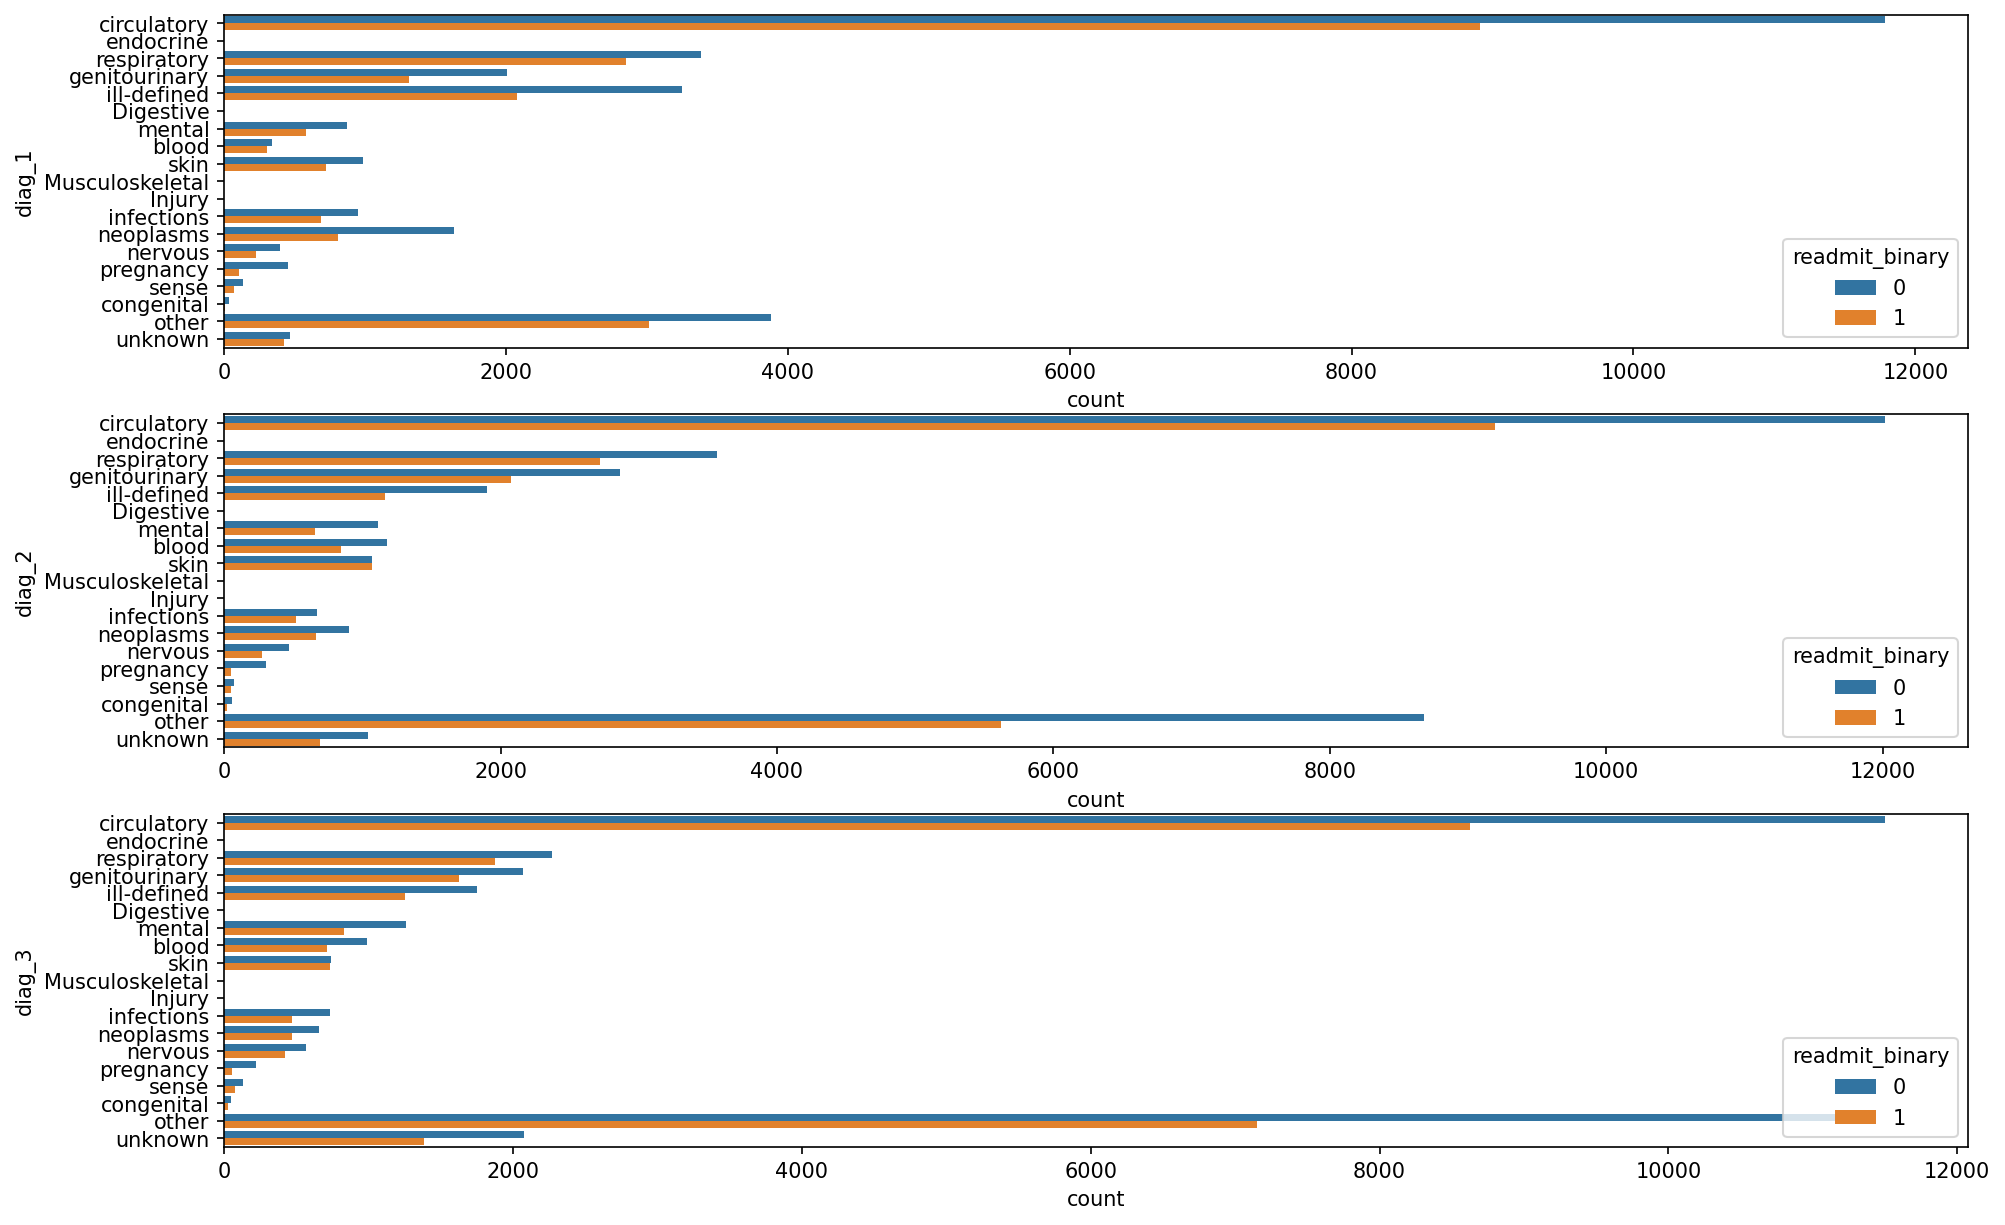

In [63]:
list_diag = ['circulatory', 'endocrine', 'respiratory', 'genitourinary', 
             'ill-defined', 'Digestive', 'mental', 'blood', 'skin', 
             'Musculoskeletal', 'Injury', 'infections', 'neoplasms', 'nervous', 
             'pregnancy', 'sense', 'congenital', 'other',  'unknown']

# graph
fig, axs = plt.subplots(3, 1, figsize = (15, 10), dpi=150)

sns.countplot(data = df_clean, y = "diag_1", hue = "readmit_binary", ax = axs[0], order = list_diag)
sns.countplot(data = df_clean, y = "diag_2", hue = "readmit_binary", ax = axs[1], order = list_diag)
sns.countplot(data = df_clean, y = "diag_3", hue = "readmit_binary", ax = axs[2], order = list_diag)
plt.show()

## Checking for Skewness and Kurtosis

In [64]:
df_clean

encounter_id  patient_nbr             race  gender      age  \
1             149190     55629189        Caucasian  Female  [10-20)   
2              64410     86047875  AfricanAmerican  Female  [20-30)   
3             500364     82442376        Caucasian    Male  [30-40)   
4              16680     42519267        Caucasian    Male  [40-50)   
5              35754     82637451        Caucasian    Male  [50-60)   
...              ...          ...              ...     ...      ...   
101754     443842016    183087545        Caucasian  Female  [70-80)   
101755     443842022    188574944            Other  Female  [40-50)   
101756     443842070    140199494            Other  Female  [60-70)   
101758     443842340    120975314        Caucasian  Female  [80-90)   
101765     443867222    175429310        Caucasian    Male  [70-80)   

       admission_type_id discharge_disposition_id admission_source_id  \
1              emergency                     home       emergencyRoom   
2              emergency                     home       emergencyRoom   
3              emergency                     home       emergencyRoom   
4              emergency                     home       emergencyRoom   
5              emergency                     home            referral   
...                  ...                      ...                 ...   
101754         emergency                     home       emergencyRoom   
101755         emergency                     home       emergencyRoom   
101756         emergency                     home       emergencyRoom   
101758         emergency                     home       emergencyRoom   
101765         emergency                     home       emergencyRoom   

        time_in_hospital  num_lab_procedures  ...  glimepiride-pioglitazone  \
1                      3                  59  ...                        No   
2                      2                  11  ...                        No   
3                      2                  44  ...                        No   
4                      1                  51  ...                        No   
5                      3                  31  ...                        No   
...                  ...                 ...  ...                       ...   
101754                 9                  50  ...                        No   
101755                14                  73  ...                        No   
101756                 2                  46  ...                        No   
101758                 5                  76  ...                        No   
101765                 6                  13  ...                        No   

        metformin-rosiglitazone  metformin-pioglitazone  change  diabetesMed  \
1                            No                      No      Ch          Yes   
2                            No                      No      No          Yes   
3                            No                      No      Ch          Yes   
4                            No                      No      Ch          Yes   
5                            No                      No      No          Yes   
...                         ...                     ...     ...          ...   
101754                       No                      No      Ch          Yes   
101755                       No                      No      Ch          Yes   
101756                       No                      No      No          Yes   
101758                       No                      No      Ch          Yes   
101765                       No                      No      No           No   

       readmitted readmit_binary num_change  num_meds num_service  
1             >30              1          1         1           0  
2              NO              0          0         1           3  
3              NO              0          1         1           0  
4              NO              0          0         2           0  
5             >30           

In [65]:
# Get the list of the numerical variable  
num_features = list(set(list(df_clean._get_numeric_data().columns))- {'encounter_id', 'patient_nbr', 
                                                                      'readmitted'})
num_features

['readmit_binary',
 'num_procedures',
 'number_outpatient',
 'num_change',
 'number_emergency',
 'num_medications',
 'number_diagnoses',
 'num_service',
 'num_lab_procedures',
 'num_meds',
 'time_in_hospital',
 'number_inpatient']

In [66]:
len(num_features)

12

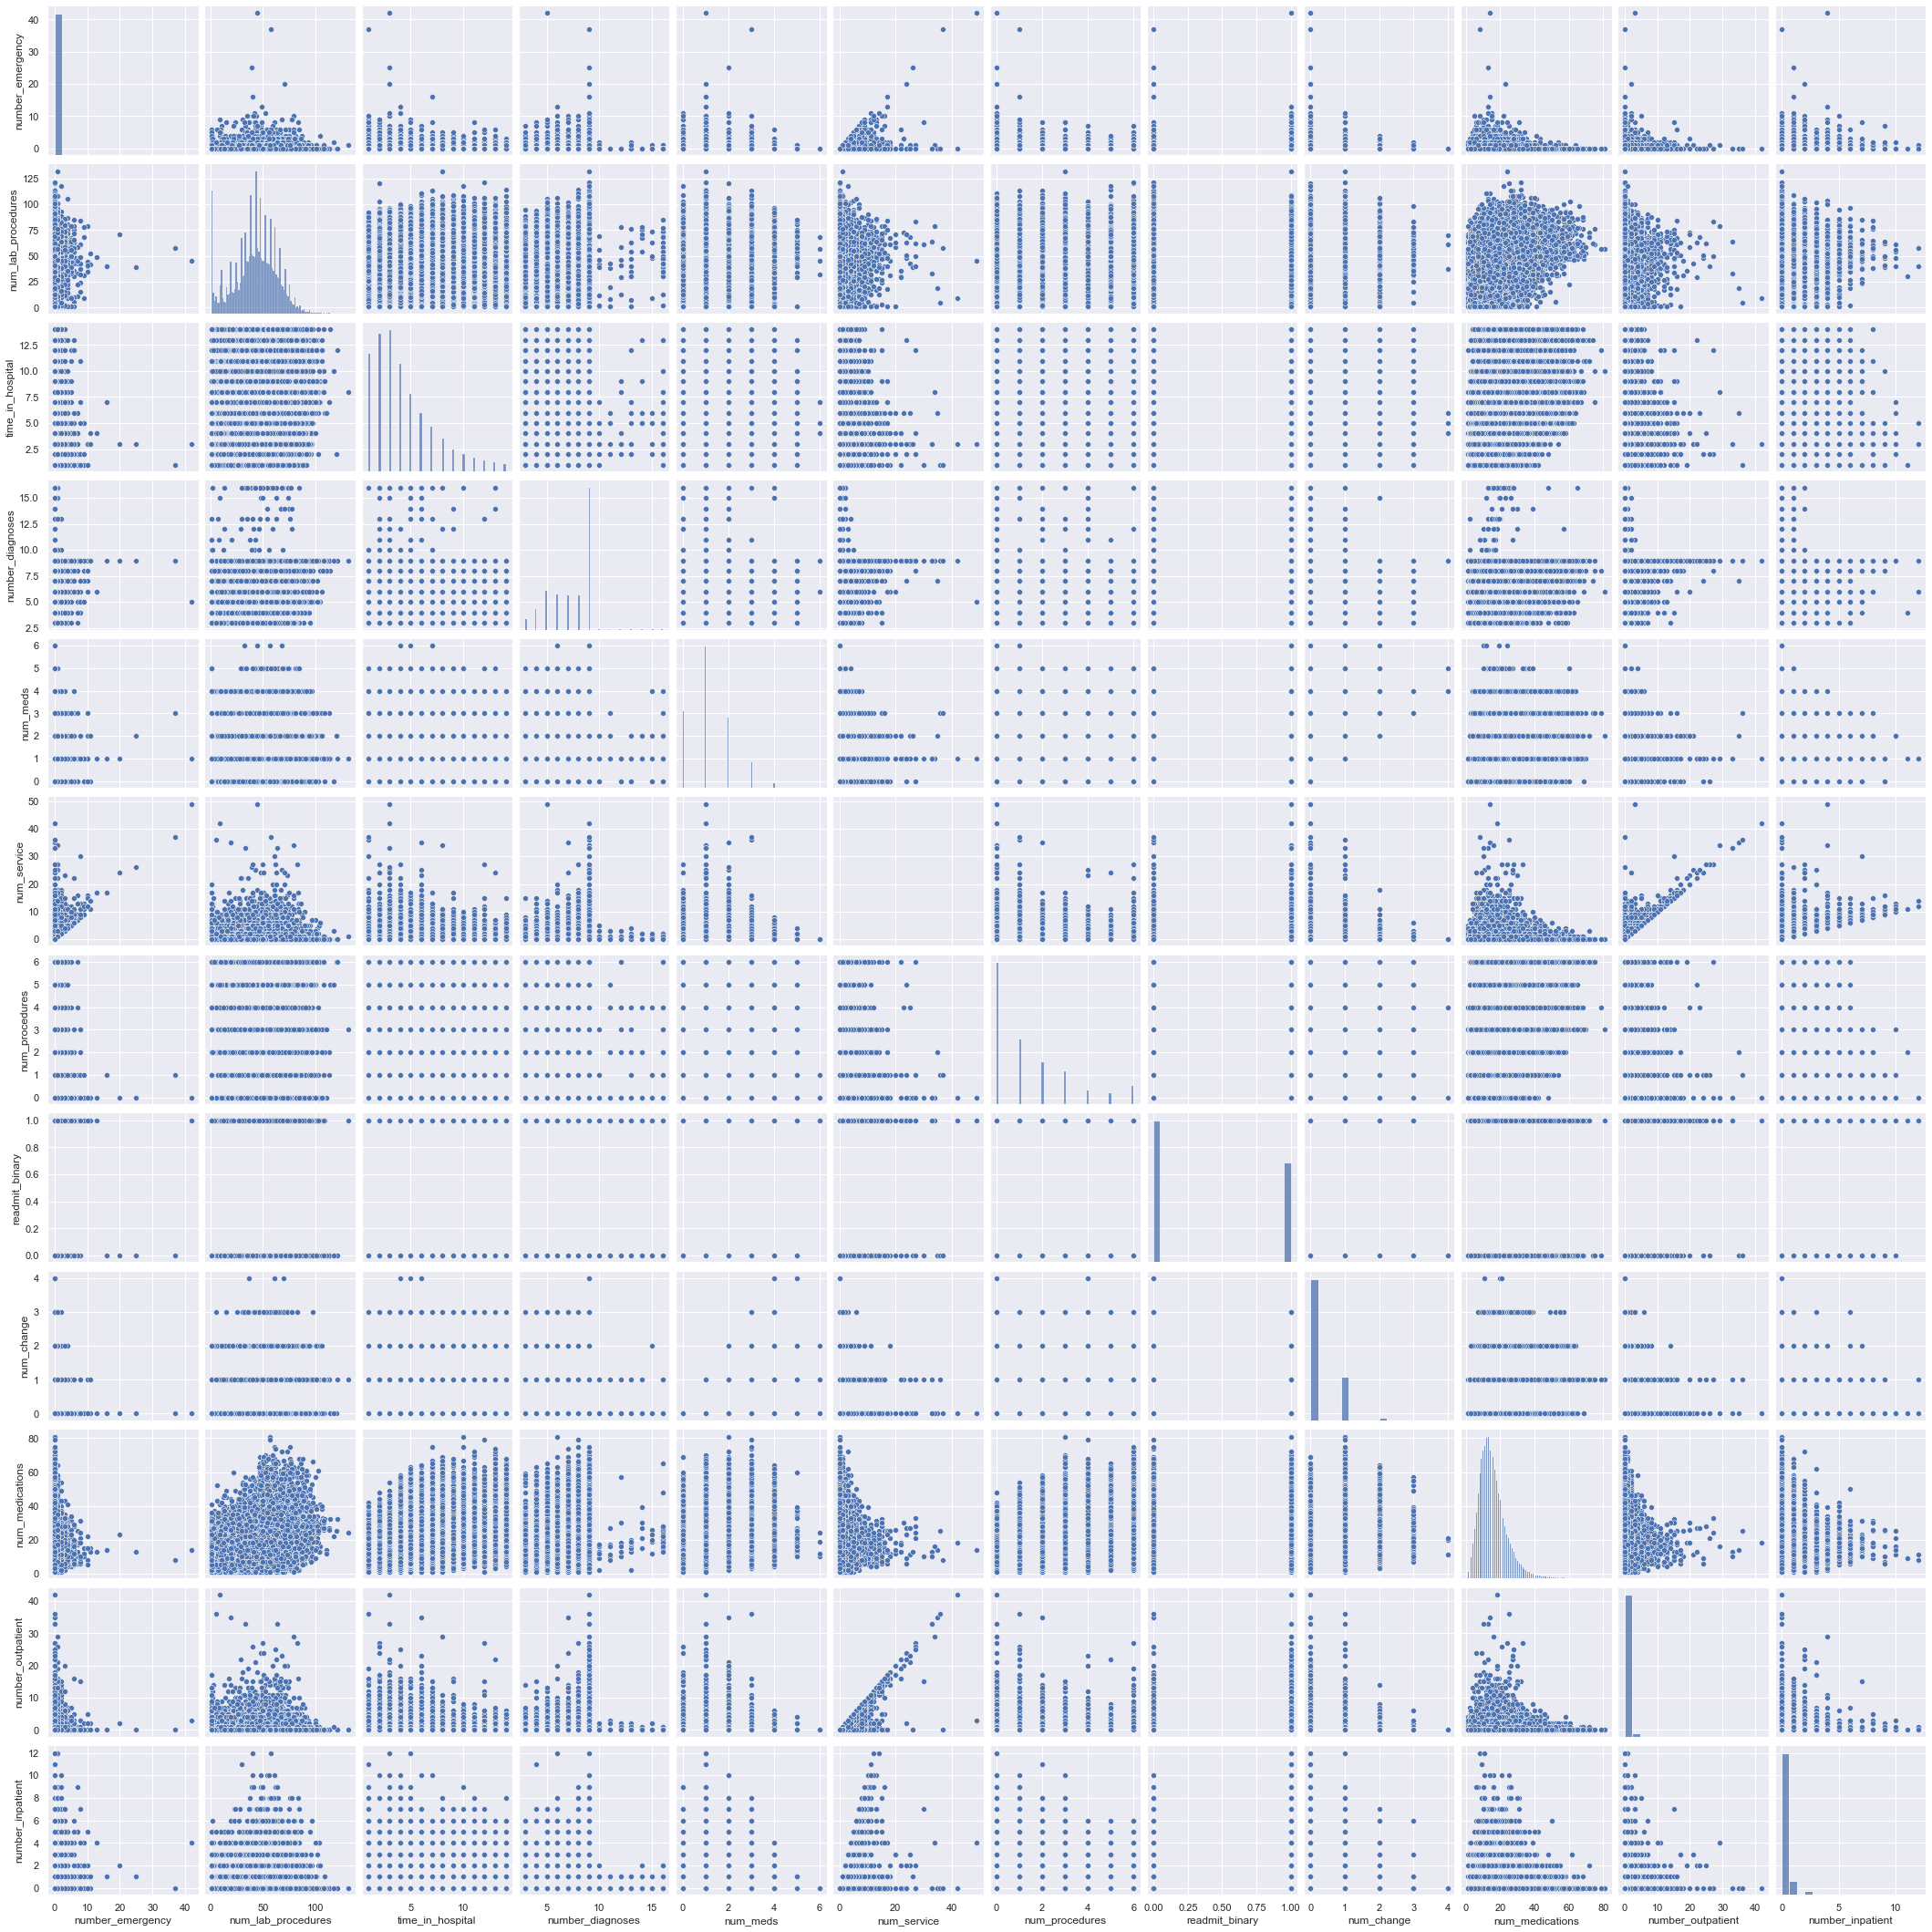

In [238]:
# Plot the pair scatter plot to check the distribution 
sns.set()
cols = num_features
sns.pairplot(df_clean[cols], height = 2.5)
plt.show();

**Skewness and kurtosis** are statistical measures used to assess the shape and distribution of a variable. They can provide insights into the symmetry, tail heaviness, and presence of outliers in the data.

Skewness: Skewness measures the asymmetry of the distribution. It indicates whether the data is skewed to the left (negative skew) or to the right (positive skew), or if it is approximately symmetric (skewness close to zero). Skewness values greater than +1 or less than -1 suggest significant skewness.

- Positive skewness: The tail is longer on the right side, indicating a concentration of values on the left side.
- Negative skewness: The tail is longer on the left side, indicating a concentration of values on the right side.
- Skewness close to zero: The distribution is approximately symmetric.


Kurtosis: Kurtosis measures the heaviness of the tails and the presence of outliers. It tells us whether the data has heavy tails (leptokurtic) or light tails (platykurtic) compared to a normal distribution.

- Leptokurtic: Positive kurtosis indicates heavy tails, meaning the distribution has more outliers and extreme values.
- Platykurtic: Negative kurtosis indicates light tails, meaning the distribution has fewer outliers and extreme values.
- Mesokurtic: Kurtosis close to zero indicates a normal distribution with tails similar to a normal distribution.

In [67]:
from scipy import stats
i=['number_emergency',
 'num_lab_procedures',
 'time_in_hospital',
 'number_diagnoses',
 'num_meds',
 'num_service',
 'num_procedures',
 'num_change',
 'num_medications',
 'number_outpatient',
 'number_inpatient']
print('**SKEW**')
print(df_clean[i].skew())
print("------------------------------------")
print('**KURT**')
print(df_clean[i].kurt())

**SKEW**
number_emergency      21.069631
num_lab_procedures    -0.218263
time_in_hospital       1.165989
number_diagnoses      -0.657276
num_meds               0.666642
num_service            6.623027
num_procedures         1.212419
num_change             1.607394
num_medications        1.443192
number_outpatient      9.614917
number_inpatient       5.423964
dtype: float64
------------------------------------
**KURT**
number_emergency      1185.125073
num_lab_procedures      -0.302810
time_in_hospital         0.970077
number_diagnoses        -0.638480
num_meds                 0.190318
num_service             96.275706
num_procedures           0.521346
num_change               2.103247
num_medications          3.894295
number_outpatient      181.321453
number_inpatient        44.404141
dtype: float64


Using the threshold=+-1 as skewness and kurtosis with a threhold=3 for normal distribution, I identified the features that need transformations. 

The variables that need to be transformed are: 1. number_emergency 2. time_in_hospital 3. num_service 4. num_procedures 5. num_change 6. num_medications 7. num_outpatient 8. num_inpatient

In [68]:
# log transforamtion for the skewed numerical variables 
key_log = ['number_emergency', 'time_in_hospital', 'num_service',
           'num_procedures', 'num_change', 'num_medications', 
           'number_outpatient', 'number_inpatient']

# make a new dataframe for transformed data
df_transformed = df_clean.copy()

for col in key_log:
    # Check if the absolute skewness of the column is greater than or equal to 1
    if abs(df_transformed[col].skew())>=1:
        df_transformed[col+"_log"]=np.log1p(df_transformed[col])
        print([col+"_log"],df_transformed[col+"_log"].skew())

['number_emergency_log'] 4.1998733304883995
['time_in_hospital_log'] 0.12488420267147667
['num_service_log'] 1.869059781848163
['num_procedures_log'] 0.43596779989273254
['num_change_log'] 1.2999115432824588
['num_medications_log'] -0.4227694429677328
['number_outpatient_log'] 3.113032860677628
['number_inpatient_log'] 3.0472947110987327


In [260]:
# log transforamtion for the skewed numerical variables 
key_log = ['number_emergency', 'time_in_hospital', 'num_service',
           'num_procedures', 'num_change', 'num_medications', 
           'number_outpatient', 'number_inpatient']

# make a new dataframe for transformed data
df_transformed = df_clean.copy()

for col in key_log:
    # Check if the absolute skewness of the column is greater than or equal to 1
    if abs(df_transformed[col].skew()) >= 1:
        # Create a new column name by appending "_log" to the original column name
        new_col_name = col + "_log"
        # Apply log transformation using np.log1p to the values in the column
        transformed_values = np.log1p(df_transformed[col])
        # Assign the transformed values to the new column in the dataframe
        df_transformed[new_col_name] = transformed_values
        # Print the column name and its skewness after the transformation
        print([new_col_name], df_transformed[new_col_name].skew())


['number_emergency_log'] 4.1998733304883995
['time_in_hospital_log'] 0.12488420267147667
['num_service_log'] 1.869059781848163
['num_procedures_log'] 0.43596779989273254
['num_change_log'] 1.2999115432824588
['num_medications_log'] -0.4227694429677328
['number_outpatient_log'] 3.113032860677628
['number_inpatient_log'] 3.0472947110987327


In [69]:
# Log transformation for the skewed numerical variables
key_log = ['number_emergency', 'time_in_hospital', 'num_service',
           'num_procedures', 'num_change', 'num_medications',
           'number_outpatient', 'number_inpatient']

# Make a new dataframe for transformed data
df_transformed = df_clean.copy()

for col in key_log:
    # Check if the absolute skewness of the column is greater than or equal to 1
    if abs(df_transformed[col].skew()) >= 1:
        # Create a new column name with "_log" suffix
        new_col_name = col + "_log"
        # Apply log transformation to the column and assign it to the new column
        df_transformed[new_col_name] = np.log1p(df_transformed[col])
        # Print the new column name and its skewness after transformation
        print([new_col_name], df_transformed[new_col_name].skew())
        # Drop the original column from the dataframe
        df_transformed.drop(columns=[col], inplace=True)

['number_emergency_log'] 4.1998733304883995
['time_in_hospital_log'] 0.12488420267147667
['num_service_log'] 1.869059781848163
['num_procedures_log'] 0.43596779989273254
['num_change_log'] 1.2999115432824588
['num_medications_log'] -0.4227694429677328
['number_outpatient_log'] 3.113032860677628
['number_inpatient_log'] 3.0472947110987327


In [70]:
df_transformed

encounter_id  patient_nbr             race  gender      age  \
1             149190     55629189        Caucasian  Female  [10-20)   
2              64410     86047875  AfricanAmerican  Female  [20-30)   
3             500364     82442376        Caucasian    Male  [30-40)   
4              16680     42519267        Caucasian    Male  [40-50)   
5              35754     82637451        Caucasian    Male  [50-60)   
...              ...          ...              ...     ...      ...   
101754     443842016    183087545        Caucasian  Female  [70-80)   
101755     443842022    188574944            Other  Female  [40-50)   
101756     443842070    140199494            Other  Female  [60-70)   
101758     443842340    120975314        Caucasian  Female  [80-90)   
101765     443867222    175429310        Caucasian    Male  [70-80)   

       admission_type_id discharge_disposition_id admission_source_id  \
1              emergency                     home       emergencyRoom   
2              emergency                     home       emergencyRoom   
3              emergency                     home       emergencyRoom   
4              emergency                     home       emergencyRoom   
5              emergency                     home            referral   
...                  ...                      ...                 ...   
101754         emergency                     home       emergencyRoom   
101755         emergency                     home       emergencyRoom   
101756         emergency                     home       emergencyRoom   
101758         emergency                     home       emergencyRoom   
101765         emergency                     home       emergencyRoom   

        num_lab_procedures         diag_1  ... readmit_binary num_meds  \
1                       59          other  ...              1        1   
2                       11      pregnancy  ...              0        1   
3                       44     infections  ...              0        1   
4                       51      neoplasms  ...              0        2   
5                       31    circulatory  ...              1        1   
...                    ...            ...  ...            ...      ...   
101754                  50      digestive  ...              1        2   
101755                  73  genitourinary  ...              1        2   
101756                  46         injury  ...              1        1   
101758                  76         mental  ...              0        1   
101765                  13      digestive  ...              0        0   

        number_emergency_log time_in_hospital_log num_service_log  \
1                   0.000000             1.386294        0.000000   
2                   0.000000             1.098612        1.386294   
3                   0.000000             1.098612        0.000000   
4                   0.000000             0.693147        0.000000   
5                   0.000000             1.386294        0.000000   
...                      ...                  ...             ...   
101754              0.000000             2.302585        0.000000   
101755              0.693147             2.708050        0.693147   
101756              0.693147             1.098612        1.386294   
101758              0.693147             1.791759        0.693147   
101765              0.000000             1.945910        0.000000   

       num_procedures_log num_change_log num_medications_log  \
1                0.000000       0.693147            2.944439   
2                1.791759       0.000000            2.639057   
3                0.693147       0.693147            2.833213   
4                0.000000       0.000000            2.197225   
5                1.945910       0.000000            2.833213   
...                   ...            ...                 ...   
101754           1.098612       0.693147            3.526361   
101755           1.945910       0.693147        

## Correlation

In [270]:
#Check the correlation between variables 
train_col = df_transformed.corr()
train_col

encounter_id  patient_nbr  num_lab_procedures  \
encounter_id               1.000000     0.502228           -0.058859   
patient_nbr                0.502228     1.000000            0.001283   
num_lab_procedures        -0.058859     0.001283            1.000000   
number_diagnoses           0.245758     0.215972            0.151670   
readmit_binary            -0.109522     0.066112            0.052912   
num_meds                   0.051043     0.028800            0.043157   
number_emergency_log       0.066429     0.070867            0.017562   
time_in_hospital_log      -0.076025    -0.020247            0.344492   
num_service_log            0.068534     0.155542            0.027244   
num_procedures_log        -0.017247    -0.031083            0.024305   
num_change_log             0.077521     0.046130            0.128990   
num_medications_log        0.055240     0.020428            0.251713   
number_outpatient_log      0.089887     0.110971           -0.022485   
number_inpatient_log      -0.042297     0.098556            0.081976   

                       number_diagnoses  readmit_binary  num_meds  \
encounter_id                   0.245758       -0.109522  0.051043   
patient_nbr                    0.215972        0.066112  0.028800   
num_lab_procedures             0.151670        0.052912  0.043157   
number_diagnoses               1.000000        0.102552  0.017337   
readmit_binary                 0.102552        1.000000  0.035510   
num_meds                       0.017337        0.035510  1.000000   
number_emergency_log           0.062828        0.091005  0.019670   
time_in_hospital_log           0.238713        0.067345  0.096748   
num_service_log                0.113673        0.162255  0.020588   
num_procedures_log             0.062994       -0.031088 -0.002425   
num_change_log                 0.069635        0.039678  0.311133   
num_medications_log            0.275322        0.056262  0.257860   
number_outpatient_log          0.085032        0.078441  0.021267   
number_inpatient_log           0.068442        0.152053 -0.005673   

                       number_emergency_log  time_in_hospital_log  \
encounter_id                       0.066429             -0.076025   
patient_nbr                        0.070867             -0.020247   
num_lab_procedures                 0.017562              0.344492   
number_diagnoses                   0.062828              0.238713   
readmit_binary                     0.091005              0.067345   
num_meds                           0.019670              0.096748   
number_emergency_log               1.000000             -0.006268   
time_in_hospital_log              -0.006268              1.000000   
num_service_log                    0.506313              0.015952   
num_procedures_log                -0.040238              0.178887   
num_change_log                     0.044371              0.170585   
num_medications_log                0.015889              0.460504   
number_outpatient_log              0.141503             -0.021845   
number_inpatient_log               0.157103              0.066392   

                       num_service_log  num_procedures_log  num_change_log  \
encounter_id                  0.068534           -0.017247        0.077521   
patient_nbr                   0.155542           -0.031083        0.046130   
num_lab_procedures            0.027244            0.024305        0.128990   
number_diagnoses              0.113673            0.062994        0.069635   
readmit_binary                0.162255           -0.031088        0.039678   
num_meds                      0.020588           -0.002425        0.311133   
number_emergency_log          0.506313           -0.040238        0.044371   
time_in_hospital_log          0.015952            0.178887        0.170585   
num_service_log               1.000000           -0.037826        0.037952   
num_procedures_log           -0.037826            1.000000        0.011069   
num_change_l

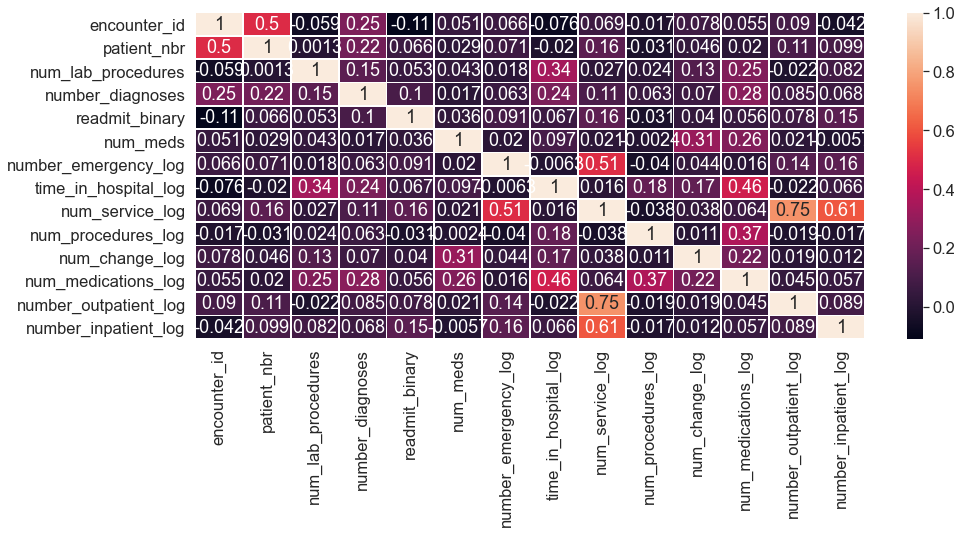

In [271]:
# creating dataset correlation heatmap
sns.heatmap(df_transformed.corr(), annot=True, linewidths=.7);

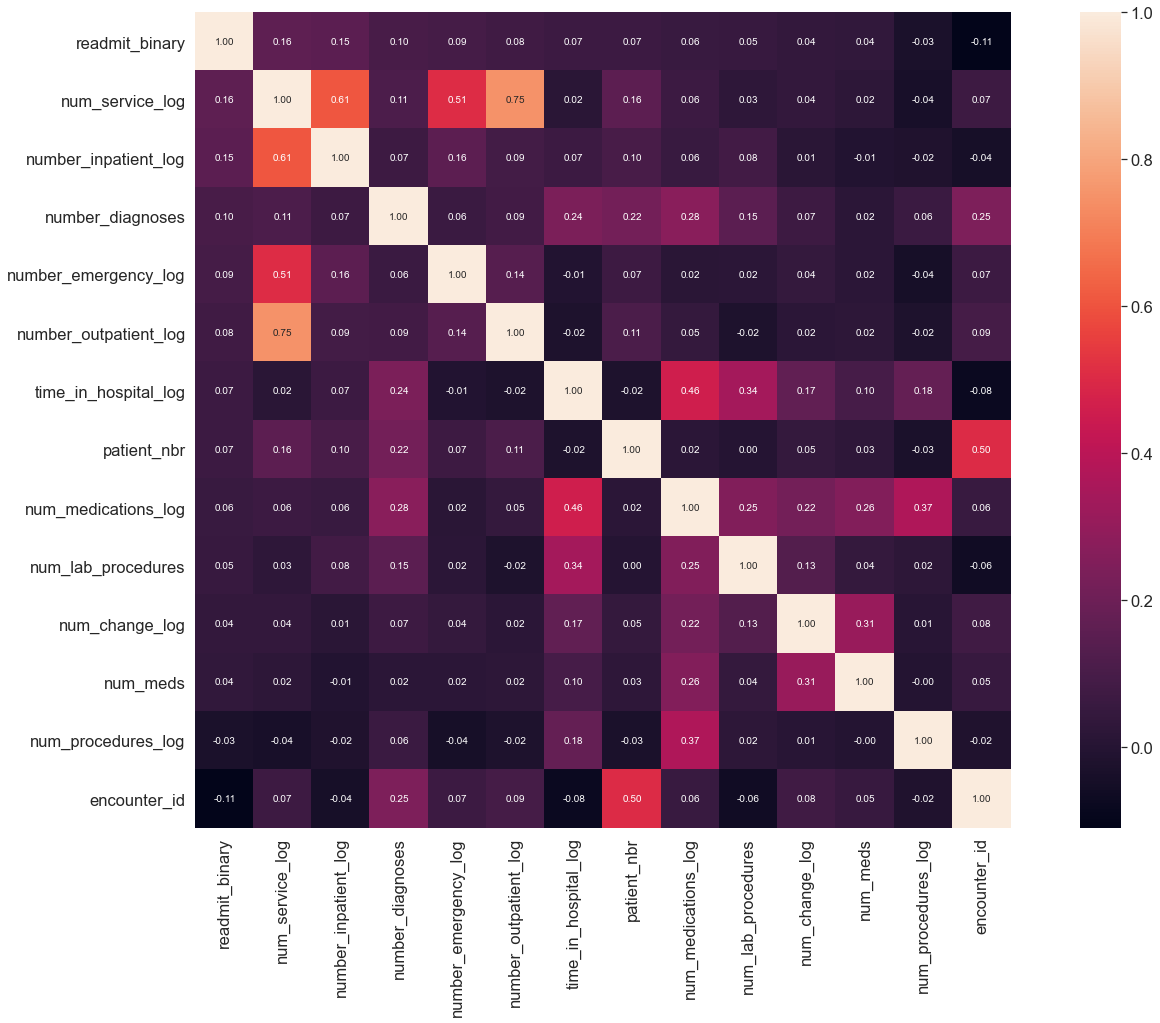

''

In [272]:
# find the top 15 correlated variables 
k = 15
cols = train_col.nlargest(k,'readmit_binary')['readmit_binary'].index
cm = np.corrcoef(df_transformed[cols].values.T)

sns.set(font_scale=1.5)
hm = plt.subplots(figsize=(25, 15))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values)

plt.show()
;

## Train-Test-Split

In [414]:
X = df_clean.drop(['encounter_id', 'patient_nbr', 'readmit_binary', 'readmitted'], axis=1)
y = df_clean['readmit_binary']

In [71]:
X = df_transformed.drop(['encounter_id', 'patient_nbr', 'readmit_binary', 'readmitted'], axis=1)
y = df_transformed['readmit_binary']

In [415]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [73]:
y_train

82191    0
39533    0
31892    0
25701    0
73635    0
        ..
52295    1
8161     1
80859    0
997      1
22456    1
Name: readmit_binary, Length: 46989, dtype: int64

In [74]:
X

race  gender      age admission_type_id  \
1             Caucasian  Female  [10-20)         emergency   
2       AfricanAmerican  Female  [20-30)         emergency   
3             Caucasian    Male  [30-40)         emergency   
4             Caucasian    Male  [40-50)         emergency   
5             Caucasian    Male  [50-60)         emergency   
...                 ...     ...      ...               ...   
101754        Caucasian  Female  [70-80)         emergency   
101755            Other  Female  [40-50)         emergency   
101756            Other  Female  [60-70)         emergency   
101758        Caucasian  Female  [80-90)         emergency   
101765        Caucasian    Male  [70-80)         emergency   

       discharge_disposition_id admission_source_id  num_lab_procedures  \
1                          home       emergencyRoom                  59   
2                          home       emergencyRoom                  11   
3                          home       emergencyRoom                  44   
4                          home       emergencyRoom                  51   
5                          home            referral                  31   
...                         ...                 ...                 ...   
101754                     home       emergencyRoom                  50   
101755                     home       emergencyRoom                  73   
101756                     home       emergencyRoom                  46   
101758                     home       emergencyRoom                  76   
101765                     home       emergencyRoom                  13   

               diag_1         diag_2       diag_3  ...  diabetesMed num_meds  \
1               other          other        other  ...          Yes        1   
2           pregnancy          other      unknown  ...          Yes        1   
3          infections          other  circulatory  ...          Yes        1   
4           neoplasms      neoplasms        other  ...          Yes        2   
5         circulatory    circulatory        other  ...          Yes        1   
...               ...            ...          ...  ...          ...      ...   
101754      digestive      digestive        other  ...          Yes        2   
101755  genitourinary  genitourinary  respiratory  ...          Yes        2   
101756         injury  genitourinary  circulatory  ...          Yes        1   
101758         mental     infections       mental  ...          Yes        1   
101765      digestive      digestive  ill-defined  ...           No        0   

       number_emergency_log time_in_hospital_log num_service_log  \
1                  0.000000             1.386294        0.000000   
2                  0.000000             1.098612        1.386294   
3                  0.000000             1.098612        0.000000   
4                  0.000000             0.693147        0.000000   
5                  0.000000             1.386294        0.000000   
...                     ...                  ...             ...   
101754             0.000000             2.302585        0.000000   
101755             0.693147             2.708050        0.693147   
101756             0.693147             1.098612        1.386294   
101758             0.693147             1.791759        0.693147   
101765             0.000000             1.945910        0.000000   

       num_procedures_log num_change_log num_medications_log  \
1                0.000000       0.693147            2.944439   
2                1.791759       0.000000            2.639057   
3                0.693147       0.693147            2.833213   
4                0.000000       0.000000            2.197225   
5                1.945910       0.000000            2.833213   
...                   ...            ...                 ...   
101754           1.098612       0.693147            3.526361   
101755           1.945910       0.693147            3.295837   
101756           1.

In [75]:
len(X_train)

46989

In [77]:
X_train.columns == X_test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [78]:
X_train.shape, X_test.shape

((46989, 47), (20139, 47))

## Data Processing

I will transform data to handle the different features so that it is ready for modeling.

In [278]:
X.shape

(67128, 47)

In [91]:
X.dtypes

race                         object
gender                       object
age                          object
admission_type_id            object
discharge_disposition_id     object
admission_source_id          object
num_lab_procedures            int64
diag_1                       object
diag_2                       object
diag_3                       object
number_diagnoses              int64
max_glu_serum                object
A1Cresult                    object
metformin                    object
repaglinide                  object
nateglinide                  object
chlorpropamide               object
glimepiride                  object
acetohexamide                object
glipizide                    object
glyburide                    object
tolbutamide                  object
pioglitazone                 object
rosiglitazone                object
acarbose                     object
miglitol                     object
troglitazone                 object
tolazamide                  

In [79]:
# numerical features
numerical_features = X.columns[X.dtypes != 'object'].values
print(numerical_features)

['num_lab_procedures' 'number_diagnoses' 'num_meds' 'number_emergency_log'
 'time_in_hospital_log' 'num_service_log' 'num_procedures_log'
 'num_change_log' 'num_medications_log' 'number_outpatient_log'
 'number_inpatient_log']


In [80]:
len(numerical_features)

11

In [81]:
# object features
categorical_features = X.columns[X.dtypes == 'object'].values
print(categorical_features)

['race' 'gender' 'age' 'admission_type_id' 'discharge_disposition_id'
 'admission_source_id' 'diag_1' 'diag_2' 'diag_3' 'max_glu_serum'
 'A1Cresult' 'metformin' 'repaglinide' 'nateglinide' 'chlorpropamide'
 'glimepiride' 'acetohexamide' 'glipizide' 'glyburide' 'tolbutamide'
 'pioglitazone' 'rosiglitazone' 'acarbose' 'miglitol' 'troglitazone'
 'tolazamide' 'examide' 'citoglipton' 'insulin' 'glyburide-metformin'
 'glipizide-metformin' 'glimepiride-pioglitazone'
 'metformin-rosiglitazone' 'metformin-pioglitazone' 'change' 'diabetesMed']


In [82]:
len(categorical_features)

36

In [83]:
# Looping over each numeric feature and printing its unique values
for feature in numerical_features:
    print(feature)
    print(X_test[feature].unique())

num_lab_procedures
[ 54  67  25  47  20  57  38  43  79  34  73  59  18   5  35  36  31  86
   3  10  32   4  46  48  16  28  40  41  42  39  45  78  30  27  52  60
  58  82  29  71  21  17  70  33  37  22   1  24  53  14  44  51  62  11
  26  66  80  74  69  64  55  12  50   7  65   9  49  56  61   2  63  77
  23  68  76   6  13  72  88  19  81  84   8  83  15  90  75  85  89  93
  92  91 101  95  99 108 109  97  87  94  96 100 113  98 106 105 111 118
 107]
number_diagnoses
[ 5  6  9  7  4  8  3 16 11 14 13 10]
num_meds
[0 1 2 3 4 5 6]
number_emergency_log
[0.         0.69314718 1.09861229 1.60943791 1.38629436 1.79175947
 2.19722458 1.94591015 2.39789527 3.04452244]
time_in_hospital_log
[1.09861229 0.69314718 2.39789527 1.38629436 2.07944154 1.60943791
 2.30258509 2.7080502  1.94591015 2.19722458 1.79175947 2.48490665
 2.63905733 2.56494936]
num_service_log
[0.         1.09861229 1.38629436 1.60943791 0.69314718 1.79175947
 1.94591015 2.07944154 2.94443898 2.30258509 2.19722458 2.833

In [85]:
# Looping over each object feature and printing its unique values
for feature in categorical_features:
    print(feature)
    print(X_train[feature].unique())

race
['Caucasian' 'AfricanAmerican' 'Other' 'Hispanic' 'Asian']
gender
['Female' 'Male']
age
['[70-80)' '[60-70)' '[50-60)' '[80-90)' '[20-30)' '[30-40)' '[10-20)'
 '[40-50)' '[90-100)' '[0-10)']
admission_type_id
['emergency' 'elective' 'not_available' 'newborn']
discharge_disposition_id
['transfered' 'home' 'not_available' 'left_AMA' 'outpatient']
admission_source_id
['emergencyRoom' 'transfer' 'referral' 'unavailable']
diag_1
['injury' 'circulatory' 'genitourinary' 'other' 'respiratory'
 'musculoskeletal' 'ill-defined' 'pregnancy' 'unknown' 'digestive'
 'mental' 'neoplasms' 'infections' 'skin' 'blood' 'nervous' 'sense'
 'congenital']
diag_2
['genitourinary' 'circulatory' 'respiratory' 'ill-defined' 'mental'
 'other' 'blood' 'musculoskeletal' 'unknown' 'neoplasms' 'digestive'
 'infections' 'injury' 'skin' 'sense' 'pregnancy' 'nervous' 'congenital']
diag_3
['circulatory' 'nervous' 'other' 'genitourinary' 'injury' 'blood'
 'ill-defined' 'digestive' 'respiratory' 'unknown' 'mental'
 'mu

In [84]:
# Looping over each object feature and printing its unique values
for feature in categorical_features:
    print(feature)
    print(X_test[feature].unique())

race
['AfricanAmerican' 'Caucasian' 'Other' 'Hispanic' 'Asian']
gender
['Female' 'Male']
age
['[60-70)' '[70-80)' '[80-90)' '[10-20)' '[30-40)' '[40-50)' '[50-60)'
 '[20-30)' '[90-100)' '[0-10)']
admission_type_id
['emergency' 'not_available' 'elective' 'newborn']
discharge_disposition_id
['home' 'transfered' 'not_available' 'outpatient' 'left_AMA']
admission_source_id
['referral' 'unavailable' 'emergencyRoom' 'transfer']
diag_1
['digestive' 'ill-defined' 'respiratory' 'circulatory' 'other' 'blood'
 'genitourinary' 'injury' 'musculoskeletal' 'skin' 'neoplasms' 'mental'
 'pregnancy' 'infections' 'unknown' 'nervous' 'sense' 'congenital']
diag_2
['other' 'circulatory' 'respiratory' 'infections' 'digestive' 'injury'
 'ill-defined' 'blood' 'skin' 'genitourinary' 'musculoskeletal' 'mental'
 'nervous' 'neoplasms' 'unknown' 'pregnancy' 'congenital' 'sense']
diag_3
['other' 'digestive' 'circulatory' 'respiratory' 'unknown' 'ill-defined'
 'nervous' 'genitourinary' 'mental' 'injury' 'musculoskele

In [88]:
ordinal_col = ['age']

In [89]:
nominal_col = np.array(categorical_features)
nominal_col = nominal_col[nominal_col != 'age']

nominal_col

array(['race', 'gender', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'diag_1', 'diag_2', 'diag_3',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed'], dtype=object)

In [449]:
# Create the transformers for each type of encoding/scaling
ordinal_transformer = Pipeline(steps=[('labelencoder', LabelEncoder())])
nominal_transformer = Pipeline(steps=[('onehotencoder', OneHotEncoder(drop='first', sparse=False))])
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# Define the preprocessing steps for different types of columns
preprocessor = ColumnTransformer(
    transformers=[
        ('ordinal', ordinal_transformer, ordinal_col),
        ('nominal', nominal_transformer, nominal_col),
        ('numeric', numeric_transformer, numerical_features)
    ])

In [499]:
# using label encoder for age since it is an ordinal category
for feature in ordinal_col:
    enc = LabelEncoder()
    X_train.loc[:, feature] = enc.fit_transform(X_train.loc[:, feature]).copy()

In [204]:
# making a copy of X_train so that I can have a separate one for processed data
X_train_p = X_train.copy()

In [565]:
# Using label encoder for age since it is an ordinal category
for feature in ordinal_col:
    enc = LabelEncoder()
    X_train_p.loc[:, feature] = enc.fit_transform(X_train.loc[:, feature])

In [566]:
# sanity check
display(X_train['age'][:7])
display(X_train_p['age'][:7])

82191    [70-80)
39533    [60-70)
31892    [50-60)
25701    [80-90)
73635    [20-30)
461      [30-40)
2217     [10-20)
Name: age, dtype: category
Categories (10, object): ['[0-10)' < '[10-20)' < '[20-30)' < '[30-40)' ... '[60-70)' < '[70-80)' < '[80-90)' < '[90-100)']

82191    7
39533    6
31892    5
25701    8
73635    2
461      3
2217     1
Name: age, dtype: int64

In [ ]:
ohe = OneHotEncoder(drop='first', sparse=False)

for feature in nominal_col:
    feature_2d = X_train[feature].values.reshape(-1, 1)
    encoded = ohe.fit_transform(feature_2d)
    encoded_array = encoded.toarray()
    for i, category in enumerate(ohe.categories_):
        column_names = [f"{feature}_{cat}" for cat in category]
        category_columns = encoded_array[:, i:i+len(category)]
        for j, col_name in enumerate(column_names):
            clean_training_f[col_name] = category_columns[:, j]
    clean_training_f.drop(columns=[feature], inplace=True)

In [479]:
for feature in nominal_col:
    ohe = OneHotEncoder(drop='first', sparse=False)
    X_train.loc[:, feature] = ohe.fit_transform(X_train.loc[:, feature].values.reshape(-1, 1))

ValueError: Buffer has wrong number of dimensions (expected 1, got 2)

In [480]:
for feature in nominal_col:
    ohe = OneHotEncoder(drop='first', sparse=False)
    encoded = ohe.fit_transform(X_train[feature].values.reshape(-1, 1))
    encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names([feature]))
    X_train = pd.concat([X_train, encoded_df], axis=1).drop(columns=[feature])

ValueError: Buffer has wrong number of dimensions (expected 1, got 2)

In [481]:
for feature in nominal_col:
    encoded = pd.get_dummies(X_train[feature], drop_first=True)
    X_train = pd.concat([X_train, encoded], axis=1).drop(columns=[feature])

In [500]:
for feature in nominal_col:
    # dropping the most frequent to decrease multicollinearity
    encoded = pd.get_dummies(X_train[feature], drop_first=True)
    encoded = encoded.add_prefix(feature + '_')
    X_train = pd.concat([X_train, encoded], axis=1).drop(columns=[feature])

In [ ]:
for feature in nominal_col:
    encoded = pd.get_dummies(X_train[feature])
    most_frequent_category = encoded.apply(pd.Series.value_counts).idxmax()
    encoded = encoded.drop(columns=[most_frequent_category])
    encoded = encoded.add_prefix(feature + '_')
    X_train = pd.concat([X_train, encoded], axis=1).drop(columns=[feature])

In [521]:
X_train_p.head()

race  gender  age admission_type_id  \
82191        Caucasian  Female    7         emergency   
39533        Caucasian  Female    6         emergency   
31892        Caucasian  Female    5          elective   
25701        Caucasian    Male    8         emergency   
73635  AfricanAmerican    Male    2         emergency   

      discharge_disposition_id admission_source_id  time_in_hospital  \
82191               transfered       emergencyRoom                 5   
39533               transfered       emergencyRoom                 3   
31892                     home            transfer                 5   
25701               transfered            transfer                 5   
73635                     home       emergencyRoom                 7   

       num_lab_procedures  num_procedures  num_medications  ...  \
82191                  82               2               14  ...   
39533                  23               0               12  ...   
31892                  40               0               17  ...   
25701                  49               0                8  ...   
73635                  57               0                5  ...   

       glyburide-metformin  glipizide-metformin  glimepiride-pioglitazone  \
82191                   No                   No                        No   
39533                   No                   No                        No   
31892                   No                   No                        No   
25701                   No                   No                        No   
73635                   No                   No                        No   

      metformin-rosiglitazone metformin-pioglitazone change  diabetesMed  \
82191                      No                     No     No          Yes   
39533                      No                     No     Ch          Yes   
31892                      No                     No     No           No   
25701                      No                     No     No           No   
73635                      No                     No     No           No   

      num_change num_service num_meds  
82191          0           0        1  
39533          0           0        2  
31892          0           0        0  
25701          0           1        0  
73635          0           0        0  

[5 rows x 47 columns]

In [523]:
# uisng get_dummies to one-hot encode the categorical variables other than age

for feature in nominal_col:
    # Perform one-hot encoding
    encoded = pd.get_dummies(X_train_p[feature])
    # Get the most frequent category for the current feature
    most_frequent_category = encoded.apply(pd.Series.value_counts).idxmax()
    # Drop the most frequent category from the encoded dataframe to decrease multicollinearity
    encoded = encoded.drop(columns=[most_frequent_category])
    # Add a prefix to the column names indicating the original feature
    encoded = encoded.add_prefix(feature + '_')
    # Concatenate the encoded dataframe with X_train and drop the original feature
    X_train_p = pd.concat([X_train_p, encoded], axis=1).drop(columns=[feature])

KeyError: '[(1, 0, 0, 0, 0)] not found in axis'

In [524]:
for feature in nominal_col:
    # Perform one-hot encoding
    encoded = pd.get_dummies(X_train_p[feature])
    # Get the most frequent category for the current feature
    most_frequent_category = encoded.apply(pd.Series.value_counts).idxmax().item()
    # Drop the column based on the name of the most frequent category
    encoded = encoded.drop(columns=[f'{feature}_{most_frequent_category}'])
    # Add a prefix to the column names indicating the original feature
    encoded = encoded.add_prefix(f'{feature}_')
    # Concatenate the encoded dataframe with X_train and drop the original feature
    X_train_p = pd.concat([X_train_p, encoded], axis=1).drop(columns=[feature])

ValueError: can only convert an array of size 1 to a Python scalar

In [525]:
for feature in nominal_col:
    # Perform one-hot encoding
    encoded = pd.get_dummies(X_train_p[feature])
    # Get the most frequent category for the current feature
    most_frequent_category = encoded.apply(pd.Series.value_counts).idxmax().item()
    # Drop the column based on the name of the most frequent category
    encoded = encoded.drop(columns=[f'{feature}_{most_frequent_category[0]}'])
    # Add a prefix to the column names indicating the original feature
    encoded = encoded.add_prefix(f'{feature}_')
    # Concatenate the encoded dataframe with X_train_p and drop the original feature
    X_train_p = pd.concat([X_train_p, encoded], axis=1).drop(columns=[feature])


ValueError: can only convert an array of size 1 to a Python scalar

In [567]:
X_train_p

race  gender  age admission_type_id  \
82191        Caucasian  Female    7         emergency   
39533        Caucasian  Female    6         emergency   
31892        Caucasian  Female    5          elective   
25701        Caucasian    Male    8         emergency   
73635  AfricanAmerican    Male    2         emergency   
...                ...     ...  ...               ...   
52295        Caucasian  Female    7          elective   
8161   AfricanAmerican    Male    7         emergency   
80859        Caucasian  Female    8         emergency   
997          Caucasian    Male    6         emergency   
22456        Caucasian  Female    5         emergency   

      discharge_disposition_id admission_source_id  time_in_hospital  \
82191               transfered       emergencyRoom                 5   
39533               transfered       emergencyRoom                 3   
31892                     home            transfer                 5   
25701               transfered            transfer                 5   
73635                     home       emergencyRoom                 7   
...                        ...                 ...               ...   
52295                     home            referral                10   
8161                      home       emergencyRoom                 2   
80859               transfered       emergencyRoom                 3   
997                       home       emergencyRoom                11   
22456                     home       emergencyRoom                 5   

       num_lab_procedures  num_procedures  num_medications  ...  \
82191                  82               2               14  ...   
39533                  23               0               12  ...   
31892                  40               0               17  ...   
25701                  49               0                8  ...   
73635                  57               0                5  ...   
...                   ...             ...              ...  ...   
52295                  41               2               37  ...   
8161                   55               0                8  ...   
80859                  52               0               11  ...   
997                    63               0               16  ...   
22456                  48               5               15  ...   

       glyburide-metformin  glipizide-metformin  glimepiride-pioglitazone  \
82191                   No                   No                        No   
39533                   No                   No                        No   
31892                   No                   No                        No   
25701                   No                   No                        No   
73635                   No                   No                        No   
...                    ...                  ...                       ...   
52295                   No                   No                        No   
8161                    No                   No                        No   
80859                   No                   No                        No   
997                     No                   No                        No   
22456                   No                   No                        No   

      metformin-rosiglitazone metformin-pioglitazone change  diabetesMed  \
82191                      No                     No     No          Yes   
39533                      No                     No     Ch          Yes   
31892                      No                     No     No           No   
25701                      No                     No     No           No   
73635                      No                     No     No           No   
...                       ...                    ...    ...          ...   
52295                      No                     No     Ch          Yes   
8161                       No                     No     No           No   
80859                      No                     No  

By dropping the most frequent column, you eliminate the baseline or dominant category, which may not provide much discriminatory power in the analysis. It also helps allocate more model capacity to the less frequent categories, potentially improving their predictive power.

In [568]:
for feature in nominal_col:
    # Perform one-hot encoding
    encoded = pd.get_dummies(X_train_p[feature], prefix=feature)
    
    # Get the most frequent category for the current feature
    most_frequent_category = X_train_p[feature].value_counts().idxmax()
    
    # Drop the column based on the most frequent category
    encoded = encoded.drop(columns=[f'{feature}_{most_frequent_category}'])
    
    # Concatenate the encoded dataframe with X_train
    X_train_p = pd.concat([X_train_p, encoded], axis=1)
    
    # Drop the original feature
    X_train_p.drop(columns=[feature], inplace=True)

In [338]:
# uisng get_dummies to one-hot encode the categorical variables other than age

for feature in nominal_col:
    # Perform one-hot encoding
    encoded = pd.get_dummies(X_train_p[feature], prefix=feature)
    # Get the most frequent category for the current feature
    most_frequent_category = X_train_p[feature].value_counts().idxmax()
    # Drop the column based on the most frequent category
    encoded = encoded.drop(columns=[f'{feature}_{most_frequent_category}'])
    # Concatenate the encoded dataframe with X_train
    X_train_p = pd.concat([X_train_p, encoded], axis=1)
    # Drop the original feature
    X_train_p.drop(columns=[feature], inplace=True)

KeyError: 'race'

In [569]:
# sanity_check after get_dummy
X_train_p.head()

age admission_type_id discharge_disposition_id admission_source_id  \
82191    7         emergency               transfered       emergencyRoom   
39533    6         emergency               transfered       emergencyRoom   
31892    5          elective                     home            transfer   
25701    8         emergency               transfered            transfer   
73635    2         emergency                     home       emergencyRoom   

       time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
82191                 5                  82               2               14   
39533                 3                  23               0               12   
31892                 5                  40               0               17   
25701                 5                  49               0                8   
73635                 7                  57               0                5   

       number_outpatient  number_emergency  ...  change diabetesMed  \
82191                  0                 0  ...      No         Yes   
39533                  0                 0  ...      Ch         Yes   
31892                  0                 0  ...      No          No   
25701                  0                 0  ...      No          No   
73635                  0                 0  ...      No          No   

      num_change num_service  num_meds gender_Male race_AfricanAmerican  \
82191          0           0         1           0                    0   
39533          0           0         2           0                    0   
31892          0           0         0           0                    0   
25701          0           1         0           1                    0   
73635          0           0         0           1                    1   

      race_Hispanic race_Asian race_Other  
82191             0          0          0  
39533             0          0          0  
31892             0          0          0  
25701             0          0          0  
73635             0          0          0  

[5 rows x 50 columns]

In [503]:
# after dropping first
list(X_train.columns)

['age',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses',
 'num_change',
 'num_service',
 'num_meds',
 'race_AfricanAmerican',
 'race_Hispanic',
 'race_Asian',
 'race_Other',
 'gender_Male',
 'admission_type_id_elective',
 'admission_type_id_newborn',
 'admission_type_id_not_available',
 'discharge_disposition_id_transfered',
 'discharge_disposition_id_left_AMA',
 'discharge_disposition_id_outpatient',
 'discharge_disposition_id_not_available',
 'admission_source_id_referral',
 'admission_source_id_transfer',
 'admission_source_id_unavailable',
 'diag_1_circulatory',
 'diag_1_congenital',
 'diag_1_digestive',
 'diag_1_genitourinary',
 'diag_1_ill-defined',
 'diag_1_infections',
 'diag_1_injury',
 'diag_1_mental',
 'diag_1_musculoskeletal',
 'diag_1_neoplasms',
 'diag_1_nervous',
 'diag_1_other',
 'diag_1_pregnancy',
 'diag_1_respiratory',
 'diag_1_sense',
 'diag_1_skin'

In [550]:
# after dropping the most frequent
list(X_train_p.columns)

['age',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'num_change',
 'num_service',
 'num_meds',
 'gender_Male',
 'race_AfricanAmerican',
 'race_Hispanic',
 'race_Asian',
 'race_Other']

In [454]:
# Fit and transform the training data
X_train_p = preprocessor.fit_transform(X_train)

TypeError: fit_transform() takes 2 positional arguments but 3 were given

In [530]:
# Scale the data
scaler = StandardScaler()
scaler.fit(X_train_p)
X_train_sc = scaler.transform(X_train_p)
#X_test_sc = scaler.transform(X_test)

In [531]:
X_train_sc

array([[ 0.59149658,  0.23972792,  1.96242537, ..., -0.00461325,
        -0.90422102, -0.56131679],
       [-0.05057126, -0.43916769, -1.00034321, ..., -0.00461325,
         1.1059243 , -0.56131679],
       [-0.69263911,  0.23972792, -0.14666413, ..., -0.00461325,
        -0.90422102,  1.78152517],
       ...,
       [ 1.23356443, -0.43916769,  0.45593287, ..., -0.00461325,
        -0.90422102, -0.56131679],
       [-0.05057126,  2.27641476,  1.00831346, ..., -0.00461325,
         1.1059243 , -0.56131679],
       [-0.69263911,  0.23972792,  0.25506721, ..., -0.00461325,
         1.1059243 , -0.56131679]])

In [ ]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import pandas as pd

def preprocess_data(X_train, X_test, ordinal_col, nominal_col):
    # Convert all columns to string type
    X_train = X_train.astype(str)
    X_test = X_test.astype(str)

    # Process nominal columns using OneHotEncoder
    for feature in nominal_col:
        # Handle missing values by filling with 'missing'
        X_train[feature].fillna('missing', inplace=True)
        X_test[feature].fillna('missing', inplace=True)

        # Perform one-hot encoding with all categories in the training data
        encoder = OneHotEncoder(handle_unknown='ignore')
        encoded_train = encoder.fit_transform(X_train[feature].values.reshape(-1, 1)).toarray()

        # Get the most frequent category for the current feature in the training data
        most_frequent_category = X_train[feature].value_counts().idxmax()

        # Create column names for the encoded features
        categories = encoder.categories_[0]
        column_names = [f'{feature}_{category}' for category in categories if category != most_frequent_category]

        # Create a DataFrame for the encoded features in the training data
        encoded_train_df = pd.DataFrame(encoded_train[:, 1:], columns=column_names)

        # Perform one-hot encoding on the test data using the trained encoder
        encoded_test = encoder.transform(X_test[feature].values.reshape(-1, 1)).toarray()

        # Create a DataFrame for the encoded features in the test data
        encoded_test_df = pd.DataFrame(encoded_test[:, 1:], columns=column_names)

        # Concatenate the encoded dataframe with X_train and X_test
        X_train = pd.concat([X_train, encoded_train_df], axis=1)
        X_test = pd.concat([X_test, encoded_test_df], axis=1)

        # Drop the original feature
        X_train.drop(columns=[feature], inplace=True)
        X_test.drop(columns=[feature], inplace=True)

    # Process ordinal columns using OrdinalEncoder
    for feature in ordinal_col:
        # Handle missing values by filling with 'missing'
        X_train[feature].fillna('0', inplace=True)
        X_test[feature].fillna('0', inplace=True)

        # Perform ordinal encoding on the training data
        ordinal_encoder = OrdinalEncoder(categories=[X_train[feature].unique()])
        X_train[feature] = ordinal_encoder.fit_transform(X_train[[feature]])

        # Perform ordinal encoding on the test data using the trained encoder
        X_test[feature] = ordinal_encoder.transform(X_test[[feature]])

    return X_train, X_test


In [446]:
## works but there ar Nans

import numpy as np

def preprocess_data(X_train, X_test, ordinal_col, nominal_col):
    # Create a copy of the input dataframes
    X_train_processed = X_train.copy()
    X_test_processed = X_test.copy()

    # Process ordinal columns using OrdinalEncoder
    for feature in ordinal_col:
        # Define the categories for the ordinal feature using the training data
        categories = np.unique(X_train_processed[feature])
        # Perform ordinal encoding on the training data
        ordinal_encoder = OrdinalEncoder(categories=[categories])
        X_train_processed.loc[:, feature] = ordinal_encoder.fit_transform(X_train_processed.loc[:, feature].values.reshape(-1, 1))
        # Perform ordinal encoding on the testing data
        X_test_processed.loc[:, feature] = ordinal_encoder.transform(X_test_processed.loc[:, feature].values.reshape(-1, 1))
    
    # Process nominal columns using OneHotEncoder with handle_unknown='ignore'
    for feature in nominal_col:
        # Perform one-hot encoding with all categories in the training data
        encoder = OneHotEncoder(handle_unknown='ignore')
        encoded_train = encoder.fit_transform(X_train_processed[feature].values.reshape(-1, 1)).toarray()
        # Perform one-hot encoding on the testing data
        encoded_test = encoder.transform(X_test_processed[feature].values.reshape(-1, 1)).toarray()

        # Get the most frequent category for the current feature in the training data
        most_frequent_category = X_train_processed[feature].value_counts().idxmax()

        # Create dataframes with the encoded features and appropriate column names for training and testing data
        encoded_train_df = pd.DataFrame(
            encoded_train,
            columns=[f'{feature}_{category}' for category in encoder.categories_[0]],
            index=X_train_processed.index
        )
        encoded_test_df = pd.DataFrame(
            encoded_test,
            columns=[f'{feature}_{category}' for category in encoder.categories_[0]],
            index=X_test_processed.index
        )

        # Drop the column based on the most frequent category for both training and testing data
        encoded_train_df.drop(columns=[f'{feature}_{most_frequent_category}'], inplace=True)
        encoded_test_df.drop(columns=[f'{feature}_{most_frequent_category}'], inplace=True)

        # Concatenate the encoded dataframes with X_train_processed and X_test_processed
        X_train_processed = pd.concat([X_train_processed, encoded_train_df], axis=1)
        X_test_processed = pd.concat([X_test_processed, encoded_test_df], axis=1)

        # Drop the original feature for both training and testing data
        X_train_processed.drop(columns=[feature], inplace=True)
        X_test_processed.drop(columns=[feature], inplace=True)
    
    return X_train_processed, X_test_processed



Creating a function called preprocess_data to ensure reproducibility without hard-coding preprocessing steps. I first 

### Data Preprocessing Function: `preprocess_data` and `SS_scaler`

The `preprocess_data` function aims to perform preprocessing steps on the input data, `X`, by encoding ordinal columns using `LabelEncoder` and one-hot encoding nominal columns using `pd.get_dummies`. It creates a copy of the input dataframe, applies the necessary transformations, drops the original columns, and returns the processed dataframe.

The `SS_scaler` function is designed to scale the input data using `StandardScaler`. It takes in both the training data, `X_train`, and testing data, `X_test`, and applies the `fit_transform` method on the training data to learn the scaling parameters and transform the data accordingly. For the testing data, it only applies the `transform` method to maintain consistency with the scaling parameters learned from the training data. The function returns the scaled versions of both the training and testing data.

Using functions like `preprocess_data` and `SS_scaler` provides several advantages over hard coding the preprocessing steps for both training and testing data. It promotes code modularity and reusability, allowing you to easily apply the same preprocessing steps to new datasets. Additionally, it enhances code readability and maintainability, as the preprocessing steps are encapsulated within functions with descriptive names, making it easier to understand and modify the code as needed.

In [297]:
def preprocess_data(X, ordinal_col, nominal_col):
    # Create a copy of the input dataframe
    X_processed = X.copy()
    
    # Process ordinal columns using LabelEncoder    
    for feature in ordinal_col:
        enc = LabelEncoder()
        X_processed.loc[:, feature] = enc.fit_transform(X_processed.loc[:, feature])

    # Process nominal columns using pd.get_dummies
    for feature in nominal_col:
        # Perform one-hot encoding
        encoded = pd.get_dummies(X_processed[feature], prefix=feature)
        # Get the most frequent category for the current feature
        most_frequent_category = X_processed[feature].value_counts().idxmax()
        # Drop the column based on the most frequent category
        encoded = encoded.drop(columns=[f'{feature}_{most_frequent_category}'])
        # Concatenate the encoded dataframe with X_train
        X_processed = pd.concat([X_processed, encoded], axis=1)
        # Drop the original feature
        X_processed.drop(columns=[feature], inplace=True)
        
    return X_processed


def SS_scaler(X_train, X_test):
    # Scale the data using StandardScaler
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled

In [321]:
def preprocess_data(X, ordinal_col, nominal_col):
    # Create a copy of the input dataframe
    X_processed = X.copy()

    # Process ordinal columns using LabelEncoder    
    for feature in ordinal_col:
        enc = LabelEncoder()
        X_processed.loc[:, feature] = enc.fit_transform(X_processed.loc[:, feature])

    # Process nominal columns using pd.get_dummies
    for feature in nominal_col:
        # Perform one-hot encoding
        encoded = pd.get_dummies(X_processed[feature], prefix=feature)
        # Get the value counts of the categories
        value_counts = X_processed[feature].value_counts()
        # Get the most frequent category (or categories)
        most_frequent_categories = value_counts[value_counts == value_counts.max()].index.tolist()
        # Drop one of the most frequent categories
        encoded = encoded.drop(columns=[f'{feature}_{most_frequent_categories[0]}'])
        # Concatenate the encoded dataframe with X_processed
        X_processed = pd.concat([X_processed, encoded], axis=1)
        # Drop the original feature
        X_processed.drop(columns=[feature], inplace=True)

    return X_processed

In [325]:
def preprocess_data(X, ordinal_col, nominal_col):
    # Create a copy of the input dataframe
    X_processed = X.copy()

    # Process ordinal columns using LabelEncoder    
    for feature in ordinal_col:
        enc = LabelEncoder()
        X_processed.loc[:, feature] = enc.fit_transform(X_processed.loc[:, feature])

    # Process nominal columns using pd.get_dummies
    for feature in nominal_col:
        # Perform one-hot encoding with drop_first=True
        encoded = pd.get_dummies(X_processed[feature], prefix=feature, drop_first=True)
        # Concatenate the encoded dataframe with X_processed
        X_processed = pd.concat([X_processed, encoded], axis=1)
        # Drop the original feature
        X_processed.drop(columns=[feature], inplace=True)

    return X_processed

In [331]:
def preprocess_data(X, ordinal_col, nominal_col):
    # Create a copy of the input dataframe
    X_processed = X.copy()

    # Process ordinal columns using LabelEncoder    
    for feature in ordinal_col:
        enc = LabelEncoder()
        X_processed.loc[:, feature] = enc.fit_transform(X_processed.loc[:, feature])

    # Process nominal columns using pd.get_dummies
    for feature in nominal_col:
        # Get the unique categories in the training data
        categories = X_processed[feature].unique()
        # Perform one-hot encoding with specified categories
        encoded = pd.get_dummies(X_processed[feature], prefix=feature, columns=categories)
        # Concatenate the encoded dataframe with X_processed
        X_processed = pd.concat([X_processed, encoded], axis=1)
        # Drop the original feature
        X_processed.drop(columns=[feature], inplace=True)

    return X_processed

In [104]:
def preprocess_data(X_train, X_test, ordinal_col, nominal_col):
    # Create a copy of the input dataframes
    X_train_processed = X_train.copy()
    X_test_processed = X_test.copy()

    # Process ordinal columns using LabelEncoder
    for feature in ordinal_col:
        enc = LabelEncoder()
        X_train_processed.loc[:, feature] = enc.fit_transform(X_train_processed.loc[:, feature])
        X_test_processed.loc[:, feature] = enc.transform(X_test_processed.loc[:, feature])

    # Combine the training and testing data
    combined_data = pd.concat([X_train_processed, X_test_processed], axis=0)

    # Process nominal columns using pd.get_dummies with combined data
    for feature in nominal_col:
        # Perform one-hot encoding using combined data
        encoded = pd.get_dummies(combined_data[feature], prefix=feature)

        # Separate the encoded data for training and testing sets
        encoded_train = encoded[:len(X_train)]
        encoded_test = encoded[len(X_train):]

        # Get the columns from the training data
        train_columns = encoded_train.columns

        # Reapply the training columns to the testing data
        encoded_test = encoded_test.reindex(columns=train_columns, fill_value=0)

        # Concatenate the encoded dataframe with X_train_processed and X_test_processed
        X_train_processed = pd.concat([X_train_processed, encoded_train], axis=1)
        X_test_processed = pd.concat([X_test_processed, encoded_test], axis=1)

        # Drop the original feature
        X_train_processed.drop(columns=[feature], inplace=True)
        X_test_processed.drop(columns=[feature], inplace=True)

    return X_train_processed, X_test_processed

In [105]:
t_train_p , t_test_p = preprocess_data(X_train, X_test, ordinal_col, nominal_col)

In [107]:
t_test_p.shape , t_train_p.shape

((20139, 165), (46989, 165))

In [119]:
def preprocess_data(X_train, X_test, ordinal_col, nominal_col):
    # Combine train and test data to ensure consistent encoding
    combined = pd.concat([X_train, X_test], axis=0)

    # Process ordinal columns using LabelEncoder
    #for feature in ordinal_col:
        #if feature != 'age':
            #encoder = LabelEncoder()
            #combined[feature] = encoder.fit_transform(combined[feature])

    # Process nominal columns using pd.get_dummies
    for feature in nominal_col:
        # Perform one-hot encoding with all categories
        encoded = pd.get_dummies(combined[feature], prefix=feature)

        # Get the most frequent category for the current feature
        most_frequent_category = combined[feature].value_counts().idxmax()

        # Drop the column based on the most frequent category
        encoded = encoded.drop(columns=[f'{feature}_{most_frequent_category}'])

        # Split back into train and test data
        X_train_encoded = encoded[:len(X_train)]
        X_test_encoded = encoded[len(X_train):]

        # Concatenate the encoded dataframe with X_train and X_test
        X_train = pd.concat([X_train, X_train_encoded], axis=1)
        X_test = pd.concat([X_test, X_test_encoded], axis=1)

        # Drop the original feature
        X_train.drop(columns=[feature], inplace=True)
        X_test.drop(columns=[feature], inplace=True)

    # Process 'age' column using LabelEncoder
    age_encoder = LabelEncoder()
    combined['age'] = age_encoder.fit_transform(combined['age'])
    X_train['age'] = age_encoder.transform(X_train['age'])
    X_test['age'] = age_encoder.transform(X_test['age'])

    return X_train, X_test


In [120]:
t_train_p , t_test_p = preprocess_data(X_train, X_test, ordinal_col, nominal_col)

In [121]:
t_test_p.shape , t_train_p.shape

((20139, 130), (46989, 130))

In [122]:
t_test_p

age  num_lab_procedures  number_diagnoses  num_meds  \
30328    6                  54                 5         0   
12531    7                  67                 6         1   
24628    8                  25                 9         2   
24245    7                  47                 7         2   
38372    8                  47                 9         2   
...    ...                 ...               ...       ...   
53506    7                  57                 8         0   
20222    9                  44                 9         2   
5857     7                  75                 6         1   
25967    4                  31                 4         2   
70923    7                  62                 9         1   

       number_emergency_log  time_in_hospital_log  num_service_log  \
30328              0.000000              1.098612         0.000000   
12531              0.000000              0.693147         1.098612   
24628              0.000000              2.397895         0.000000   
24245              0.000000              1.386294         0.000000   
38372              0.000000              2.079442         0.000000   
...                     ...                   ...              ...   
53506              0.000000              1.791759         0.693147   
20222              0.000000              1.791759         0.000000   
5857               0.000000              2.639057         1.098612   
25967              0.000000              1.098612         0.000000   
70923              0.693147              1.609438         0.693147   

       num_procedures_log  num_change_log  num_medications_log  ...  \
30328            0.000000        0.000000             2.079442  ...   
12531            1.386294        0.000000             2.708050  ...   
24628            0.000000        0.693147             2.995732  ...   
24245            0.000000        0.693147             3.178054  ...   
38372            1.791759        0.000000             3.367296  ...   
...                   ...             ...                  ...  ...   
53506            1.609438        0.000000             3.610918  ...   
20222            0.000000        0.693147             2.197225  ...   
5857             0.693147        0.693147             3.295837  ...   
25967            1.098612        0.000000             2.079442  ...   
70923            1.098612        0.000000             3.044522  ...   

       insulin_Down  insulin_Steady  insulin_Up  glyburide-metformin_Down  \
30328             0               0           0                         0   
12531             0               0           0                         0   
24628             0               0           1                         0   
24245             0               0           1                         0   
38372             0               1           0                         0   
...             ...             ...         ...                       ...   
53506             0               0           0                         0   
20222             0               1           0                         0   
5857              0               0           1                         0   
25967             0               1           0                         0   
70923             0               0           0                         0   

       glyburide-metformin_Steady  glyburide-metformin_Up  \
30328                           0                       0   
12531                           0                       0   
24628                           0                       0   
24245                           0                       0   
38372                           0                       0   
...                           ...                     ...   
53506                           0                       0   
20222                           0                       0   
5857                            0                       0   
25967                           0

In [99]:
t_test_p

age  num_lab_procedures  number_diagnoses  num_meds  \
30328    6                  54                 5         0   
12531    7                  67                 6         1   
24628    8                  25                 9         2   
24245    7                  47                 7         2   
38372    8                  47                 9         2   
...    ...                 ...               ...       ...   
53506    7                  57                 8         0   
20222    9                  44                 9         2   
5857     7                  75                 6         1   
25967    4                  31                 4         2   
70923    7                  62                 9         1   

       number_emergency_log  time_in_hospital_log  num_service_log  \
30328              0.000000              1.098612         0.000000   
12531              0.000000              0.693147         1.098612   
24628              0.000000              2.397895         0.000000   
24245              0.000000              1.386294         0.000000   
38372              0.000000              2.079442         0.000000   
...                     ...                   ...              ...   
53506              0.000000              1.791759         0.693147   
20222              0.000000              1.791759         0.000000   
5857               0.000000              2.639057         1.098612   
25967              0.000000              1.098612         0.000000   
70923              0.693147              1.609438         0.693147   

       num_procedures_log  num_change_log  num_medications_log  ...  \
30328            0.000000        0.000000             2.079442  ...   
12531            1.386294        0.000000             2.708050  ...   
24628            0.000000        0.693147             2.995732  ...   
24245            0.000000        0.693147             3.178054  ...   
38372            1.791759        0.000000             3.367296  ...   
...                   ...             ...                  ...  ...   
53506            1.609438        0.000000             3.610918  ...   
20222            0.000000        0.693147             2.197225  ...   
5857             0.693147        0.693147             3.295837  ...   
25967            1.098612        0.000000             2.079442  ...   
70923            1.098612        0.000000             3.044522  ...   

       glyburide-metformin_Up  glipizide-metformin_No  \
30328                       0                       1   
12531                       0                       1   
24628                       0                       1   
24245                       0                       1   
38372                       0                       1   
...                       ...                     ...   
53506                       0                       1   
20222                       0                       1   
5857                        0                       1   
25967                       0                       1   
70923                       0                       1   

       glipizide-metformin_Steady  glimepiride-pioglitazone_No  \
30328                           0                            1   
12531                           0                            1   
24628                           0                            1   
24245                           0                            1   
38372                           0                            1   
...                           ...                          ...   
53506                           0                            1   
20222                           0                            1   
5857                            0                            1   
25967                           0                            1   
70923                           0                            1   

       metformin-rosiglitazone_No  metformin-pioglitazone_No  change_Ch  \
30328          

In [291]:
# Preprocess the training data (X_train)
X_train_p = preprocess_data(X_train, ordinal_col, nominal_col)

In [292]:
X_train_p

age  num_lab_procedures  number_diagnoses  num_meds  \
82191    7                  82                 9         1   
39533    6                  23                 9         2   
31892    5                  40                 6         0   
25701    8                  49                 5         0   
73635    2                  57                 7         0   
...    ...                 ...               ...       ...   
52295    7                  41                 9         1   
8161     7                  55                 9         0   
80859    8                  52                 9         1   
997      6                  63                 8         2   
22456    5                  48                 9         2   

       number_emergency_log  time_in_hospital_log  num_service_log  \
82191              0.000000              1.791759         0.000000   
39533              0.000000              1.386294         0.000000   
31892              0.000000              1.791759         0.000000   
25701              0.000000              1.791759         0.693147   
73635              0.000000              2.079442         0.000000   
...                     ...                   ...              ...   
52295              0.000000              2.397895         0.000000   
8161               0.000000              1.098612         0.000000   
80859              0.000000              1.386294         1.098612   
997                0.000000              2.484907         0.000000   
22456              0.693147              1.791759         0.693147   

       num_procedures_log  num_change_log  num_medications_log  ...  \
82191            1.098612        0.000000             2.708050  ...   
39533            0.000000        0.000000             2.564949  ...   
31892            0.000000        0.000000             2.890372  ...   
25701            0.000000        0.000000             2.197225  ...   
73635            0.000000        0.000000             1.791759  ...   
...                   ...             ...                  ...  ...   
52295            1.098612        0.693147             3.637586  ...   
8161             0.000000        0.000000             2.197225  ...   
80859            0.000000        0.000000             2.484907  ...   
997              0.000000        0.000000             2.833213  ...   
22456            1.791759        0.000000             2.772589  ...   

       insulin_Down  insulin_Steady  insulin_Up  glyburide-metformin_Down  \
82191             0               1           0                         0   
39533             0               1           0                         0   
31892             0               0           0                         0   
25701             0               0           0                         0   
73635             0               0           0                         0   
...             ...             ...         ...                       ...   
52295             1               0           0                         0   
8161              0               0           0                         0   
80859             0               1           0                         0   
997               0               1           0                         0   
22456             0               1           0                         0   

       glyburide-metformin_Steady  glyburide-metformin_Up  \
82191                           0                       0   
39533                           0                       0   
31892                           0                       0   
25701                           0                       0   
73635                           0                       0   
...                           ...                     ...   
52295                           0                       0   
8161                            0                       0   
80859                           0                       0   
997                             0

In [293]:
def SS_scaler(X):
    # Scale the data using StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled

In [294]:
X_train_sc = SS_scaler(X_train_p)

In [295]:
X_train_sc

array([[ 0.59149658,  1.96242537,  0.88616007, ..., -0.00461325,
        -0.90422102, -0.56131679],
       [-0.05057126, -1.00034321,  0.88616007, ..., -0.00461325,
         1.1059243 , -0.56131679],
       [-0.69263911, -0.14666413, -0.69784417, ..., -0.00461325,
        -0.90422102,  1.78152517],
       ...,
       [ 1.23356443,  0.45593287,  0.88616007, ..., -0.00461325,
        -0.90422102, -0.56131679],
       [-0.05057126,  1.00831346,  0.35815866, ..., -0.00461325,
         1.1059243 , -0.56131679],
       [-0.69263911,  0.25506721,  0.88616007, ..., -0.00461325,
         1.1059243 , -0.56131679]])

In [336]:
train_columns = set(X_train_p.columns)
test_columns = set(X_test_p.columns)

# Columns present in both X_train_p and X_test_p
common_columns = train_columns.intersection(test_columns)

# Columns present only in X_train_p
train_only_columns = train_columns - test_columns

# Columns present only in X_test_p
test_only_columns = test_columns - train_columns

# Print the results
print("Columns present in both X_train_p and X_test_p:")
print(common_columns)

print("Columns present only in X_train_p:")
print(train_only_columns)

print("Columns present only in X_test_p:")
print(test_only_columns)

Columns present in both X_train_p and X_test_p:
{'diag_3_nervous', 'admission_source_id_unavailable', 'diag_2_other', 'diag_3_other', 'A1Cresult_Norm', 'diag_3_blood', 'admission_source_id_referral', 'diag_2_neoplasms', 'diag_1_skin', 'diag_2_injury', 'A1Cresult_>8', 'repaglinide_Steady', 'num_medications_log', 'diag_1_digestive', 'num_meds', 'number_emergency_log', 'diag_2_digestive', 'number_inpatient_log', 'diag_1_infections', 'glimepiride_Up', 'diag_2_nervous', 'number_diagnoses', 'diag_1_ill-defined', 'max_glu_serum_>200', 'diag_2_ill-defined', 'diag_3_digestive', 'admission_type_id_elective', 'tolazamide_Steady', 'diag_1_neoplasms', 'admission_type_id_newborn', 'diag_3_infections', 'max_glu_serum_Norm', 'discharge_disposition_id_left_AMA', 'pioglitazone_Up', 'nateglinide_Down', 'acarbose_Steady', 'diag_2_unknown', 'diag_1_pregnancy', 'rosiglitazone_Up', 'insulin_Up', 'glyburide_Down', 'time_in_hospital_log', 'A1Cresult_>7', 'metformin_Down', 'race_Other', 'rosiglitazone_Down', 'd

## UPDATED FUNCTION to match shape

### Data Preprocessing Function: `preprocess_data` and `SS_scaler`

The `preprocess_data` function is designed to preprocess the input data before modeling by performing feature encoding and scaling. It takes the training and testing data as input, along with lists specifying the ordinal and nominal columns. The function ensures consistent encoding by combining the train and test data and then applying one-hot encoding to the nominal columns using `pd.get_dummies`. It drops the column corresponding to the most frequent category to avoid multicollinearity. The encoded data is then split back into the train and test sets, and the original nominal features are dropped. Additionally, the 'age' column is processed separately using `LabelEncoder` to handle ordinal encoding. This function helps ensure reproducibility by consistently preprocessing the data in the same way for both training and testing sets, thereby avoiding any inconsistencies that could lead to biased or incorrect modeling results.

The `SS_scaler` function aims to scale the input data using the `StandardScaler` from scikit-learn. It takes the training and testing data as input and returns the scaled versions of both datasets. Scaling the data is important in machine learning to ensure that features are on a similar scale, which can improve the performance of certain algorithms and facilitate convergence during model training. 

By creating a function specifically for scaling, the same scaler instance is applied to both the training and testing data, ensuring that they are scaled using the same transformation. This approach maintains consistency and reproducibility in the scaling process, which is crucial for accurate model evaluation and deployment.

In [416]:
def preprocess_data(X_train, X_test, ordinal_col, nominal_col):
    # Combine train and test data to ensure consistent encoding
    combined = pd.concat([X_train, X_test], axis=0)
    
    # Process nominal columns using pd.get_dummies
    for feature in nominal_col:
        # Perform one-hot encoding with all categories
        encoded = pd.get_dummies(combined[feature], prefix=feature)

        # Get the most frequent category for the current feature
        most_frequent_category = combined[feature].value_counts().idxmax()

        # Drop the column based on the most frequent category
        encoded = encoded.drop(columns=[f'{feature}_{most_frequent_category}'])

        # Split back into train and test data
        X_train_encoded = encoded[:len(X_train)]
        X_test_encoded = encoded[len(X_train):]

        # Concatenate the encoded dataframe with X_train and X_test
        X_train = pd.concat([X_train, X_train_encoded], axis=1)
        X_test = pd.concat([X_test, X_test_encoded], axis=1)

        # Drop the original feature
        X_train.drop(columns=[feature], inplace=True)
        X_test.drop(columns=[feature], inplace=True)

    # Process 'age' column using LabelEncoder
    age_encoder = LabelEncoder()
    X_train['age'] = age_encoder.fit_transform(X_train['age'])
    X_test['age'] = age_encoder.transform(X_test['age'])

    return X_train, X_test


def SS_scaler(X_train, X_test):
    # Scale the data using StandardScaler
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled

try to use onehotencoder(handle_unknown = ignore). change age labelencoder from combined to xtrain

In [417]:
# Preprocess the training and testing data
X_train_p, X_test_p = preprocess_data(X_train, X_test, ordinal_col, nominal_col)

X_train_sc, X_test_sc = SS_scaler(X_train_p, X_test_p)

In [124]:
# Preprocess the training and testing data
X_train_p, X_test_p = preprocess_data(X_train, X_test, ordinal_col, nominal_col)

X_train_sc, X_test_sc = SS_scaler(X_train_p, X_test_p)

In [125]:
X_train_p

age  num_lab_procedures  number_diagnoses  num_meds  \
82191    7                  82                 9         1   
39533    6                  23                 9         2   
31892    5                  40                 6         0   
25701    8                  49                 5         0   
73635    2                  57                 7         0   
...    ...                 ...               ...       ...   
52295    7                  41                 9         1   
8161     7                  55                 9         0   
80859    8                  52                 9         1   
997      6                  63                 8         2   
22456    5                  48                 9         2   

       number_emergency_log  time_in_hospital_log  num_service_log  \
82191              0.000000              1.791759         0.000000   
39533              0.000000              1.386294         0.000000   
31892              0.000000              1.791759         0.000000   
25701              0.000000              1.791759         0.693147   
73635              0.000000              2.079442         0.000000   
...                     ...                   ...              ...   
52295              0.000000              2.397895         0.000000   
8161               0.000000              1.098612         0.000000   
80859              0.000000              1.386294         1.098612   
997                0.000000              2.484907         0.000000   
22456              0.693147              1.791759         0.693147   

       num_procedures_log  num_change_log  num_medications_log  ...  \
82191            1.098612        0.000000             2.708050  ...   
39533            0.000000        0.000000             2.564949  ...   
31892            0.000000        0.000000             2.890372  ...   
25701            0.000000        0.000000             2.197225  ...   
73635            0.000000        0.000000             1.791759  ...   
...                   ...             ...                  ...  ...   
52295            1.098612        0.693147             3.637586  ...   
8161             0.000000        0.000000             2.197225  ...   
80859            0.000000        0.000000             2.484907  ...   
997              0.000000        0.000000             2.833213  ...   
22456            1.791759        0.000000             2.772589  ...   

       insulin_Down  insulin_Steady  insulin_Up  glyburide-metformin_Down  \
82191             0               1           0                         0   
39533             0               1           0                         0   
31892             0               0           0                         0   
25701             0               0           0                         0   
73635             0               0           0                         0   
...             ...             ...         ...                       ...   
52295             1               0           0                         0   
8161              0               0           0                         0   
80859             0               1           0                         0   
997               0               1           0                         0   
22456             0               1           0                         0   

       glyburide-metformin_Steady  glyburide-metformin_Up  \
82191                           0                       0   
39533                           0                       0   
31892                           0                       0   
25701                           0                       0   
73635                           0                       0   
...                           ...                     ...   
52295                           0                       0   
8161                            0                       0   
80859                           0                       0   
997                             0

# Modeling Process

In [237]:

from collections import Counter

from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier 
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, \
    learning_curve, cross_validate, cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
    roc_auc_score, plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, \
    precision_recall_curve, classification_report

## Dummy model

A dummy model is important in the modeling process as it establishes a baseline performance level, allows for sanity checks, aids in model selection, and facilitates effective communication of model performance. It serves as a starting point for model development and helps in assessing the value and effectiveness of more complex models.

In [418]:
y_train.value_counts(normalize=True)

0    0.586733
1    0.413267
Name: readmit_binary, dtype: float64

In [419]:
import time

def fit_model(model, X_train, y_train):
    start_time = time.time()
    
    # Fitting the model
    model.fit(X_train, y_train)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    return elapsed_time

In [420]:
# dummy model that always chooses the majority class
dummy_model = DummyClassifier(strategy="most_frequent")

# fitting the model on training data
dummy_model.fit(X_train_sc, y_train)

# fit_time
fit_time = fit_model(dummy_model, X_train_sc, y_train)
print(f"Model fitted in {fit_time:.4f} seconds")

# predicting
y_pred_dummy = dummy_model.predict(X_train_sc)

Model fitted in 0.0019 seconds


In [421]:
# predicting
y_pred_dummy = dummy_model.predict(X_train_sc)

dummy_acc = accuracy_score(y_train, y_pred_dummy)
dummy_prec = precision_score(y_train, y_pred_dummy)
dummy_recall = recall_score(y_train, y_pred_dummy)
dummy_f1 = f1_score(y_train, y_pred_dummy)
dummy_auc = roc_auc_score(y_train, y_pred_dummy)

print()
print(f"The base dummy model accuracy score is: {dummy_acc*100 :.2f}%.")
print(f"The base dummy model precision score is: {dummy_prec*100 :.2f}%.")
print(f"The base dummy model recall score is: {dummy_recall*100 :.2f}%.")
print(f"The base dummy model f1 score is: {dummy_f1*100 :.2f}%.")
print(f"The base dummy model AUC score is: {dummy_auc*100 :.2f}%.")


The base dummy model accuracy score is: 58.67%.
The base dummy model precision score is: 0.00%.
The base dummy model recall score is: 0.00%.
The base dummy model f1 score is: 0.00%.
The base dummy model AUC score is: 50.00%.


/Users/alisonpark/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [174]:
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)
    
    print(f"The accuracy score is: {accuracy*100:.2f}%")
    print(f"The precision score is: {precision*100:.2f}%")
    print(f"The recall score is: {recall*100:.2f}%")
    print(f"The F1 score is: {f1*100:.2f}%")
    print(f"The AUC score is: {auc*100:.2f}%")

In [175]:
evaluate_model(y_train, y_pred_dummy)

The accuracy score is: 58.67%
The precision score is: 0.00%
The recall score is: 0.00%
The F1 score is: 0.00%
The AUC score is: 50.00%


/Users/alisonpark/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [154]:
sorted(sklearn.metrics.SCORERS.keys())

NameError: name 'sklearn' is not defined

Evaluation: The dummy model always predicts the most common category which is 0, no readmission. 
The accuracy score directly reflects back how the dummy model will always predict the category
with the most data-points. 

(ie. it helps to search across all combinations, as much as that is possible, all at the same time). During the modeling process you should look at model train scores and compare with cross val scores in order to determine if overfit or underfit, this can help lead your next model iteration or grid search.

### Evaluation Metrics for Classification Modeling:

- Accuracy: Measures the proportion of correctly predicted instances out of the total number of instances. Provides an overall assessment of model correctness.

- Precision: Measures the proportion of correctly predicted positive instances out of all instances predicted as positive. Focuses on the accuracy of positive predictions, indicating how well the model avoids false positives.

- Recall: Measures the proportion of correctly predicted positive instances out of all actual positive instances. Emphasizes the model's ability to find all positive instances and avoid false negatives.

- F1 Score: The harmonic mean of precision and recall. Provides a balanced measure of model accuracy, especially useful for imbalanced datasets.

- ROC AUC Score: Evaluates the model's ability to distinguish between classes. Calculates the area under the ROC curve, representing the trade-off between true positive rate and false positive rate. Higher score indicates better performance.

Interpretation: Higher values of accuracy, precision, recall, and F1 score indicate better model performance. A higher ROC AUC score suggests better discrimination between classes. Consider the specific goals and requirements of the classification problem when evaluating these metrics.

The ROC curve is created by plotting the True Positive Rate (TPR) against the False Positive Rate (FPR) at various classification thresholds. The TPR represents the proportion of actual positive cases correctly predicted as positive, while the FPR represents the proportion of actual negative cases incorrectly predicted as positive.

The AUC score ranges from 0 to 1, with a higher value indicating better classification performance. An AUC score of 1 indicates a perfect model that can perfectly distinguish between the positive and negative classes. An AUC score of 0.5 suggests a model with random guessing, as the TPR and FPR are balanced.

In [155]:
# Cross validation for calassification ives us accuracy by default
dummy_cv_acc = cross_val_score(dummy_model, X_train_sc, y_train, cv=5, scoring='accuracy')

# Getting the mean accuracy score
dummy_mean_acc = dummy_cv_acc.mean()

# Printing the result
print(f"The mean cross validation accuracy score of the dummy model is {dummy_mean_acc:.4f}.")


# Cross-validation
# precision score is tp / (tp + fp)
dummy_cv_prec = cross_val_score(dummy_model, X_train_sc, y_train, cv=5, scoring='precision')

# Getting the mean precision score
dummy_mean_precision = dummy_cv_prec.mean()

# Printing the result
print(f"The mean cross validation precision sore of the dummy model is: {dummy_mean_precision:.4f}")


# Cross-validation
# recall score is tp / (tp + fn)
dummy_cv_recall = cross_val_score(dummy_model, X_train_sc, y_train, cv=5, scoring='recall')

# Getting the mean precision score
dummy_mean_recall = dummy_cv_recall.mean()

# Printing the result
print(f"The mean cross validation recall score of the dummy model is: {dummy_mean_recall:.4f}")


# Cross-validation
# f1 score is 2 * (precision * recall) / (precision + recall)
dummy_cv_f1 = cross_val_score(dummy_model, X_train_sc, y_train, cv=5, scoring='f1')

# Getting the mean precision score
dummy_mean_f1 = dummy_cv_f1.mean()

# Printing the result
print(f"The mean cross validation f1 score of the dummy model is: {dummy_mean_f1:.4f}")


# Cross-validation
# roc_auc score is 2 * (precision * recall) / (precision + recall)
dummy_cv_auc = cross_val_score(dummy_model, X_train_sc, y_train, cv=5, scoring='roc_auc')

# Getting the mean precision score
dummy_mean_auc = dummy_cv_auc.mean()

# Printing the result
print(f"The mean cross validation auc score of the dummy model is: {dummy_mean_auc:.4f}")


# just the numbers for confusion matrix
confusion_matrix(y_train, dummy_model.predict(X_train_sc))

The mean cross validation accuracy score of the dummy model is 0.5867.
The mean cross validation precision sore of the dummy model is: 0.0000


/Users/alisonpark/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The mean cross validation recall score of the dummy model is: 0.0000
The mean cross validation f1 score of the dummy model is: 0.0000
The mean cross validation auc score of the dummy model is: 0.5000


array([[27570,     0],
       [19419,     0]])

In [176]:
def evaluate_cross_validate(model, X, y):
    # Cross-validation accuracy score
    cv_acc = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    mean_acc = cv_acc.mean()
    print(f"The mean cross validation accuracy score is: {mean_acc:.4f}")

    # Cross-validation precision score
    cv_prec = cross_val_score(model, X, y, cv=5, scoring='precision')
    mean_prec = cv_prec.mean()
    print(f"The mean cross validation precision score is: {mean_prec:.4f}")

    # Cross-validation recall score
    cv_recall = cross_val_score(model, X, y, cv=5, scoring='recall')
    mean_recall = cv_recall.mean()
    print(f"The mean cross validation recall score is: {mean_recall:.4f}")

    # Cross-validation F1 score
    cv_f1 = cross_val_score(model, X, y, cv=5, scoring='f1')
    mean_f1 = cv_f1.mean()
    print(f"The mean cross validation F1 score is: {mean_f1:.4f}")

    # Cross-validation AUC score
    cv_auc = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
    mean_auc = cv_auc.mean()
    print(f"The mean cross validation AUC score is: {mean_auc:.4f}")

    # Confusion matrix
    cm = confusion_matrix(y, model.predict(X))
    print("Confusion Matrix:")
    print(cm)

In [248]:
cross_validate(lr_base, X=X_train_sc, y=y_train, scoring='roc_auc')

{'fit_time': array([2.20384383, 3.23720813, 2.44185805, 3.29515409, 2.43335581]),
 'score_time': array([0.00997019, 0.00809693, 0.01365399, 0.01394105, 0.00996113]),
 'test_score': array([0.6351731 , 0.63452355, 0.63742082, 0.63854225, 0.64505824])}

In [177]:
evaluate_cross_validate(dummy_model, X_train_sc, y_train)

The mean cross validation accuracy score is: 0.5867
The mean cross validation precision score is: 0.0000


/Users/alisonpark/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The mean cross validation recall score is: 0.0000
The mean cross validation F1 score is: 0.0000
The mean cross validation AUC score is: 0.5000
Confusion Matrix:
[[27570     0]
 [19419     0]]


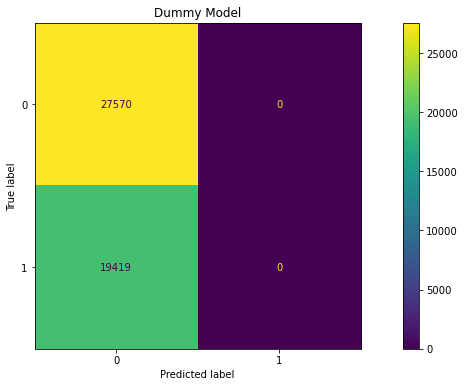

In [149]:
fig, ax = plt.subplots()

plt.title("Dummy Model")

plot_confusion_matrix(dummy_model, X_train_sc, y_train, ax=ax, cmap="viridis");

In [150]:
# just the numbers
confusion_matrix(y_train, dummy_model.predict(X_train_sc))

array([[27570,     0],
       [19419,     0]])

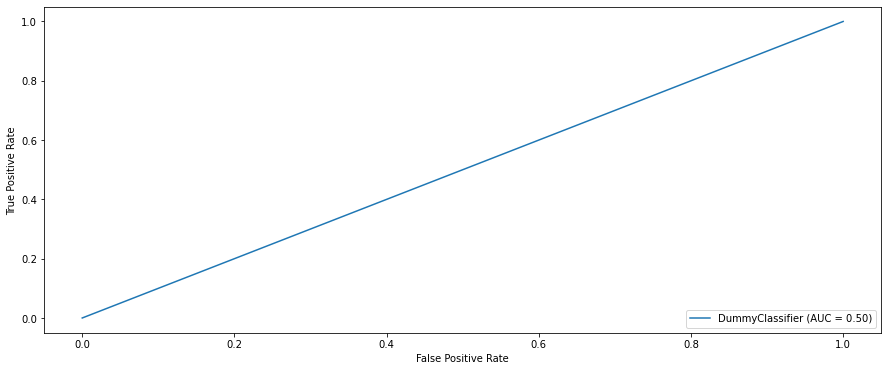

In [158]:
plot_roc_curve(dummy_model, X_train_sc, y_train);

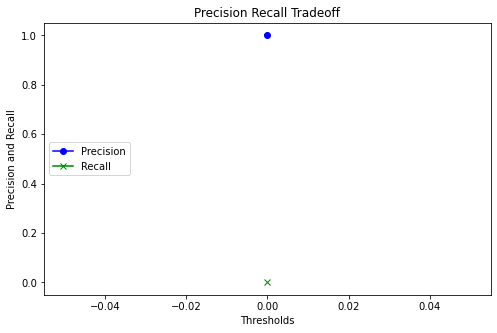

In [165]:
plt.figure(figsize = (8, 5))
prec, rec, thresh = precision_recall_curve(y_train, y_pred_dummy)
plt.plot(thresh, prec[1:], marker = 'o', c = 'b', label = 'Precision')
plt.plot(thresh, rec[1:], marker = 'x', c = 'g', label = 'Recall')
plt.legend(loc = 'center left')
plt.xlabel("Thresholds")
plt.ylabel('Precision and Recall')
plt.title('Precision Recall Tradeoff')
plt.show();

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix, roc_curve, precision_recall_curve, auc

def graph_evaluation(model, X_train, y_train, cv=False, X_cv=None, y_cv=None):
    fig, ax = plt.subplots(figsize=(10, 8))
    plt.title("Confusion Matrix")
    plot_confusion_matrix(model, X_train, y_train, ax=ax, cmap="viridis")
    plt.show()
    
    # Calculate the fpr, tpr, and thresholds for the training set
    train_fpr, train_tpr, thresholds = roc_curve(y_train, model.predict_proba(X_train)[:, 1])
    
    # Seaborn's beautiful styling
    sns.set_style('darkgrid', {'axes.facecolor': '0.9'})
    
    # ROC curve for training set
    plt.figure(figsize=(10, 8))
    lw = 2
    plt.plot(train_fpr, train_tpr, color='darkorange',
             lw=lw, label='Training ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Precision-Recall curve for training set
    plt.figure(figsize=(8, 5))
    prec, rec, thresh = precision_recall_curve(y_train, model.predict_proba(X_train)[:, 1])
    plt.plot(thresh, prec[1:], marker='o', c='b', label='Precision')
    plt.plot(thresh, rec[1:], marker='x', c='g', label='Recall')
    plt.legend(loc='center left')
    plt.xlabel("Thresholds")
    plt.ylabel('Precision and Recall')
    plt.title('Precision-Recall Tradeoff')
    plt.show()
    
    if cv:
        # Calculate the fpr, tpr, and thresholds for the cross-validation set
        cv_fpr, cv_tpr, thresholds = roc_curve(y_cv, model.predict_proba(X_cv)[:, 1])
        
        # ROC curve for cross-validation set
        plt.figure(figsize=(10, 8))
        lw = 2
        plt.plot(train_fpr, train_tpr, color='darkorange',
                 lw=lw, label='Training ROC curve')
        plt.plot(cv_fpr, cv_tpr, color='purple',
                 lw=lw, label='CV ROC curve')
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.yticks([i/20.0 for i in range(21)])
        plt.xticks([i/20.0 for i in range(21)])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc='lower right')
        plt.show()

        # Precision-Recall curve for cross-validation set
        plt.figure(figsize=(8, 5))
        cv_prec, cv_rec, cv_thresh = precision_recall_curve(y_cv, model.predict_proba(X_cv)[:, 1])
        plt.plot(thresh, prec[1:], marker='o', c='b', label='Training Precision')
        plt.plot(thresh, rec[1:], marker='x', c='g', label='Training Recall')
        plt.plot(cv_thresh, cv_prec[1:], marker='s', c='r', label='CV Precision')
        plt.plot(cv_thresh, cv_rec[1:], marker='d', c='m', label='CV Recall')
        plt.legend(loc='center left')
        plt.xlabel("Thresholds")
        plt.ylabel('Precision and Recall')
        plt.title('Precision-Recall Tradeoff')
        plt.show()


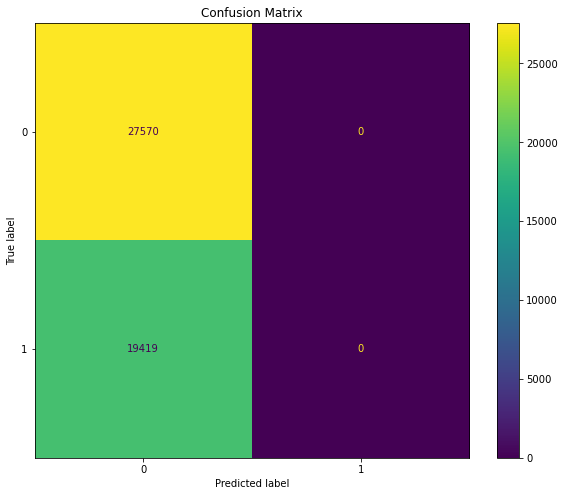

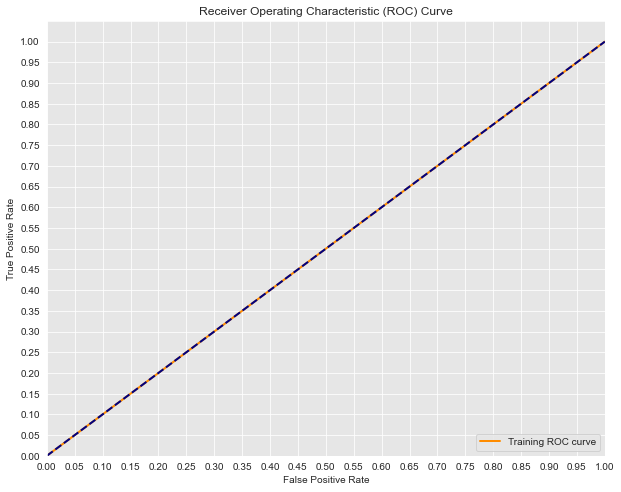

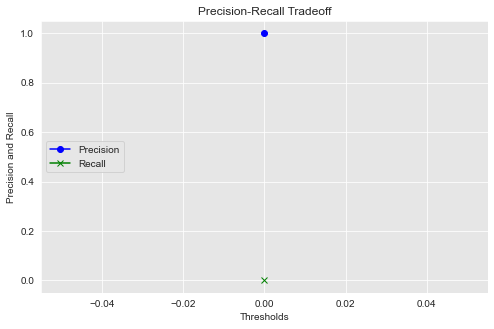

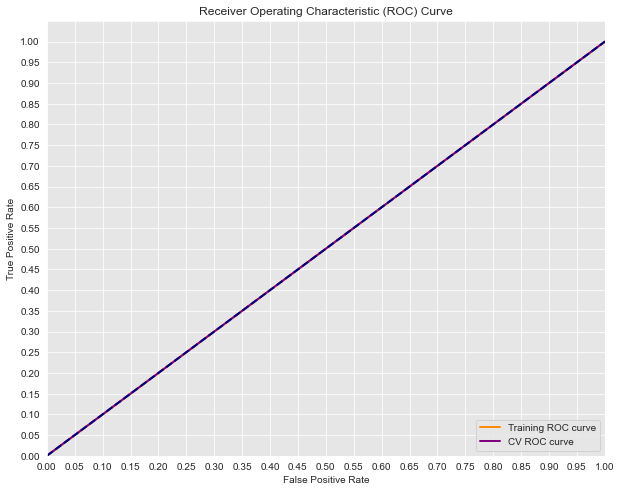

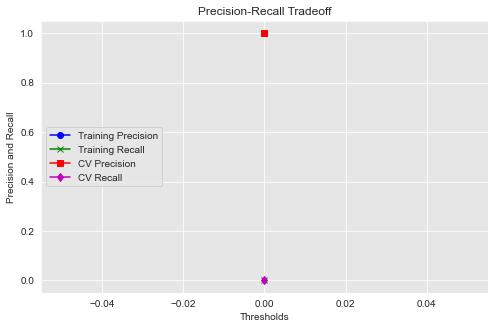

In [184]:
graph_evaluation(dummy_model, X_train_sc, y_train, cv=True, X_cv=X_train_sc, y_cv=y_train)

## Base Logistic Regression

Logistic Regression is a widely used statistical model for binary classification tasks. Despite its name, it is a classification algorithm rather than a regression algorithm. Logistic regression models the relationship between a dependent variable and one or more independent variables by estimating the probability of the dependent variable belonging to a specific class. It is based on the logistic function, also known as the sigmoid function, which maps any real-valued input to a value between 0 and 1. The logistic regression algorithm learns the optimal weights for the independent variables to maximize the likelihood of the observed data. These learned weights are used to predict the probabilities of the classes, and a threshold is applied to assign instances to a specific class. Logistic regression is popular due to its simplicity, interpretability, and effectiveness in various domains, making it a fundamental tool in the field of machine learning and predictive analytics.

In [290]:
# Initializing
lr_base = LogisticRegression(random_state=42)
lr_base = Pipeline(steps=[
    ('lr',LogisticRegression(n_jobs=-1))
])

# Training
lr_base.fit(X_train_sc, y_train)

# fit_time
fit_time = fit_model(lr_base, X_train_sc, y_train)
print(f"Model fitted in {fit_time:.4f} seconds")

# Predicting
y_pred_lr_base = lr_base.predict(X_train_sc)

Model fitted in 3.6754 seconds


In [179]:
evaluate_model(y_train, y_pred_lr_base)

The accuracy score is: 62.67%
The precision score is: 59.38%
The recall score is: 30.59%
The F1 score is: 40.38%
The AUC score is: 57.93%


In [180]:
evaluate_cross_validate(lr_base, X_train_sc, y_train)

The mean cross validation accuracy score is: 0.6243
The mean cross validation precision score is: 0.5873
The mean cross validation recall score is: 0.3056
The mean cross validation F1 score is: 0.4019
The mean cross validation AUC score is: 0.6381
Confusion Matrix:
[[23507  4063]
 [13479  5940]]


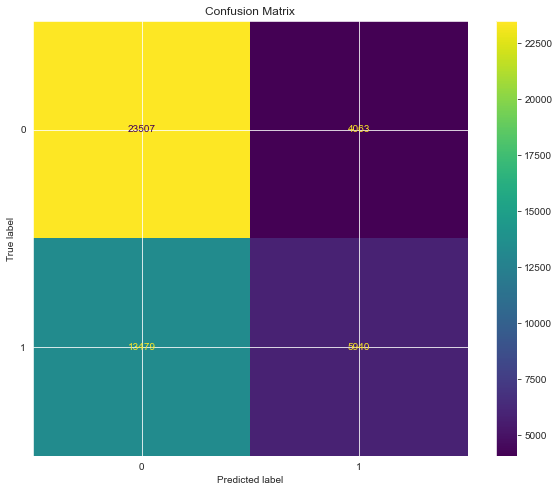

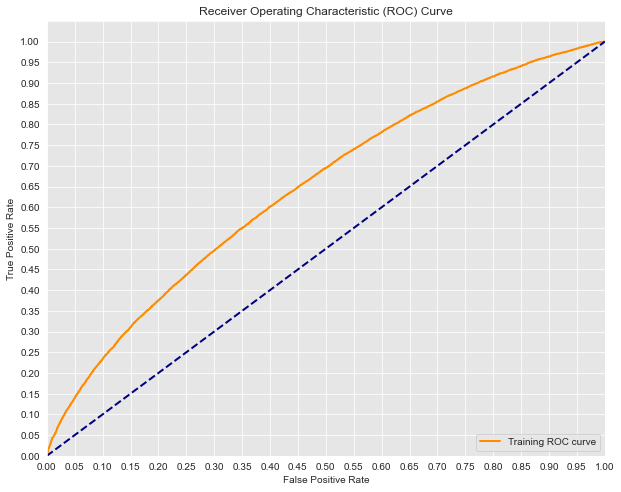

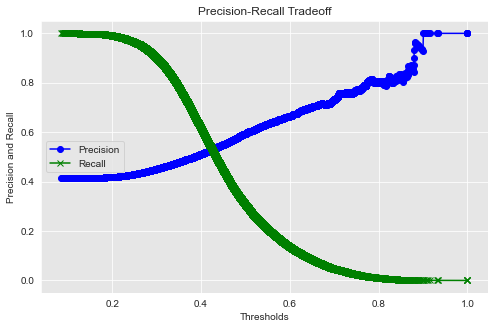

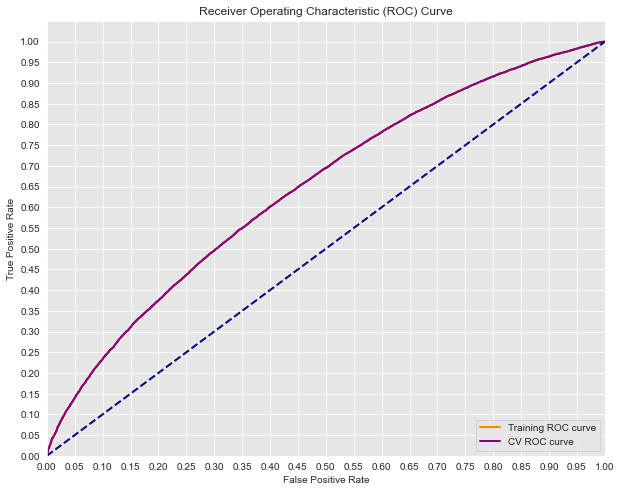

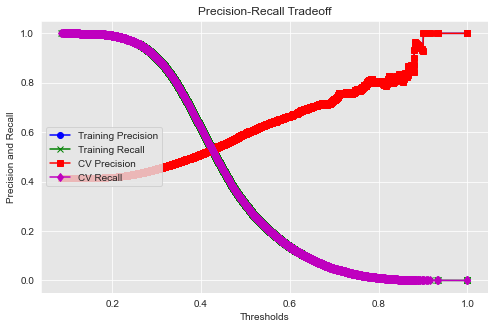

In [186]:
graph_evaluation(lr_base, X_train_sc, y_train, cv=True, X_cv=X_train_sc, y_cv=y_train)

In [212]:
from sklearn.model_selection import StratifiedKFold

def graph_roc_cv(model, X_train, y_train, n_splits=5):
    cv = StratifiedKFold(n_splits=n_splits, shuffle=False)
    
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    fig, ax = plt.subplots(figsize=(13,8))
    ax.set_title(f'{model} ROC curve', fontsize=14)
    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='black')
    
    if isinstance(X_train, np.ndarray):
        X_train = pd.DataFrame(X_train)
    
    if isinstance(y_train, np.ndarray):
        y_train = pd.Series(y_train)
    
    for i, (train, _) in enumerate(cv.split(X_train, y_train)):
        prediction = model.fit(X_train.iloc[train], y_train.iloc[train]).predict_proba(X_train.iloc[train])
        fpr, tpr, _ = roc_curve(y_train.iloc[train], prediction[:, 1])
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i+1, roc_auc))
    
    ax.plot(mean_fpr, np.mean(tprs, axis=0), color='blue',
             label=r'Mean ROC (AUC = %0.2f)' % np.mean(aucs), lw=2)
    
    ax.set_xlabel('False Positive Rate', fontsize=14)
    ax.set_ylabel('True Positive Rate', fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.legend(loc='lower right')
    
    plt.show()

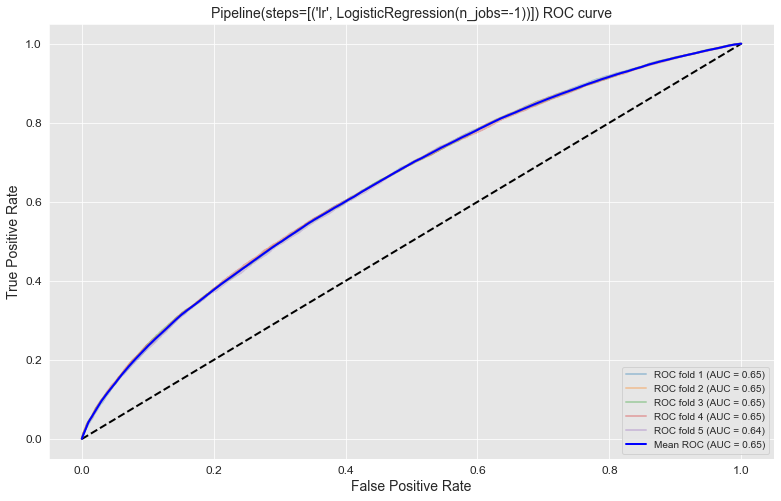

In [213]:
graph_roc_cv(lr_base, X_train_sc, y_train, n_splits=5)

In [225]:
def evaluation_graphs(model, X_train, y_train, n_splits=5):
    cv = StratifiedKFold(n_splits=n_splits, shuffle=False)
    
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # ROC Curve
    ax1.set_title(f'{model} ROC curve', fontsize=14)
    ax1.plot([0, 1], [0, 1], linestyle='--', lw=2, color='black')
    
    if isinstance(X_train, np.ndarray):
        X_train = pd.DataFrame(X_train)
    
    if isinstance(y_train, np.ndarray):
        y_train = pd.Series(y_train)
    
    for i, (train, _) in enumerate(cv.split(X_train, y_train)):
        prediction = model.fit(X_train.iloc[train], y_train.iloc[train]).predict_proba(X_train.iloc[train])
        fpr, tpr, _ = roc_curve(y_train.iloc[train], prediction[:, 1])
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        ax1.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i+1, roc_auc))
    
    ax1.plot(mean_fpr, np.mean(tprs, axis=0), color='blue',
             label=r'Mean ROC (AUC = %0.2f)' % np.mean(aucs), lw=2)
    
    ax1.set_xlabel('False Positive Rate', fontsize=12)
    ax1.set_ylabel('True Positive Rate', fontsize=12)
    ax1.tick_params(axis='both', which='major', labelsize=12)
    ax1.legend(loc='lower right')
    
    # Confusion Matrix
    ax2.set_title('Confusion Matrix', fontsize=14)
    plot_confusion_matrix(model, X_train, y_train, cmap="viridis", ax=ax2)
    
    plt.tight_layout()
    plt.show()
    ;

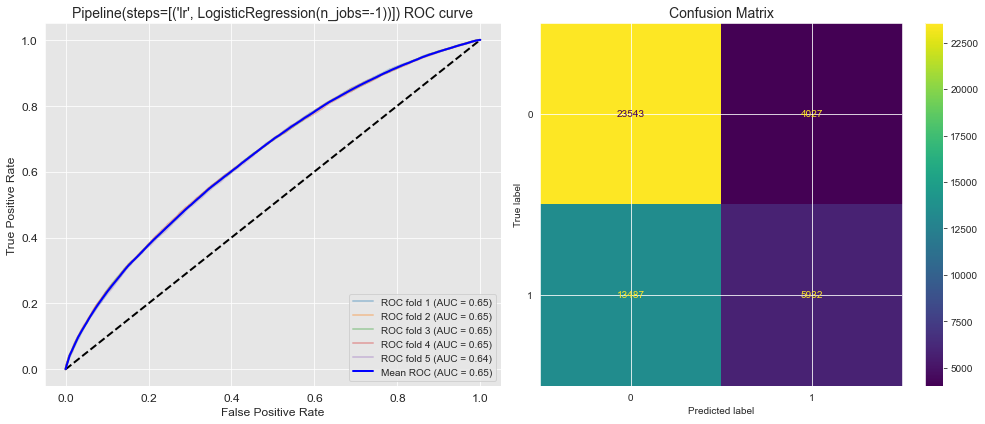

In [226]:
evaluation_graphs(lr_base, X_train_sc, y_train, n_splits=5)

The `eval_graph` function is used to visualize the Receiver Operating Characteristic (ROC) curve and the Confusion Matrix for a given classification model using cross-validation. It takes the model, training data (`X_train` and `y_train`), and the number of cross-validation splits (`n_splits`) as inputs.

The function first creates a stratified k-fold cross-validation object. It then iterates over each fold, fits the model on the training data of that fold, and calculates the predicted probabilities. It computes the True Positive Rate (TPR) and False Positive Rate (FPR) using the predicted probabilities and the true labels. These values are used to construct the ROC curve for each fold, and the Area Under the Curve (AUC) is calculated.

The mean ROC curve is also plotted, which represents the average TPR and FPR across all folds. The AUC for the mean ROC curve is displayed as well. The ROC curve is shown in one subplot.

Additionally, the function plots the Confusion Matrix in another subplot using the `plot_confusion_matrix` function. This matrix provides information about the model's performance in terms of true positives, true negatives, false positives, and false negatives.


This function helps in evaluating and comparing the performance of a classification model using cross-validation, providing insights into its ability to distinguish between classes and its classification accuracy.

In [229]:
def eval_graphs(model, X_train, y_train, n_splits=5):
    cv = StratifiedKFold(n_splits=n_splits, shuffle=False)
    
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))
    
    # ROC Curve
    ax1.set_title(f'{model} ROC curve', fontsize=14)
    ax1.plot([0, 1], [0, 1], linestyle='--', lw=2, color='black')
    
    if isinstance(X_train, np.ndarray):
        X_train = pd.DataFrame(X_train)
    
    if isinstance(y_train, np.ndarray):
        y_train = pd.Series(y_train)
    
    for i, (train, _) in enumerate(cv.split(X_train, y_train)):
        prediction = model.fit(X_train.iloc[train], y_train.iloc[train]).predict_proba(X_train.iloc[train])
        fpr, tpr, _ = roc_curve(y_train.iloc[train], prediction[:, 1])
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        ax1.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i+1, roc_auc))
    
    ax1.plot(mean_fpr, np.mean(tprs, axis=0), color='blue',
             label=r'Mean ROC (AUC = %0.2f)' % np.mean(aucs), lw=2)
    
    ax1.set_xlabel('False Positive Rate', fontsize=12)
    ax1.set_ylabel('True Positive Rate', fontsize=12)
    ax1.tick_params(axis='both', which='major', labelsize=12)
    ax1.legend(loc='lower right')
    
    # Confusion Matrix
    ax2.set_title('Confusion Matrix', fontsize=14)
    plot_confusion_matrix(model, X_train, y_train, cmap="viridis", ax=ax2)
    
    plt.tight_layout()
    plt.show()

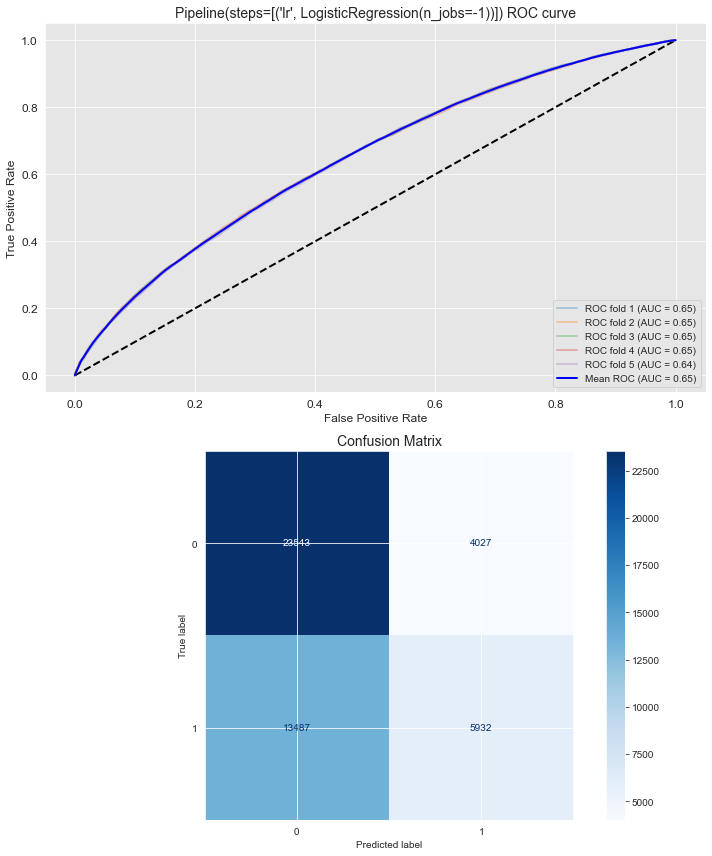

In [230]:
eval_graphs(lr_base, X_train_sc, y_train, n_splits=5)

In [240]:
def eval_graphs(model, X_train, y_train, n_splits=5):
    cv_results = cross_validate(model, X_train, y_train, cv=n_splits, scoring=['roc_auc'], return_estimator=True)

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

    # ROC Curve
    ax1.set_title(f'{model} ROC curve', fontsize=14)
    ax1.plot([0, 1], [0, 1], linestyle='--', lw=2, color='black')

    if isinstance(X_train, np.ndarray):
        X_train = pd.DataFrame(X_train)

    if isinstance(y_train, np.ndarray):
        y_train = pd.Series(y_train)

    for i, estimator in enumerate(cv_results['estimator']):
        prediction = estimator.predict_proba(X_train)
        fpr, tpr, _ = roc_curve(y_train, prediction[:, 1])
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        ax1.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i+1, roc_auc))

    ax1.plot(mean_fpr, np.mean(tprs, axis=0), color='blue',
             label=r'Mean ROC (AUC = %0.2f)' % np.mean(aucs), lw=2)

    ax1.set_xlabel('False Positive Rate', fontsize=12)
    ax1.set_ylabel('True Positive Rate', fontsize=12)
    ax1.tick_params(axis='both', which='major', labelsize=12)
    ax1.legend(loc='lower right')

    # Cross-validation Confusion Matrix
    cv_cm = np.zeros((2, 2))

    for estimator in cv_results['estimator']:
        y_pred = estimator.predict(X_train)
        cm = confusion_matrix(y_train, y_pred)
        cv_cm += cm

    ax2.set_title('Cross-Validation Confusion Matrix', fontsize=14)
    sns.heatmap(cv_cm, annot=True, fmt='f', cmap='viridis', ax=ax2)
    ax2.set_xlabel('Predicted', fontsize=12)
    ax2.set_ylabel('True', fontsize=12)

    plt.tight_layout()
    plt.show()

In [242]:
def eval_graphs(model, X_train, y_train, cv=5):
    cv_results = cross_validate(model, X_train, y_train, cv=cv, scoring=['roc_auc'], return_estimator=True)

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

    # ROC Curve
    ax1.set_title(f'{model} ROC curve', fontsize=14)
    ax1.plot([0, 1], [0, 1], linestyle='--', lw=2, color='black')

    if isinstance(X_train, np.ndarray):
        X_train = pd.DataFrame(X_train)

    if isinstance(y_train, np.ndarray):
        y_train = pd.Series(y_train)

    for i, estimator in enumerate(cv_results['estimator']):
        prediction = estimator.predict_proba(X_train)
        fpr, tpr, _ = roc_curve(y_train, prediction[:, 1])
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        ax1.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i+1, roc_auc))

    ax1.plot(mean_fpr, np.mean(tprs, axis=0), color='blue',
             label=r'Mean ROC (AUC = %0.2f)' % np.mean(aucs), lw=2)

    ax1.set_xlabel('False Positive Rate', fontsize=12)
    ax1.set_ylabel('True Positive Rate', fontsize=12)
    ax1.tick_params(axis='both', which='major', labelsize=12)
    ax1.legend(loc='lower right')

    # Cross-validation Confusion Matrix
    cv_cm = np.zeros((2, 2))

    for estimator in cv_results['estimator']:
        y_pred = estimator.predict(X_train)
        cm = confusion_matrix(y_train, y_pred)
        cv_cm += cm

    ax2.set_title('Cross-Validation Confusion Matrix', fontsize=14)
    # Use '.0f' format code for floating-point values
    sns.heatmap(cv_cm, annot=True, fmt='.0f', cmap='viridis', ax=ax2)  
    ax2.set_xlabel('Predicted', fontsize=12)
    ax2.set_ylabel('True', fontsize=12)

    plt.tight_layout()
    plt.show()


In [270]:
def eval_graphs(model, X_train, y_train, cv=5):
    cv_results = cross_validate(model, X_train, y_train, cv=cv, scoring=['roc_auc'], return_estimator=True)

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

    # ROC Curve
    ax1.set_title(f'{model} ROC curve', fontsize=14)
    ax1.plot([0, 1], [0, 1], linestyle='--', lw=2, color='black')

    if isinstance(X_train, np.ndarray):
        X_train = pd.DataFrame(X_train)

    if isinstance(y_train, np.ndarray):
        y_train = pd.Series(y_train)

    for i, estimator in enumerate(cv_results['estimator']):
        prediction = estimator.predict_proba(X_train)
        fpr, tpr, _ = roc_curve(y_train, prediction[:, 1])
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        ax1.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC cv %d (AUC = %0.2f)' % (i+1, roc_auc))

    ax1.plot(mean_fpr, np.mean(tprs, axis=0), color='blue',
             label=r'Mean ROC (AUC = %0.2f)' % np.mean(aucs), lw=2)

    ax1.set_xlabel('False Positive Rate', fontsize=12)
    ax1.set_ylabel('True Positive Rate', fontsize=12)
    ax1.tick_params(axis='both', which='major', labelsize=12)
    ax1.legend(loc='lower right')

    # Cross-validation Confusion Matrix
    cv_cm = np.zeros((2, 2))

    for estimator in cv_results['estimator']:
        y_pred = estimator.predict(X_train)
        cm = confusion_matrix(y_train, y_pred)
        cv_cm += cm

    ax2.set_title('Cross-Validation Confusion Matrix', fontsize=14)
    # Use '.0f' format code for floating-point values
    sns.heatmap(cv_cm, annot=True, fmt='.0f', cmap='viridis', ax=ax2)  
    ax2.set_xlabel('Predicted', fontsize=12)
    ax2.set_ylabel('True', fontsize=12)

    plt.tight_layout()
    plt.show()

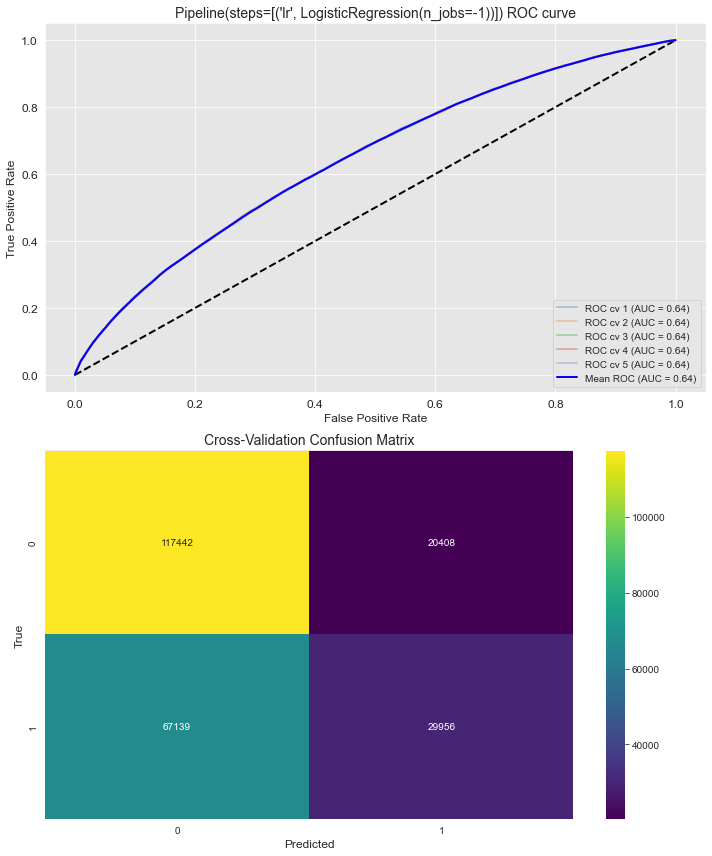

In [271]:
eval_graphs(lr_base, X_train_sc, y_train, cv=5)

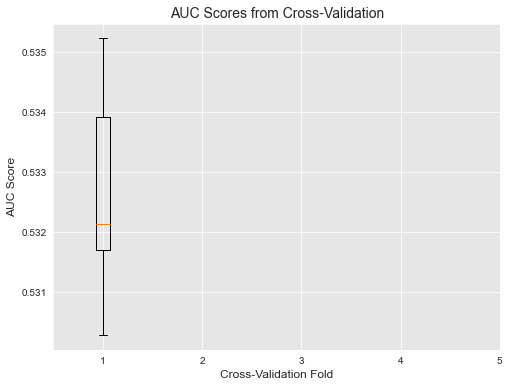

In [273]:
def plot_cross_val_roc(model, X, y, cv=5):
    cv_results = cross_validate(model, X, y, cv=cv, scoring='roc_auc', return_train_score=False)
    auc_scores = cv_results['test_score']

    plt.figure(figsize=(8, 6))
    plt.boxplot(auc_scores)
    plt.xlabel('Cross-Validation Fold', fontsize=12)
    plt.ylabel('AUC Score', fontsize=12)
    plt.title('AUC Scores from Cross-Validation', fontsize=14)
    plt.xticks(np.arange(1, cv+1), np.arange(1, cv+1))
    plt.show()

# Usage example
plot_cross_val_roc(dt_base, X_train_sc, y_train, cv=5)


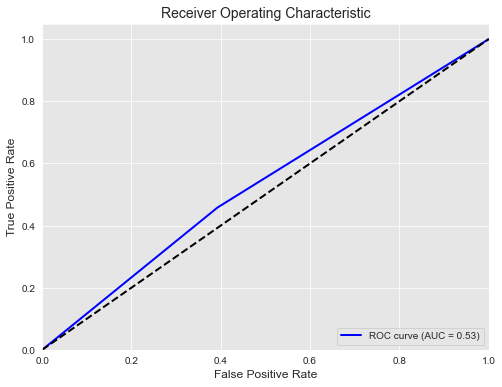

In [274]:
def plot_cross_val_roc(model, X, y, cv=5):
    y_scores = cross_val_predict(model, X, y, cv=cv, method='predict_proba')[:, 1]
    fpr, tpr, _ = roc_curve(y, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title('Receiver Operating Characteristic', fontsize=14)
    plt.legend(loc="lower right")
    plt.show()

# plot
plot_cross_val_roc(dt_base, X_train_sc, y_train, cv=5)


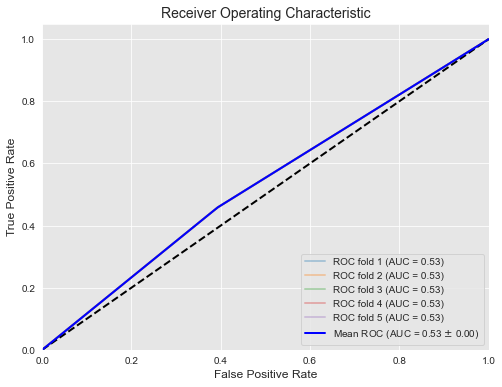

In [275]:
def plot_cross_val_roc(model, X, y, cv=5):
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    plt.figure(figsize=(8, 6))

    for i in range(cv):
        y_scores = cross_val_predict(model, X, y, cv=cv, method='predict_proba')[:, 1]
        fpr, tpr, _ = roc_curve(y, y_scores)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i+1, roc_auc))
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        aucs.append(roc_auc)

    plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
    mean_tpr = np.mean(tprs, axis=0)
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='blue', lw=2, label='Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc))

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title('Receiver Operating Characteristic', fontsize=14)
    plt.legend(loc="lower right")
    plt.show()

# plot
plot_cross_val_roc(dt_base, X_train_sc, y_train, cv=5)

In [278]:
def plot_cross_val_roc_cm(model, X, y, cv=5):
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

    # ROC Curves
    ax1.set_title('Receiver Operating Characteristic', fontsize=14)
    ax1.plot([0, 1], [0, 1], linestyle='--', lw=2, color='black')

    for i in range(cv):
        y_scores = cross_val_predict(model, X, y, cv=cv, method='predict_proba')[:, 1]
        fpr, tpr, _ = roc_curve(y, y_scores)
        roc_auc = auc(fpr, tpr)
        ax1.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i+1, roc_auc))
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        aucs.append(roc_auc)

    ax1.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
    mean_tpr = np.mean(tprs, axis=0)
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax1.plot(mean_fpr, mean_tpr, color='blue', lw=2, label='Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc))

    ax1.set_xlim([0.0, 1.0])
    ax1.set_ylim([0.0, 1.05])
    ax1.set_xlabel('False Positive Rate', fontsize=12)
    ax1.set_ylabel('True Positive Rate', fontsize=12)
    ax1.tick_params(axis='both', which='major', labelsize=12)
    ax1.legend(loc="lower right")

    # Confusion Matrix
    cm_sum = np.zeros((2, 2))

    for i in range(cv):
        y_pred = cross_val_predict(model, X, y, cv=cv)
        cm = confusion_matrix(y, y_pred)
        cm_sum += cm

    ax2.set_title('Cross-Validation Confusion Matrix', fontsize=14)
    sns.heatmap(cm_sum, annot=True, fmt='.0f', cmap='viridis', ax=ax2)
    ax2.set_xlabel('Predicted', fontsize=12)
    ax2.set_ylabel('True', fontsize=12)

    plt.tight_layout()
    plt.show()

In [298]:
def plot_cross_val_roc_cm(model, X, y, cv=5):
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

    # ROC Curves
    ax1.set_title(f'{model} Receiver Operating Characteristic', fontsize=14)
    ax1.plot([0, 1], [0, 1], linestyle='--', lw=2, color='black')

    y_scores = cross_val_predict(model, X, y, cv=cv, method='predict_proba')[:, 1]

    for i in range(cv):
        fpr, tpr, _ = roc_curve(y, y_scores)
        roc_auc = auc(fpr, tpr)
        ax1.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i+1, roc_auc))
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        aucs.append(roc_auc)

    ax1.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
    mean_tpr = np.mean(tprs, axis=0)
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax1.plot(mean_fpr, mean_tpr, color='blue', lw=2, label='Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc))

    ax1.set_xlim([0.0, 1.0])
    ax1.set_ylim([0.0, 1.05])
    ax1.set_xlabel('False Positive Rate', fontsize=12)
    ax1.set_ylabel('True Positive Rate', fontsize=12)
    ax1.tick_params(axis='both', which='major', labelsize=12)
    ax1.legend(loc="lower right")

    # Confusion Matrix
    cm_sum = np.zeros((2, 2))
    y_pred = cross_val_predict(model, X, y, cv=cv)

    for i in range(cv):
        cm = confusion_matrix(y, y_pred)
        cm_sum += cm

    ax2.set_title('Cross-Validation Confusion Matrix', fontsize=14)
    sns.heatmap(cm_sum, annot=True, fmt='.0f', cmap='viridis', ax=ax2)
    ax2.set_xlabel('Predicted', fontsize=12)
    ax2.set_ylabel('True', fontsize=12)

    plt.tight_layout()
    plt.show()

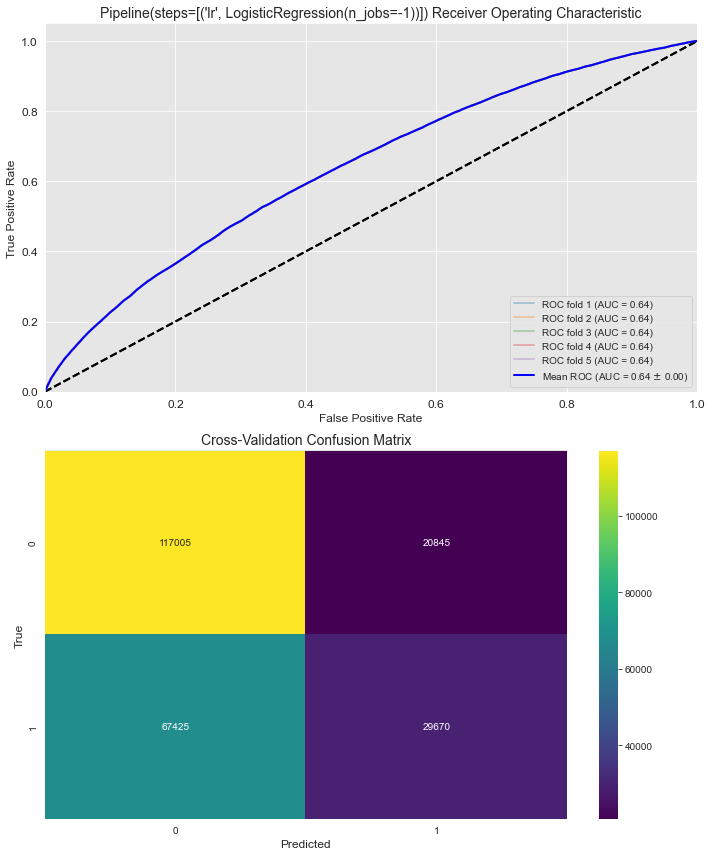

In [299]:
# plot
plot_cross_val_roc_cm(lr_base, X_train_sc, y_train, cv=5)

## Baseline Decision Tree Model

**Decision trees** are a type of parametric model that recursively partitions the feature space into smaller and smaller regions based on the most informative features. The partitioning process stops when a stopping criterion is met, such as when all data points in a region belong to the same class or when a maximum depth is reached. Decision trees can work well when the decision boundary is nonlinear and can handle both continuous and categorical data. They are often used as standalone models or as part of an ensemble model, such as a random forest.

In [292]:
# Initializing
dt_base = DecisionTreeClassifier(random_state=42)

# Training
dt_base.fit(X_train_sc, y_train)

# fit_time
fit_time = fit_model(dt_base, X_train_sc, y_train)
print(f"Model fitted in {fit_time:.4f} seconds")

# Predicting
y_pred_dt_base = dt_base.predict(X_train_sc)

Model fitted in 1.0705 seconds


In [266]:
evaluate_model(y_train, y_pred_dt_base)

The accuracy score is: 100.00%
The precision score is: 100.00%
The recall score is: 100.00%
The F1 score is: 100.00%
The AUC score is: 100.00%


In [245]:
evaluate_cross_validate(dt_base, X_train_sc, y_train)

The mean cross validation accuracy score is: 0.5456
The mean cross validation precision score is: 0.4510
The mean cross validation recall score is: 0.4580
The mean cross validation F1 score is: 0.4545
The mean cross validation AUC score is: 0.5326
Confusion Matrix:
[[25406  2164]
 [ 2113 17306]]


In [249]:
cross_validate(dt_base, X=X_train_sc, y=y_train, scoring='roc_auc')

{'fit_time': array([1.1384871 , 1.02883387, 0.92520595, 0.88368893, 0.90087295]),
 'score_time': array([0.01645327, 0.01216602, 0.01130915, 0.01150012, 0.01288009]),
 'test_score': array([0.53213046, 0.53523374, 0.53391251, 0.53027319, 0.53168878])}

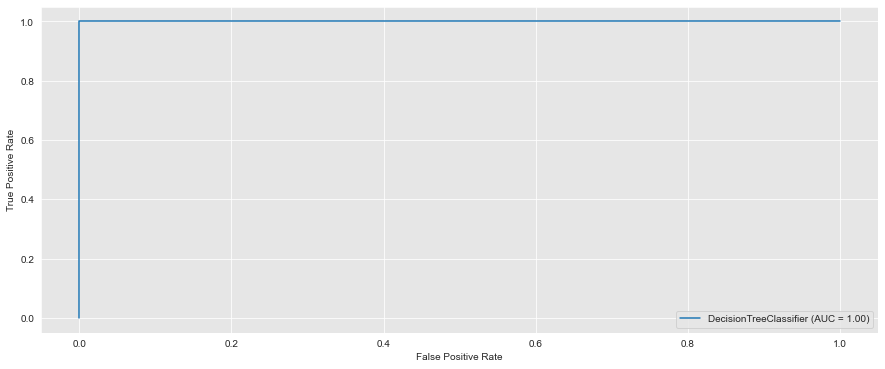

In [269]:
plot_roc_curve(dt_base, X_train_sc, y_train)

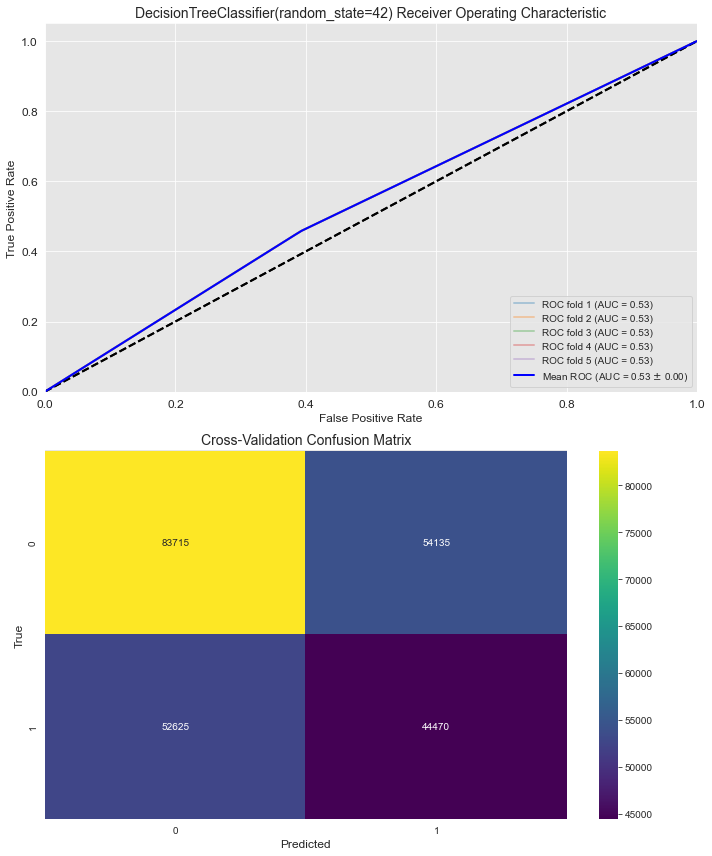

In [300]:
plot_cross_val_roc_cm(dt_base, X_train_sc, y_train, cv=5)

A ROC score (AUC) of 100% and a cross validation score of 53.26% means that the model is overfitting. This is probably due to there not being a max depth setting being set.

We can also see that the 100% accuracy, precision, and recall score is misleading becasue when we cross validate, the scores go down. This means the model was only perfect on the training dataset and when introduced to new datasets such as by cross validation, it does not do that well.

The base Decision Tree model demonstrates a perfect performance based on the evaluation scores. The accuracy score is 100.00%, indicating that the model predicts all samples correctly. The precision score is 100.00%, highlighting the model's ability to correctly identify positive cases without any false positives. The recall score is 100.00%, indicating that the model captures all positive cases without any false negatives. The F1 score, which considers both precision and recall, is 100.00%, representing a perfect balance between the two metrics. The AUC score is also 100.00%, indicating a flawless ability to discriminate between positive and negative cases.

The base Decision Tree model exhibits a perfect performance based on the evaluation scores. However, it is important to note that this perfect performance may indicate overfitting to the training data which we can confirm with the cross validation scores. This is probably due to there not being a max depth setting being set. Further analysis and potential adjustments may be necessary to ensure the model's generalizability and avoid overfitting."

## Base KNN Model

**K-Nearest Neighbors (KNN)** is a simple machine learning algorithm used for classification and regression tasks. It assigns the class label or predicts the value based on the majority vote of the k closest neighbors in the feature space. KNN is easy to understand and doesn't assume anything about the data distribution. It can capture complex patterns and non-linear relationships. However, it can be computationally expensive, sensitive to feature scaling, and may not perform well in high-dimensional spaces. Consider the dataset size and complexity when deciding to use KNN.

In [294]:
# Initializing
knn_base = KNeighborsClassifier(n_jobs=-1)

# Training
knn_base.fit(X_train_sc, y_train)

# fit_time
fit_time = fit_model(knn_base, X_train_sc, y_train)
print(f"Model fitted in {fit_time:.4f} seconds")

# Predicting
y_pred_knn_base = knn_base.predict(X_train_sc)

Model fitted in 6.6750 seconds


In [295]:
evaluate_model(y_train, y_pred_knn_base)

The accuracy score is: 72.14%
The precision score is: 69.87%
The recall score is: 57.30%
The F1 score is: 62.96%
The AUC score is: 69.95%


In [296]:
%time
evaluate_cross_validate(knn_base, X_train_sc, y_train)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.96 µs
The mean cross validation accuracy score is: 0.5735
The mean cross validation precision score is: 0.4804
The mean cross validation recall score is: 0.3925
The mean cross validation F1 score is: 0.4320
The mean cross validation AUC score is: 0.5645
Confusion Matrix:
[[22772  4798]
 [ 8292 11127]]


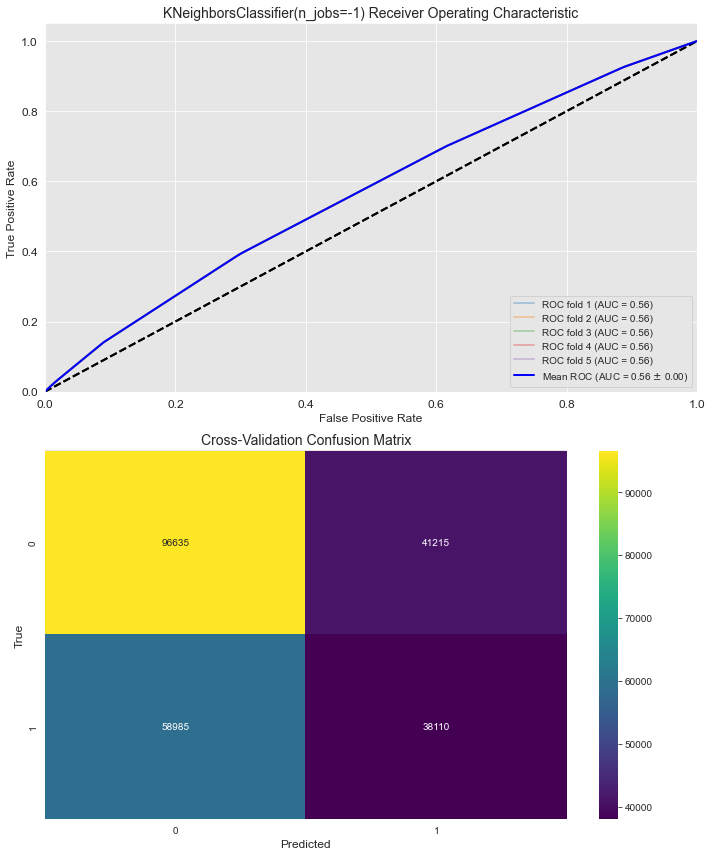

In [301]:
plot_cross_val_roc_cm(knn_base, X_train_sc, y_train, cv=5)

The KNN base model appears to be overfit, as its performance on the training data is higher than the mean cross-validation scores. This suggests that the model may have memorized the training data and could struggle to generalize to unseen data. It's worth noting that KNN models can be computationally intensive and may take a long time to run, which is not time-efficient for larger datasets.

The KNN base model exhibits signs of overfitting as indicated by the evaluation scores. The accuracy score is 72.14%, suggesting a decent overall performance. The precision score is 69.87%, indicating the model's ability to correctly identify positive cases. The recall score is 57.30%, suggesting that the model captures a reasonable proportion of true positive cases. The F1 score, which considers both precision and recall, is 62.96%, representing a balanced performance between the two metrics. The AUC score is 69.95%, indicating a satisfactory ability to discriminate between positive and negative cases.

However, it is important to note that KNN models are known for their time inefficiency, as they can take a long time to run, especially with larger datasets. This factor should be considered when working with KNN models.

In summary, the KNN base model demonstrates signs of overfitting, with the evaluation scores being lower than the mean cross-validation scores. It is important to consider the time inefficiency associated with KNN models. Further analysis and potential adjustments may be necessary to improve the model's performance and address overfitting.

## Base Naive Bayes Model

**Naive Bayes** is a simple and efficient classification algorithm that is popular for its ease of implementation and computational efficiency. It handles missing data well and performs effectively with categorical features. However, it relies on the assumption of feature independence, which may not hold in real-world scenarios. It is sensitive to feature correlation and may struggle with highly correlated features. The algorithm has limited expressiveness and may not capture complex relationships in the data. Additionally, it can be affected by imbalanced class distributions, often biased towards the majority class. When considering the use of Naive Bayes, it is important to assess its suitability for the specific problem and compare its performance with other algorithms.

In [302]:
# Initializing
gnb_base = GaussianNB()

# Training
gnb_base.fit(X_train_sc, y_train)

# fit_time
fit_time = fit_model(gnb_base, X_train_sc, y_train)
print(f"Model fitted in {fit_time:.4f} seconds")

# Predicting
y_pred_gnb_base = gnb_base.predict(X_train_sc)

Model fitted in 0.1012 seconds


### model_evaluation function

The `model_evaluation` function performs evaluation and visualization of a classification model. It takes as input the model to be evaluated (`model`), the input features (`X`), the target variable (`y`), and an optional parameter for the number of cross-validation folds (`cv`).

The function starts by setting up the plots for visualizing the receiver operating characteristic (ROC) curves and the confusion matrix. It then calculates the ROC curve and area under the curve (AUC) for each fold of cross-validation. The mean ROC curve and mean AUC are also calculated and plotted.

Next, the function computes various evaluation metrics such as accuracy, precision, recall, F1 score, and AUC score for the model's predictions on the entire dataset. It also calculates the mean cross-validation scores for these metrics.

The function then computes the confusion matrix for the model's predictions using cross-validation. The confusion matrix is plotted as a heatmap.

Finally, the function prints the evaluation metrics, mean cross-validation scores, and the confusion matrix.

This function provides a comprehensive evaluation of the classification model, including visualizations of the ROC curve, evaluation metrics, cross-validation scores, and the confusion matrix. It is useful for understanding the model's performance and identifying any potential issues or areas of improvement.

In [376]:
def model_evaluation(model, X, y, cv=5):
    #Setting up plots
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

    # ROC Curves
    ax1.set_title(f'{model} Receiver Operating Characteristic', fontsize=14)
    ax1.plot([0, 1], [0, 1], linestyle='--', lw=2, color='black')

    y_scores = cross_val_predict(model, X, y, cv=cv, method='predict_proba')[:, 1]

    for i in range(cv):
        fpr, tpr, _ = roc_curve(y, y_scores)
        roc_auc = auc(fpr, tpr)
        ax1.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i+1, roc_auc))
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        aucs.append(roc_auc)

    ax1.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
    mean_tpr = np.mean(tprs, axis=0)
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax1.plot(mean_fpr, mean_tpr, color='blue', lw=2, 
             label='Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc))

    ax1.set_xlim([0.0, 1.0])
    ax1.set_ylim([0.0, 1.05])
    ax1.set_xlabel('False Positive Rate', fontsize=12)
    ax1.set_ylabel('True Positive Rate', fontsize=12)
    ax1.tick_params(axis='both', which='major', labelsize=12)
    ax1.legend(loc="lower right")
    
    
    # Evaluation Metrics
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    auc_score = roc_auc_score(y, y_scores)

    # Mean Cross Validation Scores
    cv_results = cross_validate(model, X, y, cv=cv, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])
    mean_cv_accuracy = np.mean(cv_results['test_accuracy'])
    mean_cv_precision = np.mean(cv_results['test_precision'])
    mean_cv_recall = np.mean(cv_results['test_recall'])
    mean_cv_f1 = np.mean(cv_results['test_f1'])
    mean_cv_auc = np.mean(cv_results['test_roc_auc'])

    # Confusion Matrix
    cm = confusion_matrix(y, y_pred)

    # Print Evaluation Metrics
    print("The accuracy score is: %.2f%%" % (accuracy * 100))
    print("The precision score is: %.2f%%" % (precision * 100))
    print("The recall score is: %.2f%%" % (recall * 100))
    print("The F1 score is: %.2f%%" % (f1 * 100))
    print("The AUC score is: %.2f%%" % (auc_score * 100))

    print("\nThe mean cross validation accuracy score is: %.4f" % mean_cv_accuracy)
    print("The mean cross validation precision score is: %.4f" % mean_cv_precision)
    print("The mean cross validation recall score is: %.4f" % mean_cv_recall)
    print("The mean cross validation F1 score is: %.4f" % mean_cv_f1)
    print("The mean cross validation AUC score is: %.4f" % mean_cv_auc)

    print("\nConfusion Matrix:")
    print(cm)
    

    # Confusion Matrix
    cm_sum = np.zeros((2, 2))
    y_pred = cross_val_predict(model, X, y, cv=cv)

    for i in range(cv):
        cm = confusion_matrix(y, y_pred)
        cm_sum += cm

    ax2.set_title('Cross-Validation Confusion Matrix', fontsize=14)
    sns.heatmap(cm_sum, annot=True, fmt='.0f', cmap='viridis', ax=ax2)
    ax2.set_xlabel('Predicted', fontsize=12)
    ax2.set_ylabel('True', fontsize=12)

    plt.tight_layout()
    plt.show()

The accuracy score is: 60.35%
The precision score is: 58.01%
The recall score is: 14.74%
The F1 score is: 23.50%
The AUC score is: 56.60%

The mean cross validation accuracy score is: 0.5927
The mean cross validation precision score is: 0.5282
The mean cross validation recall score is: 0.3457
The mean cross validation F1 score is: 0.3639
The mean cross validation AUC score is: 0.6075

Confusion Matrix:
[[25498  2072]
 [16557  2862]]


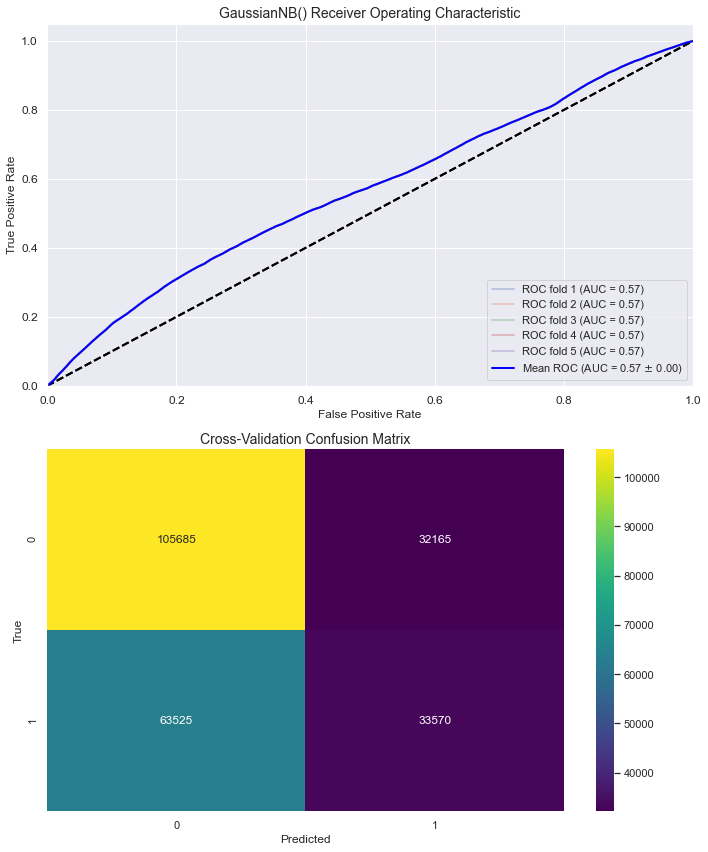

In [377]:
model_evaluation(gnb_base, X_train_sc, y_train, cv=5)

The GNB base model shows some limitations in its performance based on the evaluation scores. While the accuracy score is moderate at 60.35%, the precision score is 58.01%, indicating that the model has a reasonable ability to correctly identify positive cases. However, the recall score is low at 14.74%, suggesting that the model has difficulty capturing all true positive cases. The F1 score, which considers both precision and recall, is 23.50%, indicating a trade-off between precision and recall.

The AUC score for the GNB base model is 56.60%, indicating a moderate ability to discriminate between positive and negative cases.

The cross validation scores indicate that the GNB base model's performance is somewhat consistent across different folds of the cross-validation process. The scores are not very different from the training scores but still a little lower which indicates overfitting.

Overall, the GNB base model shows limitations in terms of recall and F1 score, indicating potential challenges in capturing all true positive cases. Further evaluation and potential improvements may be necessary to enhance its performance and decrease overfitting.

## Base Random Forest

A **Random Forest model** is an ensemble learning method that combines multiple decision trees to create a more accurate and robust model. It is used for both classification and regression tasks. The Random Forest consists of an ensemble of decision trees, each trained on a random subset of the training data and considering a random subset of features for splitting. This randomness reduces overfitting and improves generalization. The predictions from the individual trees are combined using majority voting for classification tasks. Random Forests are advantageous as they are less prone to overfitting, provide feature importance estimates, and can handle high-dimensional data and missing values. They are suitable for classification problems, high-dimensional data analysis, outlier detection, and feature importance analysis. Overall, Random Forests are versatile and powerful models widely used in various domains.

In [313]:
# Initializing
rf_base = RandomForestClassifier(random_state=42, n_jobs=-1)

# Training
rf_base.fit(X_train_sc, y_train)

# fit_time
fit_time = fit_model(rf_base, X_train_sc, y_train)
print(f"Model fitted in {fit_time:.4f} seconds")

# Predicting
y_pred_rf_base = rf_base.predict(X_train_sc)

Model fitted in 5.2883 seconds


The accuracy score is: 100.00%
The precision score is: 100.00%
The recall score is: 100.00%
The F1 score is: 100.00%
The AUC score is: 63.44%

The mean cross validation accuracy score is: 0.6185
The mean cross validation precision score is: 0.5643
The mean cross validation recall score is: 0.3377
The mean cross validation F1 score is: 0.4225
The mean cross validation AUC score is: 0.6345

Confusion Matrix:
[[27570     0]
 [    0 19419]]


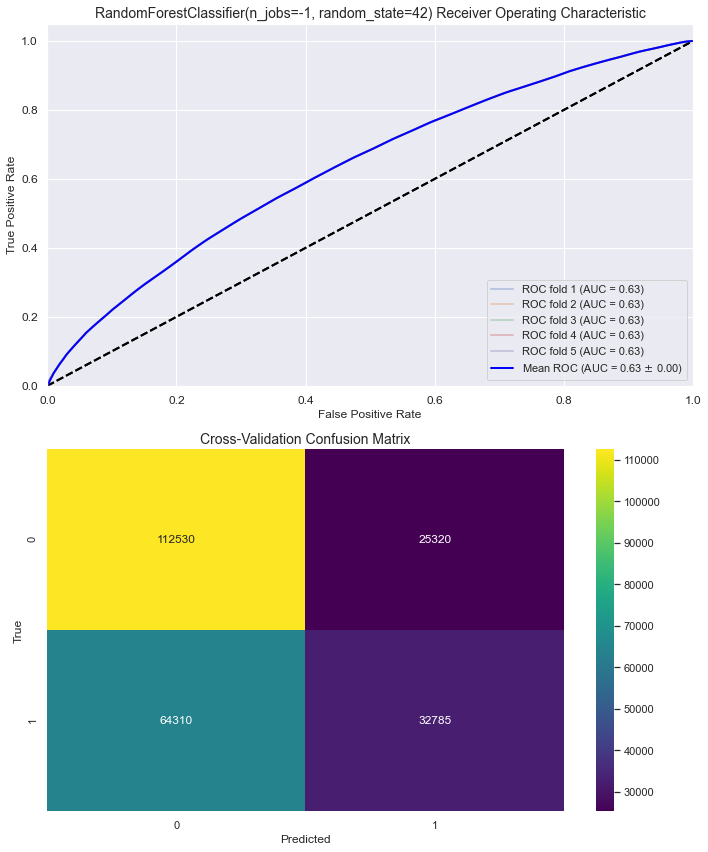

None

In [330]:
rf_base_eval = model_evaluation(rf_base, X_train_sc, y_train, cv=5)
display(rf_base_eval)

The base Random Forest model demonstrates a perfect performance based on the evaluation scores. The accuracy score is 100.00%, indicating that the model predicts all samples correctly. The precision score is 100.00%, highlighting the model's ability to correctly identify positive cases without any false positives. The recall score is 100.00%, indicating that the model captures all positive cases without any false negatives. The F1 score, which considers both precision and recall, is 100.00%, representing a perfect balance between the two metrics. However, it is important to note that the AUC score is 63.44%, which indicates the model's ability to discriminate between positive and negative cases.

The base Random Forest model exhibits a perfect performance based on the individual evaluation scores. However, the lower mean cross-validation scores and the discrepancy between the individual scores and the mean scores suggest a potential overfitting issue. Further analysis, such as hyperparameter tuning or regularization techniques, may be necessary to address this overfitting and improve the model's generalizability.

## Base XGBoost

**XGBoost** is an algorithm that belongs to the gradient boosting family and is highly regarded for its performance in classification tasks. By building an ensemble of weak models, it achieves high accuracy by capturing complex patterns in the data. XGBoost offers regularization techniques, flexibility in handling various data types, and provides insights into feature importance. It is efficient and scalable, making it suitable for real-world applications. However, the performance of XGBoost relies on data quality, appropriate feature engineering, and hyperparameter tuning. While advantageous for structured data and high accuracy, XGBoost might not be advantageous when dealing with unstructured data or when interpretability is a priority over predictive power.

In [378]:
# Initializing
xgb_base = XGBClassifier(random_state=42)

# Training
xgb_base.fit(X_train_sc, y_train)

# fit_time
fit_time = fit_model(xgb_base, X_train_sc, y_train)
print(f"Model fitted in {fit_time:.4f} seconds")

# Predicting
y_pred_xgb_base = xgb_base.predict(X_train_sc)

Model fitted in 19.9243 seconds


The accuracy score is: 71.60%
The precision score is: 73.12%
The recall score is: 49.46%
The F1 score is: 59.00%
The AUC score is: 63.90%

The mean cross validation accuracy score is: 0.6205
The mean cross validation precision score is: 0.5606
The mean cross validation recall score is: 0.3787
The mean cross validation F1 score is: 0.4520
The mean cross validation AUC score is: 0.6390

Confusion Matrix:
[[24039  3531]
 [ 9815  9604]]


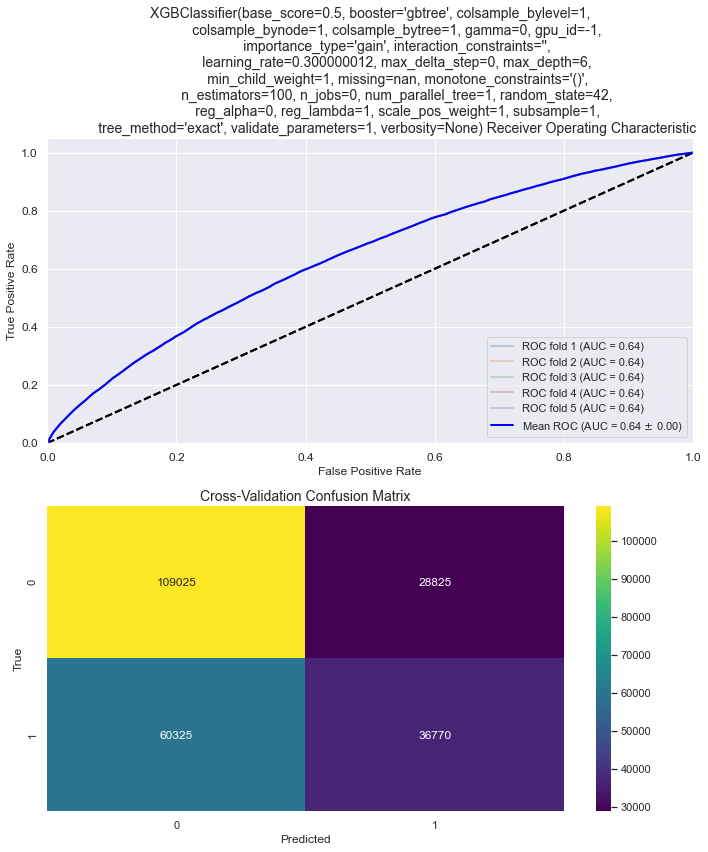

None

In [380]:
xgb_base_eval = model_evaluation(xgb_base, X_train_sc, y_train, cv=5)
display(xgb_base_eval)

# Model Comparison

When evaluating a classification model for predicting hospital readmission for diabetic patients, the F1 score can be a useful metric to consider:

1. Consideration of both precision and recall: The F1 score combines precision (the ability of the model to correctly identify positive instances) and recall (the ability of the model to correctly capture all positive instances). Hospital readmission prediction is often a task where both false positives (misclassifying a non-readmission as a readmission) and false negatives (missing actual readmissions) are significant. The F1 score provides a balanced measure that considers both aspects.

2. Handling imbalanced data: Hospital readmission datasets often suffer from class imbalance, where the number of non-readmissions is much higher than readmissions. In such cases, accuracy alone can be misleading because a model can achieve high accuracy by simply predicting the majority class. The F1 score accounts for the imbalanced distribution by considering both precision and recall, making it more reliable for imbalanced datasets.

3. Trade-off between precision and recall: The F1 score captures the trade-off between precision and recall. It penalizes models that focus too much on precision at the expense of recall or vice versa. In the context of hospital readmission prediction, it's important to strike a balance between correctly identifying readmissions (recall) and minimizing false positives (precision). The F1 score provides a single metric to assess this trade-off.

In [318]:
def f1_results(models, X, y, cv=5):
    results = {}

    for name, model in models.items():
        cv_scores = cross_val_score(model, X, y, cv=cv, scoring='f1')
        results[name] = cv_scores

    return results

def roc_auc_results(models, X, y, cv=5):
    results = {}

    for name, model in models.items():
        cv_scores = cross_val_score(model, X, y, cv=cv, scoring='roc_auc')
        results[name] = cv_scores

    return results

In [329]:
models = {
    'Dummy Model': dummy_model,
    'Base Logistic Regression': lr_base,
    'Base Decision Tree': dt_base,
    'Base Random Forest': rf_base,
    'Base KNearest Neighbors': knn_base,
    'Base Gaussian NB': gnb_base,
    'Base XGBoost': xgb_base
}

results_f1 = f1_results(models, X_train_sc, y_train, cv=5)

for name, scores in results.items():
    print(f"{name}: F1 scores: {scores}")

Dummy Model: F1 scores: [0. 0. 0. 0. 0.]
Base Logistic Regression: F1 scores: [0.41203159 0.39065453 0.39556314 0.39622959 0.41519583]
Base Decision Tree: F1 scores: [0.45381372 0.45476773 0.45758616 0.45331977 0.45285915]
Base Random Forest: F1 scores: [0.43240667 0.41140266 0.42025235 0.41971741 0.42850187]
Base KNearest Neighbors: F1 scores: [0.43905208 0.41845891 0.4282643  0.44237453 0.43173432]
Base Gaussian NB: F1 scores: [0.05903879 0.46657303 0.53179757 0.52892163 0.2332314 ]


In [321]:
results_f1

{'Dummy Model': array([0., 0., 0., 0., 0.]),
 'Base Logistic Regression': array([0.41203159, 0.39065453, 0.39556314, 0.39622959, 0.41519583]),
 'Base Decision Tree': array([0.45381372, 0.45476773, 0.45758616, 0.45331977, 0.45285915]),
 'Base KNearest Neighbors': array([0.43905208, 0.41845891, 0.4282643 , 0.44237453, 0.43173432]),
 'Base Gaussian NB': array([0.05903879, 0.46657303, 0.53179757, 0.52892163, 0.2332314 ]),
 'Base Random Forest': array([0.43240667, 0.41140266, 0.42025235, 0.41971741, 0.42850187])}

In [322]:
[np.mean(scores) for scores in results_f1.values()]

[0.0,
 0.40193493603692837,
 0.45446930600531743,
 0.43197682659978487,
 0.3639124843680491,
 0.4224561891256757]

In [ ]:
results_rocauc = roc_auc_results(models, X_train_sc, y_train, cv=5)

for name, scores in results.items():
    print(f"{name}: AUC scores: {scores}")

In [ ]:
results_rocauc

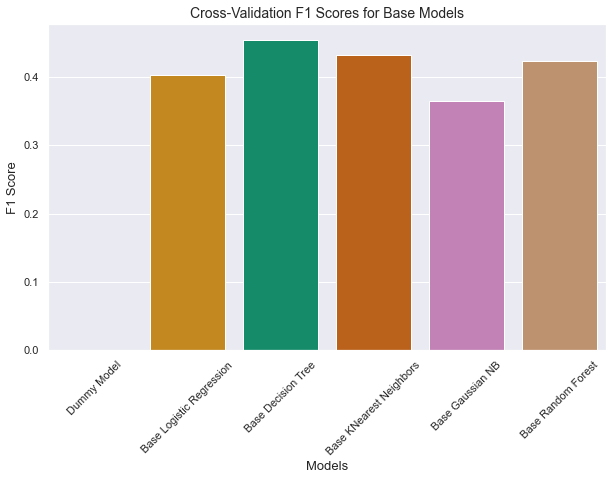

In [328]:
# F1 scores for each base model
f1_scores = [np.mean(scores) for scores in results_f1.values()]

# Models
models = ['Dummy Model', 'Base Logistic Regression', 'Base Decision Tree',
          'Base Random Forest', 'Base KNearest Neighbors', 'Base Gaussian NB',
          'Base XGBoost']

# Plotting
sns.set(style='darkgrid')
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=f1_scores, palette='colorblind')

# Adding labels and title
plt.xlabel('Models', fontsize=13)
plt.ylabel('F1 Score', fontsize=13)
plt.title('Cross-Validation F1 Scores for Base Models', fontsize=14)

# Rotating x-axis labels if needed
plt.xticks(rotation=45)

# Displaying the plot
plt.show()

In [ ]:
# F1 scores for each base model
roc_auc_scores = [np.mean(scores) for scores in results_rocauc.values()]

# Models
models = ['Dummy Model', 'Base Logistic Regression', 'Base Decision Tree',
          'Base Random Forest', 'Base KNearest Neighbors', 'Base Gaussian NB',
          'Base XGBoost']

# Plotting
sns.set(style='darkgrid')
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=roc_auc_scores, palette='colorblind')

# Adding labels and title
plt.xlabel('Models', fontsize=13)
plt.ylabel('F1 Score', fontsize=13)
plt.title('Cross-Validation AUC Scores for Base Models', fontsize=14)

# Rotating x-axis labels if needed
plt.xticks(rotation=45)

# Displaying the plot
plt.show()

Since the base decision tree model had the highest f1 score, I will choose this algorithm and try to tweak the hyperperameters to make the model better.

# Hyperperameters

`Grid search` is a technique used in machine learning to systematically search for the optimal hyperparameter values for a given model. Hyperparameters are parameters that are not learned by the model itself, but set by the user before the training process. Examples of hyperparameters include the learning rate in neural networks, the number of neighbors in k-nearest neighbors, or the regularization parameter in logistic regression.

The grid search algorithm exhaustively explores a predefined set of hyperparameter combinations and evaluates the model's performance for each combination using cross-validation or a separate validation set. It then selects the hyperparameter combination that yields the best performance metric, such as accuracy, precision, recall, or F1 score.

In [334]:
from sklearn.base import BaseEstimator

DecisionTreeClassifier().get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

## 1st Grid Search

The first parameter grid searches over these parameters:
- `max_features`: It determines the maximum number of features to consider when looking for the best split. `'None'` means all features will be considered, `'sqrt'` means the square root of the total number of features will be considered, and `'log2'` means the base-2 logarithm of the total number of features will be considered.

- `splitter`: It specifies the strategy used to choose the split at each node. `'best'` selects the best split based on a certain criterion, while `'random'` selects the best random split.

- `class_weight`: It determines the weights associated with each class. `'None'` means all classes have the same weight, while `'balanced'` automatically adjusts the weights inversely proportional to the class frequencies.
Certainly! Here's an explanation of the additional parameters:

- `criterion`: It specifies the function used to measure the quality of a split. In the context of a decision tree classifier, the commonly used criteria are `'gini'` and `'entropy'`. Gini impurity measures the degree of impurity or the probability of misclassifying a randomly chosen element, while entropy measures the information gain or the amount of information that each feature provides for the classification task.

- `max_depth`: It determines the maximum depth or the maximum number of levels in the decision tree. Restricting the depth can help control overfitting, as the tree may become too complex and highly specialized to the training data if allowed to grow without limits.

- `min_samples_split`: It represents the minimum number of samples required to split an internal node. If the number of samples at a node is less than `min_samples_split`, the node will not be split, and it will become a leaf node. Setting a higher value for `min_samples_split` can prevent the model from creating small branches that might lead to overfitting.

- `min_samples_leaf`: It specifies the minimum number of samples required to be at a leaf node. If the number of samples at a leaf node is less than `min_samples_leaf`, the node will not be considered as a valid split. Similar to `min_samples_split`, setting a higher value for `min_samples_leaf` can help prevent overfitting by controlling the growth of individual leaves.

- `ccp_alpha` stands for Cost Complexity Pruning alpha. It is a parameter used for pruning decision trees based on the concept of minimal cost complexity. Pruning is a technique used to prevent overfitting in decision trees by removing unnecessary branches and nodes. The `ccp_alpha` parameter controls the trade-off between the complexity (depth and width) of the tree and its accuracy on the training data. By adjusting the value of `ccp_alpha`, you can control the aggressiveness of pruning. Higher values of `ccp_alpha` encourage more pruning, leading to simpler trees with potentially less accuracy on the training data but better generalization to unseen data. Lower values of `ccp_alpha` result in less pruning and potentially more complex trees that may have better accuracy on the training data but a higher risk of overfitting.

In [337]:
import time
from sklearn.model_selection import GridSearchCV, ParameterGrid, 

In [352]:
%%time

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 7, 10, 13, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'ccp_alpha': [1.0, 0.1, .01, .001, .0001],
    'splitter': ['best', 'random'],
    'class_weight': [None, 'balanced']
}

# Create the decision tree classifier
dt_1 = DecisionTreeClassifier(random_state=42)

# Perform grid search
grid_search_1 = GridSearchCV(estimator=dt_1, param_grid=param_grid, 
                             cv=5, scoring='f1', n_jobs=-1, verbose=2)

CPU times: user 98 µs, sys: 52 µs, total: 150 µs
Wall time: 179 µs


In [353]:
%%time
# Fit the grid search object to the training data
grid_search_1.fit(X_train_sc, y_train)

Fitting 5 folds for each of 6480 candidates, totalling 32400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 5824 tasks      | elapsed: 17.1min
[Parallel(n_jobs=-1)]: Done 6837 tasks      | elapsed: 20.5min
[Parallel(n_jobs=-1)]: Done 7930 tasks      | elapsed: 23.3min
[Parallel(n_jobs=-1)]: Done 9105 tasks      | 

CPU times: user 1min 41s, sys: 31.8 s, total: 2min 12s
Wall time: 1h 35min 9s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'ccp_alpha': [1.0, 0.1, 0.01, 0.001, 0.0001],
                         'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 7, 10, 13, 15],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='f1', verbose=2)

In [354]:
# Get the best model and its parameters
best_dt_model_1 = grid_search_1.best_estimator_
best_dt_params_1 = grid_search_1.best_params_

In [358]:
best_dt_model_1

DecisionTreeClassifier(ccp_alpha=1.0, class_weight='balanced', random_state=42)

In [359]:
best_dt_params_1

{'ccp_alpha': 1.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [356]:
%%time
# Fit the best model on the training data
best_dt_model_1.fit(X_train_sc, y_train)

CPU times: user 1.98 s, sys: 29.2 ms, total: 2.01 s
Wall time: 2.33 s


DecisionTreeClassifier(ccp_alpha=1.0, class_weight='balanced', random_state=42)

/Users/alisonpark/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The accuracy score is: 58.67%
The precision score is: 0.00%
The recall score is: 0.00%
The F1 score is: 0.00%
The AUC score is: 50.00%

The mean cross validation accuracy score is: 0.4133
The mean cross validation precision score is: 0.4133
The mean cross validation recall score is: 1.0000
The mean cross validation F1 score is: 0.5848
The mean cross validation AUC score is: 0.5000

Confusion Matrix:
[[27570     0]
 [19419     0]]


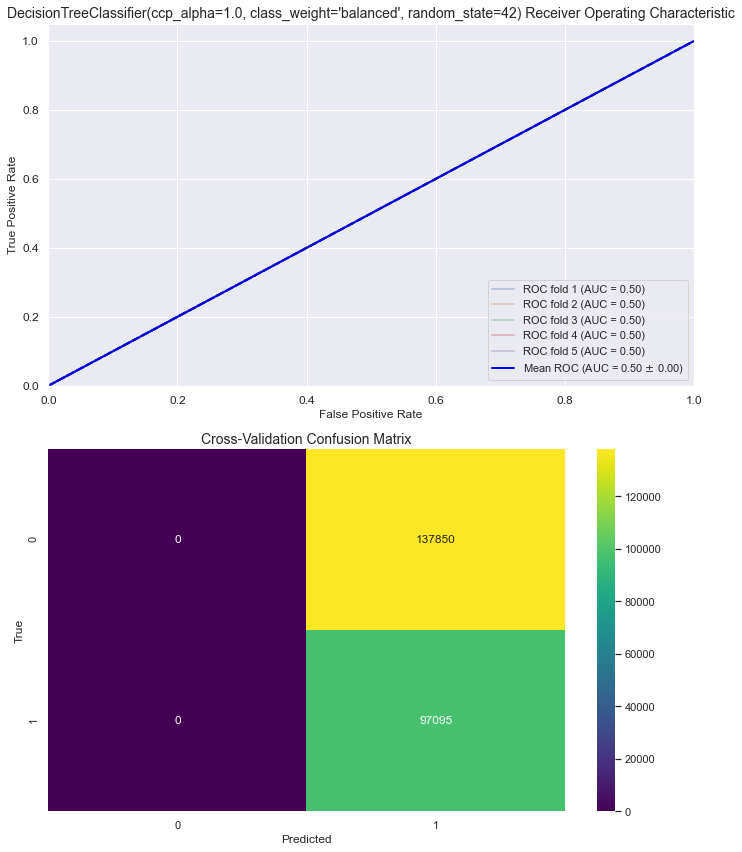

None

In [357]:
best_dt_model_1_eval = evaluate_model(best_dt_model_1, X_train_sc, y_train, cv=5)
display(best_dt_model_1_eval)

Based on the scores, the decision tree classifier appears to be overfitting.

The accuracy score on the test set is 58.67%, indicating that the model is correctly classifying 58.67% of the samples. However, the precision score is 0.00%, suggesting that the model is not predicting any positive class samples correctly. Similarly, the recall score is also 0.00%, indicating that the model is not able to identify any positive class samples. Consequently, the F1 score is 0.00%, which combines precision and recall.

The AUC score is 50.00%, which means the model's ability to discriminate between positive and negative samples is no better than random guessing.

On the other hand, the mean cross-validation scores provide insights into the model's performance across different folds of the training data. The mean cross-validation accuracy score is 41.33%, which is significantly lower than the accuracy score on the test set. This suggests that the model may not generalize well to unseen data.

The precision and F1 scores are the same as the accuracy score in the mean cross-validation scores, indicating that the model consistently fails to predict positive class samples correctly.

The mean cross-validation recall score is 1.0000, which is unexpected and suggests an issue with the model's generalization. It indicates that the model is classifying all samples as the positive class, resulting in high recall but low precision.

In summary, the provided decision tree classifier seems to be overfitting the training data. The model's poor performance on the cross validation (unseen data), particularly in terms of precision and recall, and the mismatch between the test set scores and the mean cross-validation scores suggest that the model is not able to generalize well to unseen data.

## 2nd Grid Search

Additional parameters used in the second grid search:

- `n_estimators`: It determines the number of decision trees to be created in the Random Forest ensemble. Increasing the number of estimators can improve the performance of the model, but it also increases the computational cost.
- `bootstrap`: It indicates whether bootstrap samples should be used when building decision trees. Setting it to `True` enables bootstrap sampling, which means that each tree in the forest is trained on a random subset of the training data with replacement. This parameter also helps to reduce overfitting.

In [364]:
np.arange(0.1, 1.1, 0.1)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [365]:
list(range(1, X_train_sc.shape[1]))

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129]

In [371]:
%%time
# Range from 0.1 to 1 with an increment of 0.1
min_samples_split_range = np.arange(0.1, 1.1, 0.1)
# Range from 0.1 to 0.5 with an increment of 0.1
min_samples_leaf_range = np.arange(0.1, 0.6, 0.1)  

param_grid_2 = {
    'max_depth': range(1,18),
    'min_samples_split': min_samples_split_range,
    'min_samples_leaf': min_samples_leaf_range,
    'max_features': list(range(1, X_train.shape[1])),
    'criterion': ["gini", "entropy"]
}

# Create the decision tree classifier
dt_2 = DecisionTreeClassifier(random_state=42)

# Perform grid search
grid_search_2 = GridSearchCV(estimator=dt_2, param_grid=param_grid_2, 
                             cv=5, scoring='f1', n_jobs=-1, verbose=2)

CPU times: user 157 µs, sys: 146 µs, total: 303 µs
Wall time: 311 µs


In [372]:
%%time
# Fit the grid search object to the training data
grid_search_2.fit(X_train_sc, y_train)

Fitting 5 folds for each of 78200 candidates, totalling 391000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   38.7s
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:   59.6s
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 5824 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 6837 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 7930 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 9105 tasks      | 

CPU times: user 23min 13s, sys: 8min 24s, total: 31min 37s
Wall time: 7h 26min 22s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 18),
                         'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'min_samples_leaf': array([0.1, 0.2, 0.3, 0.4, 0.5]),
                         'min_samples_split': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             scoring='f1', verbose=2)

In [374]:
# Get the best model and its parameters
best_dt_model_2 = grid_search_2.best_estimator_
print(best_dt_model_2)
best_dt_params_2 = grid_search_2.best_params_
print(best_dt_params_2)

DecisionTreeClassifier(max_depth=2, max_features=26, min_samples_leaf=0.1,
                       min_samples_split=0.1, random_state=42)
{'criterion': 'gini', 'max_depth': 2, 'max_features': 26, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1}


In [375]:
%%time
# Fit the best model on the training data
best_dt_model_2.fit(X_train_sc, y_train)

CPU times: user 41.1 ms, sys: 14.1 ms, total: 55.3 ms
Wall time: 61.5 ms


DecisionTreeClassifier(max_depth=2, max_features=26, min_samples_leaf=0.1,
                       min_samples_split=0.1, random_state=42)

The accuracy score is: 60.89%
The precision score is: 54.14%
The recall score is: 35.12%
The F1 score is: 42.60%
The AUC score is: 56.90%

The mean cross validation accuracy score is: 0.6089
The mean cross validation precision score is: 0.5412
The mean cross validation recall score is: 0.3512
The mean cross validation F1 score is: 0.4259
The mean cross validation AUC score is: 0.5725

Confusion Matrix:
[[21792  5778]
 [12599  6820]]


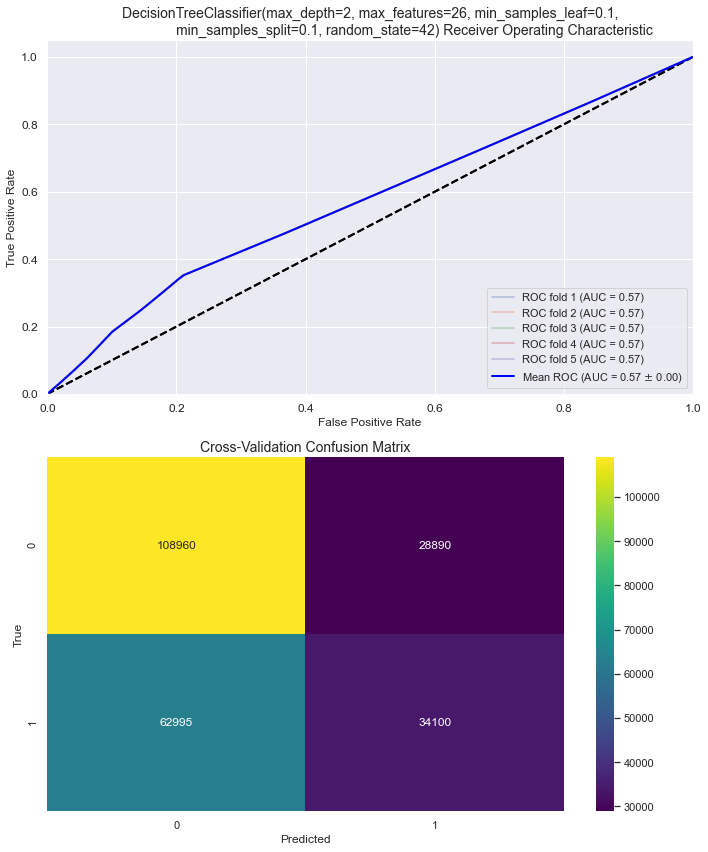

None

In [379]:
best_dt_model_2_eval = model_evaluation(best_dt_model_2, X_train_sc, y_train, cv=5)
display(best_dt_model_2_eval)

## 3rd Grid Search

In [441]:
%%time
# Range from 0.1 to 1 with an increment of 0.1
min_samples_split_range = np.arange(0.1, 2.0, 0.1)

param_grid_3 = {
    'min_samples_split': min_samples_split_range,
    'max_depth': [None, 2, 3, 5, 10, 20],
    'min_samples_leaf': [1, 5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

# Create the decision tree classifier
dt_3 = DecisionTreeClassifier(random_state=42)

# Perform grid search
grid_search_3 = GridSearchCV(estimator=dt_3, param_grid=param_grid_3, 
                             cv=3, scoring='roc_auc', n_jobs=-1, verbose=2)

CPU times: user 90 µs, sys: 47 µs, total: 137 µs
Wall time: 143 µs


In [442]:
%%time
# Fit the grid search object to the training data
grid_search_3.fit(X_train_sc, y_train)

Fitting 3 folds for each of 1368 candidates, totalling 4104 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   34.5s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   55.5s
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 4104 out of 4104 | elapsed:  7.8min finished


CPU times: user 11.5 s, sys: 2.38 s, total: 13.9 s
Wall time: 7min 49s


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 5, 10, 20],
                         'min_samples_leaf': [1, 5, 10, 20, 50, 100],
                         'min_samples_split': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9])},
             scoring='roc_auc', verbose=2)

In [443]:
# Get the best model and its parameters
best_dt_model_3 = grid_search_3.best_estimator_
print(best_dt_model_3)
best_dt_params_3 = grid_search_3.best_params_
print(best_dt_params_3)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=100,
                       min_samples_split=0.1, random_state=42)
{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 100, 'min_samples_split': 0.1}


In [444]:
%%time
# Fit the best model on the training data
best_dt_model_3.fit(X_train_sc, y_train)

CPU times: user 357 ms, sys: 86.7 ms, total: 444 ms
Wall time: 517 ms


DecisionTreeClassifier(criterion='entropy', min_samples_leaf=100,
                       min_samples_split=0.1, random_state=42)

The accuracy score is: 62.19%
The precision score is: 60.09%
The recall score is: 25.34%
The F1 score is: 35.64%
The AUC score is: 62.09%

The mean cross validation accuracy score is: 0.6163
The mean cross validation precision score is: 0.5817
The mean cross validation recall score is: 0.2653
The mean cross validation F1 score is: 0.3619
The mean cross validation AUC score is: 0.6208

Confusion Matrix:
[[24302  3268]
 [14499  4920]]


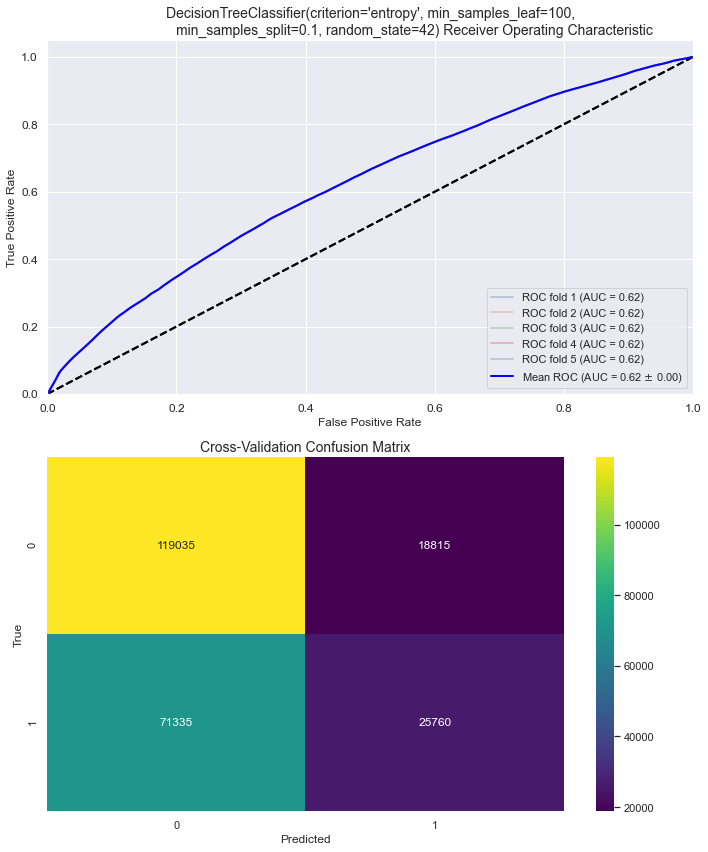

None

In [445]:
best_dt_model_3_eval = model_evaluation(best_dt_model_3, X_train_sc, y_train, cv=5)
display(best_dt_model_3_eval)

In [393]:
%%time

rf_param_grid_1 = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create the random forest classifier
rf_1 = RandomForestClassifier(random_state=42)

# Perform grid search
rf_grid_1 = GridSearchCV(estimator=rf_1, param_grid=rf_param_grid_1, 
                         cv=5, scoring='f1', n_jobs=-1, verbose=2)

CPU times: user 119 µs, sys: 51 µs, total: 170 µs
Wall time: 176 µs


In [394]:
%%time
rf_grid_1.fit(X_train_sc, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   49.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 21.3min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 40.0min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 66.6min
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed: 77.5min finished


CPU times: user 11.5 s, sys: 2.64 s, total: 14.2 s
Wall time: 1h 17min 34s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='f1', verbose=2)

In [395]:
# Get the best model and its parameters
best_rf_model_1 = rf_grid_1.best_estimator_
print(best_rf_model_1)
best_rf_params_3 = rf_grid_1.best_params_
print(best_rf_params_3)

RandomForestClassifier(min_samples_split=5, n_estimators=50, random_state=42)
{'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


In [396]:
%%time
# Fit the best model on the training data
best_rf_model_1.fit(X_train_sc, y_train)

CPU times: user 5.55 s, sys: 141 ms, total: 5.69 s
Wall time: 5.93 s


RandomForestClassifier(min_samples_split=5, n_estimators=50, random_state=42)

The accuracy score is: 98.82%
The precision score is: 99.80%
The recall score is: 97.33%
The F1 score is: 98.55%
The AUC score is: 63.50%

The mean cross validation accuracy score is: 0.6208
The mean cross validation precision score is: 0.5648
The mean cross validation recall score is: 0.3590
The mean cross validation F1 score is: 0.4390
The mean cross validation AUC score is: 0.6350

Confusion Matrix:
[[27532    38]
 [  518 18901]]


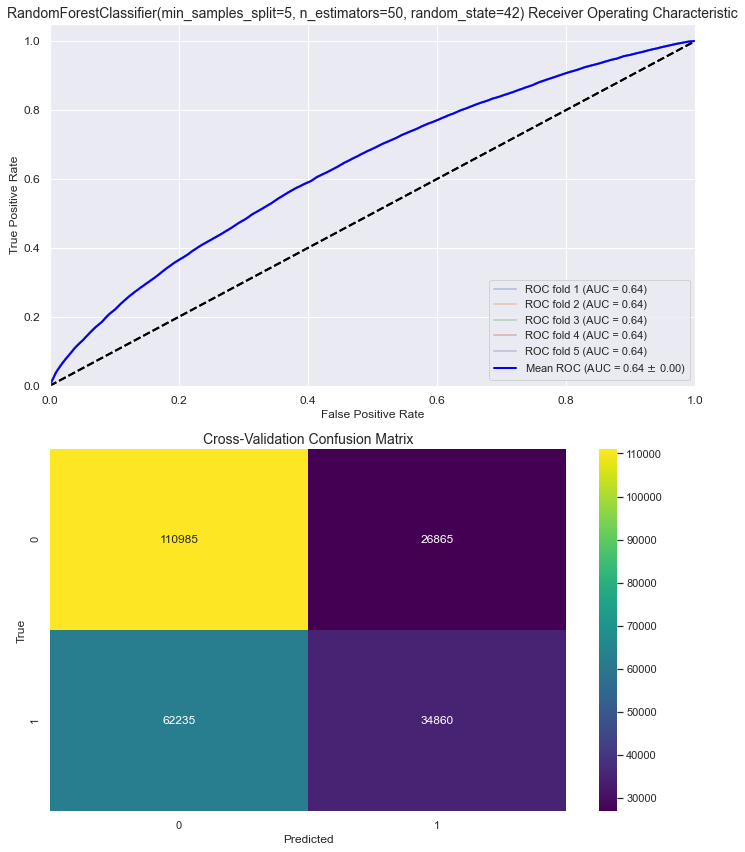

None

In [398]:
best_rf_model_1_eval = model_evaluation(best_rf_model_1, X_train_sc, y_train, cv=5)
display(best_rf_model_1_eval)

Very overfit and does not do well with unseen data.

# Results

## Final Model

In [399]:
print(best_dt_model_2)
print(best_dt_params_2)
display(best_dt_model_2_eval)

DecisionTreeClassifier(max_depth=2, max_features=26, min_samples_leaf=0.1,
                       min_samples_split=0.1, random_state=42)
{'criterion': 'gini', 'max_depth': 2, 'max_features': 26, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1}


None

In [400]:
# Predicting the target variable for the testing data
y_pred_dt_final = best_dt_model_2.predict(X_test_sc)

# Evaluating the performance of the model on the testing data
final_accuracy = accuracy_score(y_test, y_pred_dt_final)
final_precision = precision_score(y_test, y_pred_dt_final)
final_recall = recall_score(y_test, y_pred_dt_final)
final_f1 = f1_score(y_test, y_pred_dt_final)
final_roc_auc = roc_auc_score(y_test, y_pred_dt_final)

print(f"Accuracy: {final_accuracy:.4f}")
print(f"Precision: {final_precision:.4f}")
print(f"Recall: {final_recall:.4f}")
print(f"F1 score: {final_f1:.4f}")
print(f"AUC score: {final_roc_auc:.4f}")

Accuracy: 0.6086
Precision: 0.5397
Recall: 0.3479
F1 score: 0.4230
AUC score: 0.5698


In [413]:
importances = best_dt_model_2.feature_importances_
indices = np.argsort(importances)[::-1]

top_k_features = []
for f in range(10):
    feature_name = X_train_p.columns[indices[f]]
    importance_score = importances[indices[f]]
    top_k_features.append((feature_name, importance_score))

print("Top 10 features:")
for feature in top_k_features:
    print(f"{feature[0]}: {feature[1]:.4f}")

Top 10 features:
num_service_log: 0.7237
number_outpatient_log: 0.2763
diabetesMed_No: 0.0000
diag_1_sense: 0.0000
diag_2_digestive: 0.0000
diag_2_congenital: 0.0000
diag_2_blood: 0.0000
diag_1_unknown: 0.0000
diag_1_skin: 0.0000
diag_1_respiratory: 0.0000


In [423]:
importances = best_dt_model_2.feature_importances_
indices = np.argsort(importances)[::-1]

top_k_features = []
for f in range(10):
    feature_name = X_train_p.columns[indices[f]]
    importance_score = importances[indices[f]]
    top_k_features.append((feature_name, importance_score))

print("Top 10 features:")
for feature in top_k_features:
    print(f"{feature[0]}: {feature[1]:.4f}")

Top 10 features:
number_emergency: 0.7237
num_meds: 0.2763
diabetesMed_No: 0.0000
diag_1_sense: 0.0000
diag_2_digestive: 0.0000
diag_2_congenital: 0.0000
diag_2_blood: 0.0000
diag_1_unknown: 0.0000
diag_1_skin: 0.0000
diag_1_respiratory: 0.0000


In [408]:
importances = best_dt_model_2.feature_importances_
indices = np.argsort(importances)[::-1]

top_k_features = []
num_features = min(10, len(X_train_sc.columns))  # Ensure not to exceed the number of available columns
for f in range(num_features):
    if indices[f] < len(X_train_sc.columns):
        feature_idx = indices[f]
        feature_name = X_train_sc.columns[feature_idx]
        importance_score = importances[feature_idx]
        top_k_features.append((feature_name, importance_score))

print("Top 10 features:")
for feature in top_k_features:
    print(f"{feature[0]}: {feature[1]:.4f}")

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [401]:
# Predicting the target variable for the testing data
y_pred_rf_final = rf_final_model.predict(X_test_sc)

# Evaluating the performance of the model on the testing data
final_accuracy = accuracy_score(y_test, y_pred_rf_final)
final_precision = precision_score(y_test, y_pred_rf_final)
final_recall = recall_score(y_test, y_pred_rf_final)
final_f1 = f1_score(y_test, y_pred_rf_final)

print(f"Accuracy: {final_accuracy:.4f}")
print(f"Precision: {final_precision:.4f}")
print(f"Recall: {final_recall:.4f}")
print(f"F1 score: {final_f1:.4f}")

NameError: name 'rf_final_model' is not defined

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt,
                   feature_names=X.columns,
                   class_names=['No Readmission', "Readmission"],
                   filled=True)

In [402]:
# Create list of top most features based on importance

feature_names = X_train_sc.columns
feature_important = best_dt_model_2.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_important)], 
                                 columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
print(most_imp_features)

# Graph the list of top most features based on importance
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Decision Tree')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

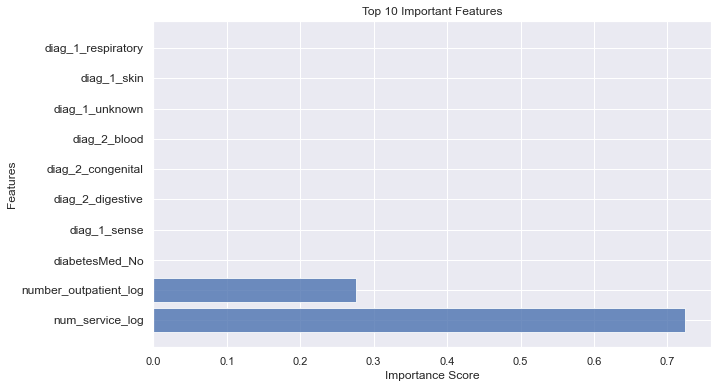

In [412]:
import matplotlib.pyplot as plt

# Get feature importances and corresponding feature names
importances = best_dt_model_2.feature_importances_
feature_names = X_train_p.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
top_k_features = indices[:10]
top_feature_names = feature_names[top_k_features]
top_feature_importances = importances[top_k_features]

# Plot the top ten important features
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_feature_names)), top_feature_importances, align='center', alpha=0.8)
plt.yticks(range(len(top_feature_names)), top_feature_names, fontsize=12)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Top 10 Important Features')
plt.show()

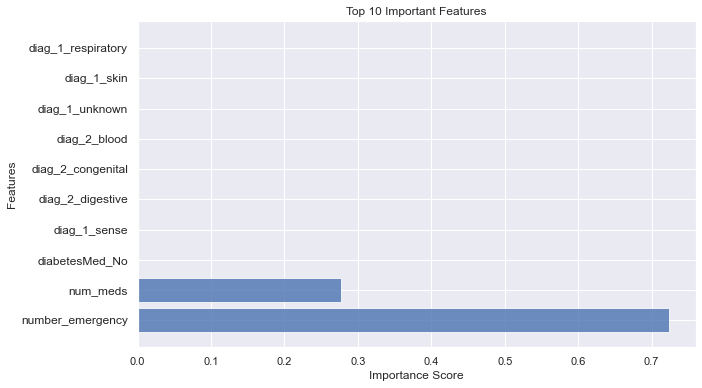

In [422]:
# Get feature importances and corresponding feature names
importances = best_dt_model_2.feature_importances_
feature_names = X_train_p.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
top_k_features = indices[:10]
top_feature_names = feature_names[top_k_features]
top_feature_importances = importances[top_k_features]

# Plot the top ten important features
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_feature_names)), top_feature_importances, align='center', alpha=0.8)
plt.yticks(range(len(top_feature_names)), top_feature_names, fontsize=12)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Top 10 Important Features')
plt.show()

## Dummy vs Final

In [427]:
# Predicting the target variable for the testing data for dummy model
y_pred_dummy_test = dummy_model.predict(X_test_p)

# Evaluating the performance of the model on the testing data
dummy_accuracy = accuracy_score(y_test, y_pred_dummy_test)
dummy_precision = precision_score(y_test, y_pred_dummy_test)
dummy_recall = recall_score(y_test, y_pred_dummy_test)
dummy_f1 = f1_score(y_test, y_pred_dummy_test)
dummy_roc_auc = roc_auc_score(y_test, y_pred_dummy_test)

print(f"Accuracy: {dummy_accuracy:.4f}")
print(f"Precision: {dummy_precision:.4f}")
print(f"Recall: {dummy_recall:.4f}")
print(f"F1 score: {dummy_f1:.4f}")
print(f"AUC score: {dummy_roc_auc:.4f}")

Accuracy: 0.5875
Precision: 0.0000
Recall: 0.0000
F1 score: 0.0000
AUC score: 0.5000


In [425]:
# Predicting the target variable for the testing data
y_pred_dt_final = best_dt_model_2.predict(X_test_p)

# Evaluating the performance of the model on the testing data
final_accuracy = accuracy_score(y_test, y_pred_dt_final)
final_precision = precision_score(y_test, y_pred_dt_final)
final_recall = recall_score(y_test, y_pred_dt_final)
final_f1 = f1_score(y_test, y_pred_dt_final)
final_roc_auc = roc_auc_score(y_test, y_pred_dt_final)

print(f"Accuracy: {final_accuracy:.4f}")
print(f"Precision: {final_precision:.4f}")
print(f"Recall: {final_recall:.4f}")
print(f"F1 score: {final_f1:.4f}")
print(f"AUC score: {final_roc_auc:.4f}")

Accuracy: 0.4789
Precision: 0.4297
Recall: 0.8048
F1 score: 0.5603
AUC score: 0.5274


''

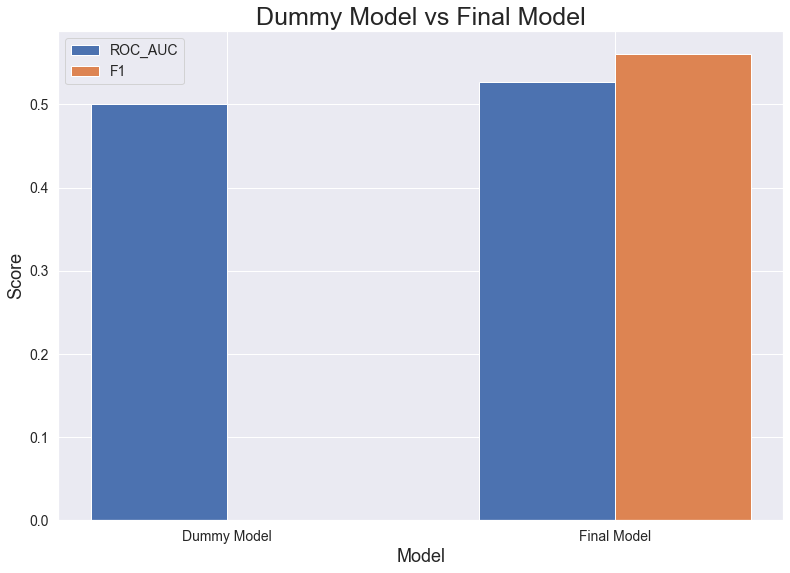

In [429]:
# Data
auc_dummy_final = [dummy_roc_auc, final_roc_auc]
f1_dummy_final = [dummy_f1, final_f1]

xtick_labels = ['Dummy Model', 'Final Model']

# Set the width of the bars
bar_width = 0.35

# Set the x coordinates for each xtick
x_dummy = [0, 1]
x_final = [x + bar_width for x in x_dummy]

# Create the bar plots
fig, ax = plt.subplots(figsize=(13,9))

plt.bar(x_dummy, auc_dummy_final, width=bar_width, label='ROC_AUC')
plt.bar(x_final, f1_dummy_final, width=bar_width, label='F1')

# Set the xtick labels
plt.xticks([x + bar_width/2 for x in range(len(xtick_labels))], xtick_labels)

# Set the axis labels and title
plt.title('Dummy Model vs Final Model', fontsize=25)
plt.xlabel('Model', fontsize=18)
plt.ylabel('Score', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add the legend
plt.legend(fontsize=14)

#plt.savefig('images/dummy_vs_final.png')
;

# Conlclusion

tie back to business problem and using model for inferential information for the applications I mentioned in BP.

# Future Investigation

